# **Installing and Importing the necessary libraries**

In [ ]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface-hub>=0.29.3 -q


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
!pip install Numpy==2.0.2 Pandas==2.2.2 Matplotlib==3.10.0 Seaborn==0.13.2 xgboost==2.1.4  joblib==1.4.2  huggingface_hub==0.34.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.7/558.7 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.30.1
    Uninstalling huggingface-hub-0.30.1:
      Successfully uninstalled huggingface-hub-0.30.1


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
    make_scorer
)
# To create the pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import make_column_selector


# To tune different models and standardize
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# For Feature Engineering Importng Date Time
from datetime import datetime

# For Cross Validation of different Matrices
from sklearn.model_selection import KFold, cross_validate

from sklearn import set_config
from IPython.display import display
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform, randint


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
import xgboost
import joblib
import huggingface_hub

# Create a dictionary of packages names and versions.
version={
    "Package":['Numpy','Pandas','Matplotlib','Seaborn','Sklearn','XGBoost','Joblib','Hugging Face'],
    "Version":[np.__version__,pd.__version__,matplotlib.__version__,sns.__version__,sklearn.__version__,xgboost.__version__,joblib.__version__,huggingface_hub.__version__]
}

# Convert to Dataframe for nice Display
df_versions=pd.DataFrame(version)
df_versions

Package Version
0         Numpy   2.0.2
1        Pandas   2.2.2
2    Matplotlib  3.10.0
3       Seaborn  0.13.2
4       Sklearn   1.6.1
5       XGBoost   2.1.4
6        Joblib   1.4.2
7  Hugging Face  0.30.1

# **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading Train Data Set into a pandas dataframe
data=pd.read_csv('/content/drive/MyDrive/Python/SuperKart.csv')

In [ ]:
# Creating copy of the main data file.
data_1=data.copy()

# **Data Overview**

### Viewing the First 5 Rows and Last 5 Rows of the Data Set

In [ ]:
data_1.head()

Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0     FD6114           12.66             Low Sugar                   0.027   
1     FD7839           16.54             Low Sugar                   0.144   
2     FD5075           14.28               Regular                   0.031   
3     FD8233           12.10             Low Sugar                   0.112   
4     NC1180            9.57              No Sugar                   0.010   

         Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
0        Frozen Foods       117.08   OUT004                      2009   
1               Dairy       171.43   OUT003                      1999   
2              Canned       162.08   OUT001                      1987   
3        Baking Goods       186.31   OUT001                      1987   
4  Health and Hygiene       123.67   OUT002                      1998   

  Store_Size Store_Location_City_Type          Store_Type  \
0     Medium                   Tier 2   Supermarket Type2   
1     Medium                   Tier 1  Departmental Store   
2       High                   Tier 2   Supermarket Type1   
3       High                   Tier 2   Supermarket Type1   
4      Small                   Tier 3           Food Mart   

   Product_Store_Sales_Total  
0                    2842.40  
1                    4830.02  
2                    4130.16  
3                    4132.18  
4                    2279.36

In [ ]:
data_1.tail()

Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
8758     NC7546           14.80              No Sugar                   0.016   
8759      NC584           14.06              No Sugar                   0.142   
8760     NC2471           13.48              No Sugar                   0.017   
8761     NC7187           13.89              No Sugar                   0.193   
8762      FD306           14.73             Low Sugar                   0.177   

            Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
8758  Health and Hygiene       140.53   OUT004                      2009   
8759           Household       144.51   OUT004                      2009   
8760  Health and Hygiene        88.58   OUT001                      1987   
8761           Household       168.44   OUT001                      1987   
8762         Snack Foods       224.93   OUT002                      1998   

     Store_Size Store_Location_City_Type         Store_Type  \
8758     Medium                   Tier 2  Supermarket Type2   
8759     Medium                   Tier 2  Supermarket Type2   
8760       High                   Tier 2  Supermarket Type1   
8761       High                   Tier 2  Supermarket Type1   
8762      Small                   Tier 3          Food Mart   

      Product_Store_Sales_Total  
8758                    3806.53  
8759                    5020.74  
8760                    2443.42  
8761                    4171.82  
8762                    2186.08

In [ ]:
# Display the number of rows and columns in the datas
data_1.shape

(8763, 12)

There are Total 8763 Rows and 12 Columns in the given Data Set.

In [ ]:
# Display the column names of the dataset
data_1.columns

Index(['Product_Id', 'Product_Weight', 'Product_Sugar_Content',
       'Product_Allocated_Area', 'Product_Type', 'Product_MRP', 'Store_Id',
       'Store_Establishment_Year', 'Store_Size', 'Store_Location_City_Type',
       'Store_Type', 'Product_Store_Sales_Total'],
      dtype='object')

## Checking for the Attributes type

In [ ]:
# checking column datatypes and number of non-null values
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In the given Data Set:

7 Columns are of Object Data Type, 4 are Float Data Type and 1 is of Integer Data Type.

In [ ]:
# checking for duplicate values
data_1.duplicated().sum()

np.int64(0)

There are no duplicate values in the given Data Set.

In [ ]:
# checking for missing values
data_1.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

There are no missing values in the given Data Set.

# **Exploratory Data Analysis (EDA)**

Let's start by defining the target and predictor (numerical and categorical) variables.

  




In [ ]:
# Define the target variable for the regression task
target = 'Product_Store_Sales_Total'

# List of numerical features in the dataset
numeric_features = [
    'Product_Weight',          # Weight of each product
    'Product_Allocated_Area',  # Ratio of the allocated display area of each product to the total display area of all the products in a store
    'Product_MRP',             # Maximum retail price of each product
    'Store_Establishment_Year' # Year in which the store was established

]

# List of categorical features in the dataset
categorical_features = [
    'Product_Sugar_Content', # Sugar content of each product, like low sugar, regular, and no sugar
    'Product_Type',          # Broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
    "Store_Size",            # Size of the store, depending on square feet, like high, medium, and low
    "Store_Location_City_Type", # Type of city in which the store is located, like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts
    "Store_Type",            # Type of store, depending on the products that are being sold there, like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
]

In [ ]:
# These graphs will display all the numerical attributes.

def histogram_boxplot(data_1, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data_1: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data_1, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data_1, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data_1, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
     data_1[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data_1[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# This graph will help to display all the categorical graphs.
#function to create labeled barplots


def labeled_barplot(data_1, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data_1: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data_1[feature])  # length of the column
    count = data_1[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(fontsize=15)
    plt.xticks(rotation=90)
    ax = sns.countplot(
        data=data_1,
        x=feature,
        palette="Paired",
        order=data_1[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        ) # annotate the percentage

    plt.show()  # showing the plot

In [ ]:
def stacked_barplot(data_1, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data_1: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data_1[predictor].nunique()
    sorter = data_1[target].value_counts().index[-1]
    tab1 = pd.crosstab(data_1[predictor], data_1[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data_1[predictor], data_1[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Univariate Analysis

In [ ]:
# Generate summary statistics for numerical features
data_1[numeric_features].describe()

Product_Weight  Product_Allocated_Area  Product_MRP  \
count     8763.000000             8763.000000  8763.000000   
mean        12.653792                0.068786   147.032539   
std          2.217320                0.048204    30.694110   
min          4.000000                0.004000    31.000000   
25%         11.150000                0.031000   126.160000   
50%         12.660000                0.056000   146.740000   
75%         14.180000                0.096000   167.585000   
max         22.000000                0.298000   266.000000   

       Store_Establishment_Year  
count               8763.000000  
mean                2002.032751  
std                    8.388381  
min                 1987.000000  
25%                 1998.000000  
50%                 2009.000000  
75%                 2009.000000  
max                 2009.000000

1) Product Weight has minimum value of 4 and maximum value of 22 whereas mean os 12.65 and 50% quartile is 12.66 which shows the its a uniform distribution.

2) Product Allocated Area has minimum value of 0.004 and maximum value of 0.298 whereas mean is 0.0687 which 50% quartile as 0.056 which shows the distribution is slighlty skewed towards right. The values given are ratio of product allocated area with total area of the store.

3) Product MRP has minimum value of 31 and maximum value of 266, whereas mean is 147.03 and 50% quartile is 146.74. This shows almost uniform distribution of pricing with a fraction shift towards left in the symmetry.

4) Store Establishment year provides details when the store was opened. The first store was opened in 1987 and latest was opened in 2009. Rather maximum stores were opened in 2009 as per the Data.

In [ ]:
# Generate summary statistics for categorical features
data_1[categorical_features].describe()

Product_Sugar_Content           Product_Type Store_Size  \
count                   8763                   8763       8763   
unique                     4                     16          3   
top                Low Sugar  Fruits and Vegetables     Medium   
freq                    4885                   1249       6025   

       Store_Location_City_Type         Store_Type  
count                      8763               8763  
unique                        3                  4  
top                      Tier 2  Supermarket Type2  
freq                       6262               4676

1) Product Sugar Content provides details of Sugar content in various products availabe in the Supermarket of different segments. There are 4 categories in this column with highest Selling option is for Low Sugar Products. It has been purchased 4885 times.

2) Product Type is the different segments of products available in the supermarket. All Products are divided into 16 Categories with Fruits and Vegetables are sold maximum. They have been sold 1249 times.

3) Store Size has 3 categories according to total area with Medium being maximum size of stores. There are total 6025 Stores out of 8763 which fall under Medium Category.

4) Store Location provides details of type of cities they are in. Total 3 categories have been made for all the cities with Tier 2 type cities have maximum stores. Total 6262 Stores are in Tier 2 cities.

5) Store type provides details of type of Stores. There are total 4 types of Stores and Supermarket Type 2 have highest number among all. There are total 4676 Supermarket Type 2 Stores.

In [ ]:
# Let's check the unique values for categorical variables

# list of all categorical variables
cat_col = data_1.select_dtypes(include="object").columns.tolist()

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data_1[column].value_counts(normalize=True))
    print("-" * 50)

Product_Id
FD306     0.000114
FD6114    0.000114
FD7839    0.000114
FD5075    0.000114
FD8233    0.000114
            ...   
FD1387    0.000114
FD1231    0.000114
FD5276    0.000114
FD8553    0.000114
FD6027    0.000114
Name: proportion, Length: 8763, dtype: float64
--------------------------------------------------
Product_Sugar_Content
Low Sugar    0.557457
Regular      0.256875
No Sugar     0.173342
reg          0.012325
Name: proportion, dtype: float64
--------------------------------------------------
Product_Type
Fruits and Vegetables    0.142531
Snack Foods              0.131119
Frozen Foods             0.092548
Dairy                    0.090836
Household                0.084446
Baking Goods             0.081707
Canned                   0.077257
Health and Hygiene       0.071665
Meat                     0.070524
Soft Drinks              0.059226
Breads                   0.022823
Hard Drinks              0.021226
Others                   0.017232
Starchy Foods            0.016090

1) Product Id have all unique values as they are not categorised into Product Category rather they have been assigned unique values each time. With first 2 letters remaining constant which denotes the category they fall into.

2) Product Sugar Content has 4 unique values Low, Regular, reg, No Sugar. As its a typographical error due to which 2 types of Regular can be seen. It needs to be treated before moving ahead with EDA. Low Sugar have highest percentage distribution among all categories followed by Regular and No Sugar.

3) Product Type has 16 categories with Fruits and Vegetables are sold most followed by Snack Foods and Frozen Foods respectively.

4) Store Id is unique id alloted to all stores. Store with id OUT004 has maximum sales share among all other stores with 55.36% of total Sales.It is followed by OUT001 and OUT003 respectively.

5) Store Size has 3 unique values with Medium having maximum share of stores. It has above 68% share among other store types. It is followed by High and Low store sizes.

6) Store Location has 3 unique values with Tier 2 cities having maximum number of stores accouting to 71% of total stores followed by Tier 1 and Tier 3.

In [ ]:
# Generate summary statistics for the target variable
data_1[target].describe()

count    8763.000000
mean     3464.003640
std      1065.630494
min        33.000000
25%      2761.715000
50%      3452.340000
75%      4145.165000
max      8000.000000
Name: Product_Store_Sales_Total, dtype: float64

Target Varible: Product Sales has minimum sales value of 33 and maximum of 8000, whereas mean is 3464 and 50% quartile as 3452.34. Its again fractionally left skewed which may be due to maximum sale of Vegetable and Fruits which are mostly low price items.

In [ ]:
# In Sugar Content Column reg and Regular are same but are treated as different. This is a typographical error which needs to be attanded first before starting with Feature engineering.

# Standardize case and strip spaces
data_1['Product_Sugar_Content'] = data_1['Product_Sugar_Content'].str.strip().str.lower()

# Replace variations with a single consistent label
data_1['Product_Sugar_Content'] = data_1['Product_Sugar_Content'].replace({
    'reg': 'regular',
    'regular': 'regular'
})

# If you want to capitalize for neatness
data_1['Product_Sugar_Content'] = data_1['Product_Sugar_Content'].str.title()

In [ ]:
# Checking for merging of Regular and reg in Product Sugar Content.
data_1['Product_Sugar_Content'].value_counts()

Product_Sugar_Content
Low Sugar    4885
Regular      2359
No Sugar     1519
Name: count, dtype: int64

The changes required have been made and Regular & reg are merged together.

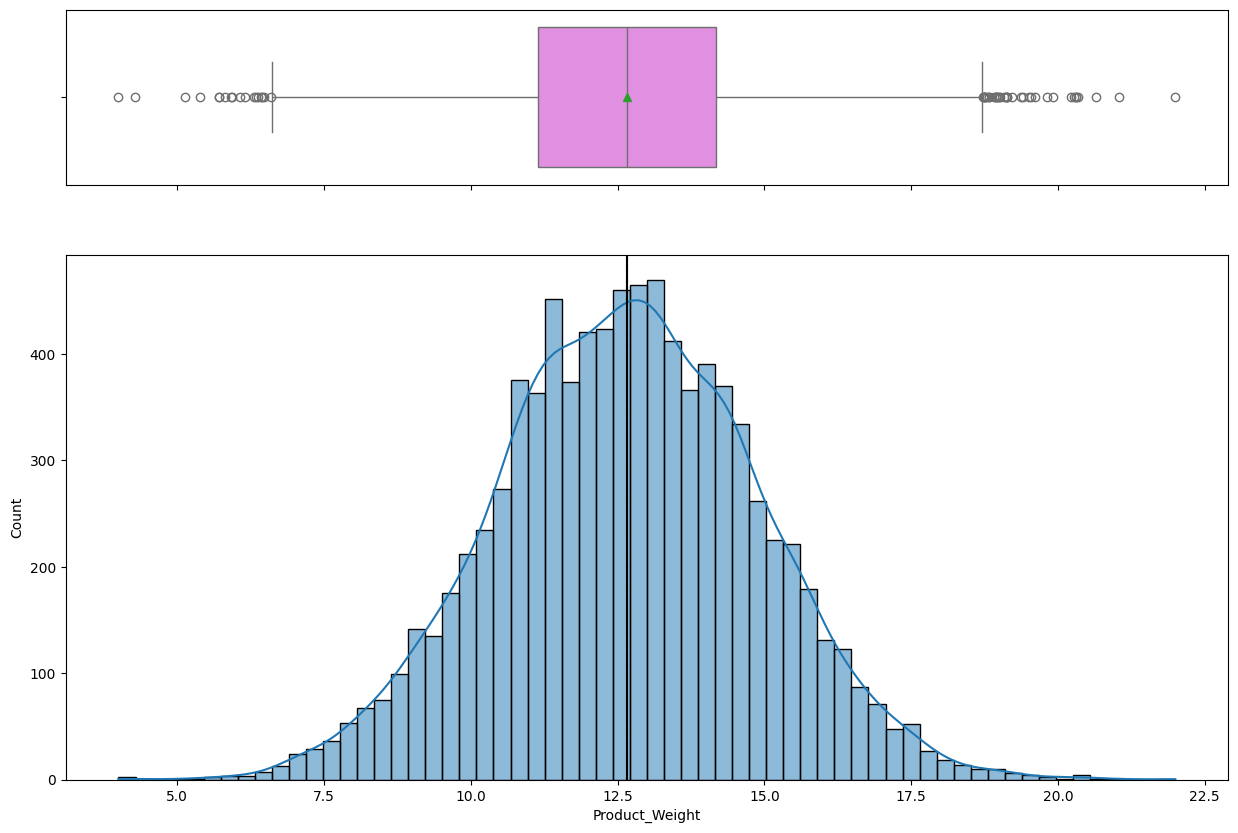

In [ ]:
histogram_boxplot(data_1, 'Product_Weight',kde=True)

Product Weight is a Uniformally Distributed Graph with Outliers on both the sides of the plot. The Mean and Median are coinciding at a common points showing uniform distribution.

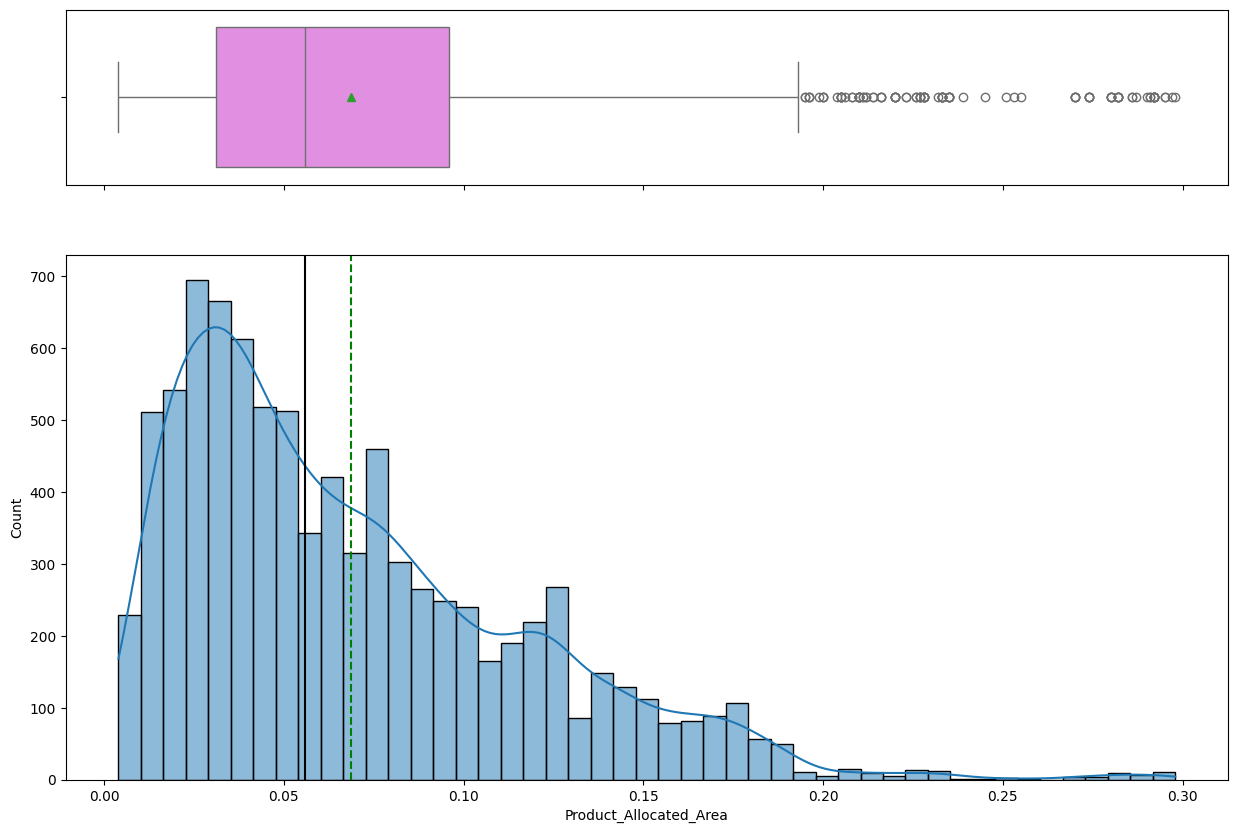

In [ ]:
histogram_boxplot(data_1, 'Product_Allocated_Area',kde=True)

Product Allocated Area is a highly Right Skewed Graph with many items occupying more space in the stores. Many outliers can be seen in the right side of the Box Plot. As it was evident in Statistical Sumary also highest value is 0.29 which can be seen in the graph.

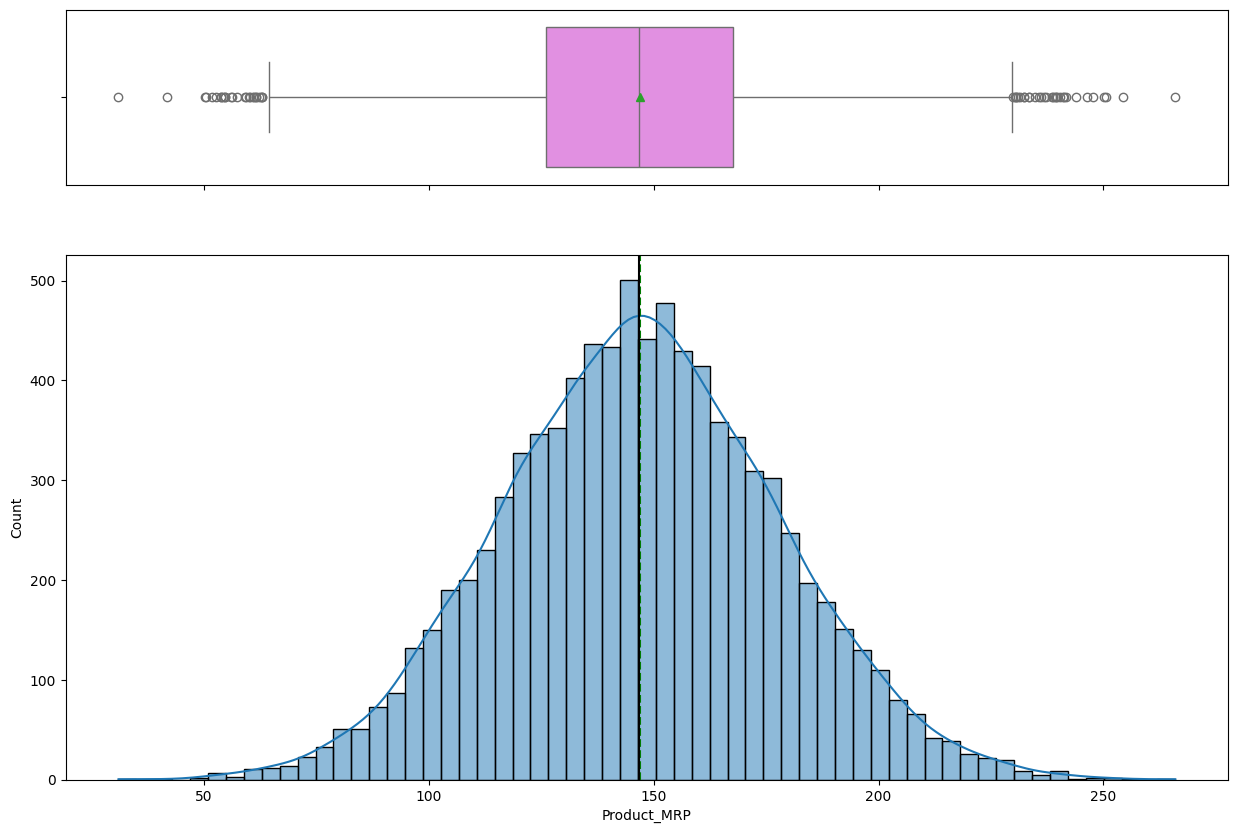

In [ ]:
histogram_boxplot(data_1, 'Product_MRP',kde=True)

Product MRP is again Uniform Distribution Graph with a fraction of skewness towards right which may be due some Higher Valued Products. Outliers are present in both the direction of the Box Plot showcasing extreme values in both the ends.

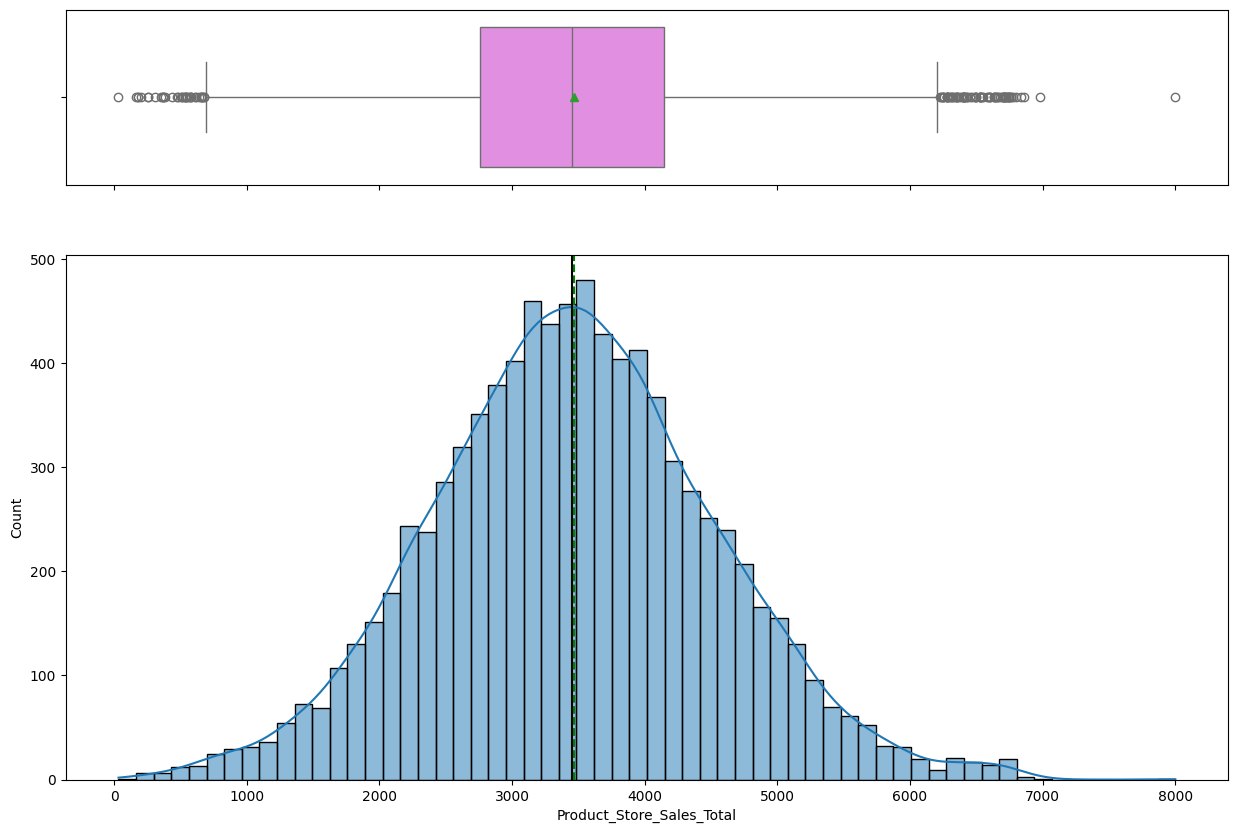

In [ ]:
histogram_boxplot(data_1, 'Product_Store_Sales_Total',kde=True)

Sales Data is almost Uniformally Distributed with fraction deviation towards right showing fractionally Right Skewed. This is due to some high priced items which was evident in statisticall summary. Max Price of product is 8000 which can been seen in the graph as well.

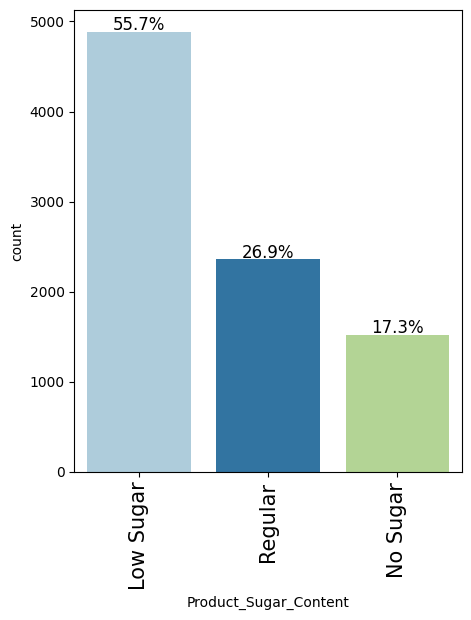

In [ ]:
labeled_barplot(data_1, "Product_Sugar_Content", perc=True)

Low Sugar Content product have highest sales with 55.7% of total products sold are of Low Sugar Items followd by Regular and No Sugar Items respectively.

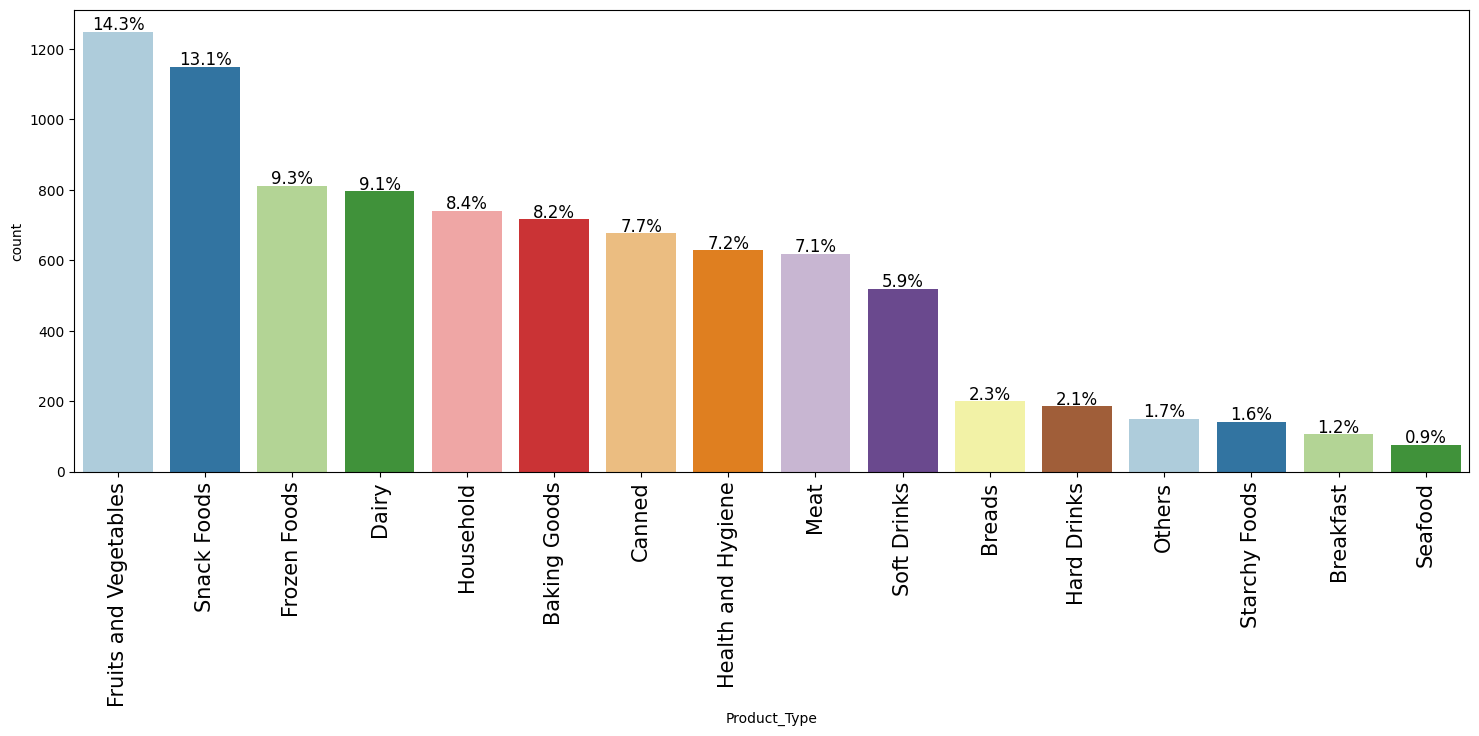

In [ ]:
labeled_barplot(data_1, "Product_Type", perc=True)


Vegetables and Fruits have highest percentage of type of products sold in Supermarket having 14.3% of total products sold. It is followed by Snack Foods with 13.1% and Frozen Foods with 9.3%.

Least sold items in Supermarkets is Seafood with 0.9% and Breakfast ahead of it with 1.2%.

This shows Consumers buying patterns in the Supermarkets. Where most of them visit to buy Vegetables and Fruits and least for buying Sea Foods or Breakfast Items.

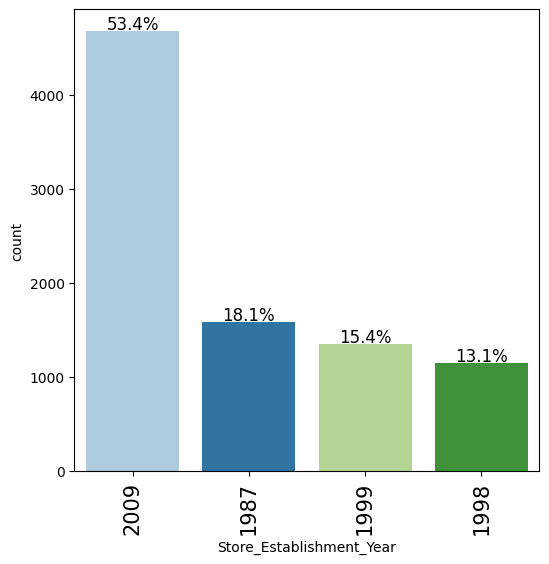

In [ ]:
labeled_barplot(data_1, "Store_Establishment_Year", perc=True)

Maximum Stores were opened in the year 2009 with least opened in 1998. Total 53.4% of tores were opened in 2009 and only 13.1% were opened in 1998.

This again is an example of Consumer Behaviour shifting inclination towards Supermarket Purchase in 2009 with all the requirements they have are avialable under one roof.

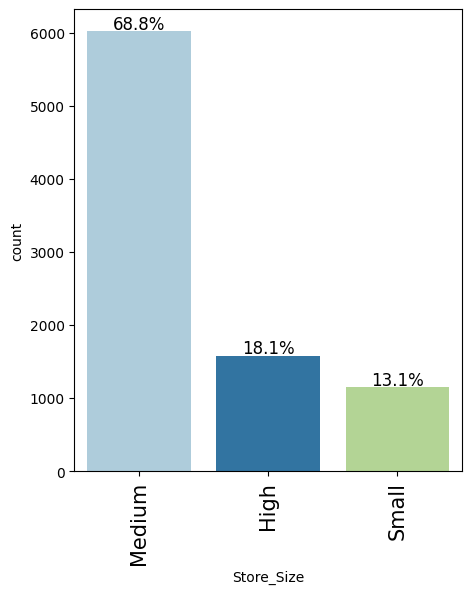

In [ ]:
labeled_barplot(data_1, "Store_Size", perc=True)

Medium type of Store Size have maximum percentage of total types of stores with 68.8% and Small being the lowest with 13.1%.

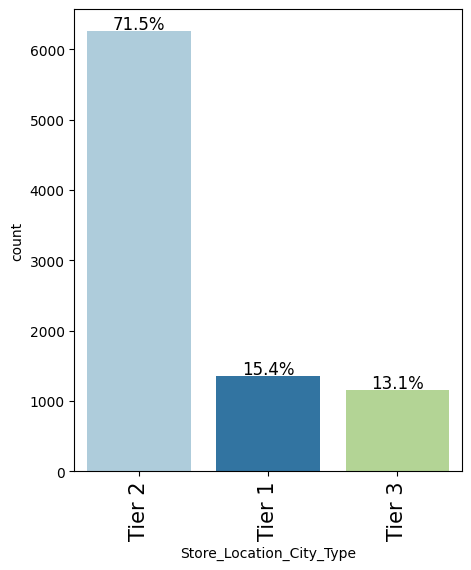

In [ ]:
labeled_barplot(data_1, "Store_Location_City_Type", perc=True)

Store Location also benefits the owners as it provides maximum sales in those area.

According to the graph Tier 2 cities would have generated maximum sales due to which maximum stores ae present in Tier 2 with 71.5% of total stores in Tier 2 cities. tier 3 have least number of stores.

Buying pattern of Tier 1 and Tier 3 cities are almost same as they might not prefer puurchase from Supermarkets due to which Tier 2 have maximum stores.

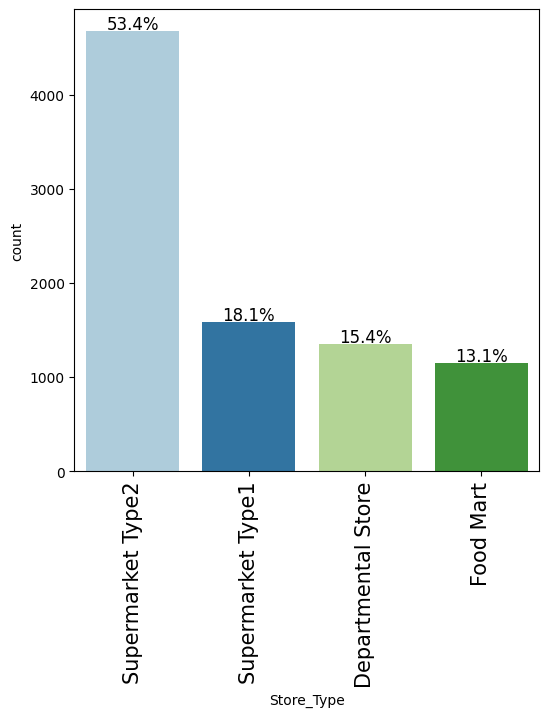

In [ ]:
labeled_barplot(data_1, "Store_Type", perc=True)

Supermarket Type 2 have maximum outlets with 53.4% stores and Foodmart are the lowest with 13.1%

Supermarket Type 2 have more variations in the categories they offer while Foodmart may only have Perishable and Non Persishable Foods which make it lowest in the count.

## Bivariate Analysis

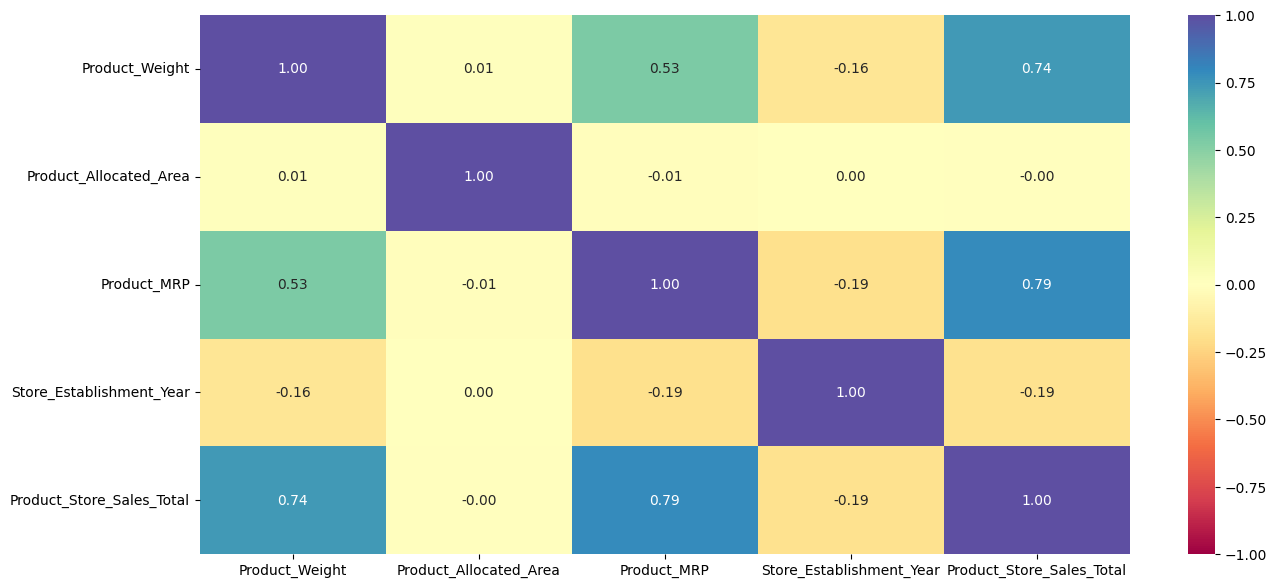

In [ ]:
# Let's check the correlation between numerical columns
plt.figure(figsize=(15, 7))
sns.heatmap(data_1.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

1) Product Store Sales have a good corelation with Product Weight and Product MRP. They implies Product with higher weight may have higher price which in turn increases the product store sales.

2) Product Store Sales have negative relation with Establishment Year, which means Age of Stores dosent gurantee higher sales.

3) Product Store Sales have no relation with Product Allocated Area, which implies that consumer will buy required product irrespective of the total area alloted for stacking of the product.

4) Store Age has no ascertain relationship with other parameters.

5) Product MRP has good relation with Product Weight which is evident of higher sales.

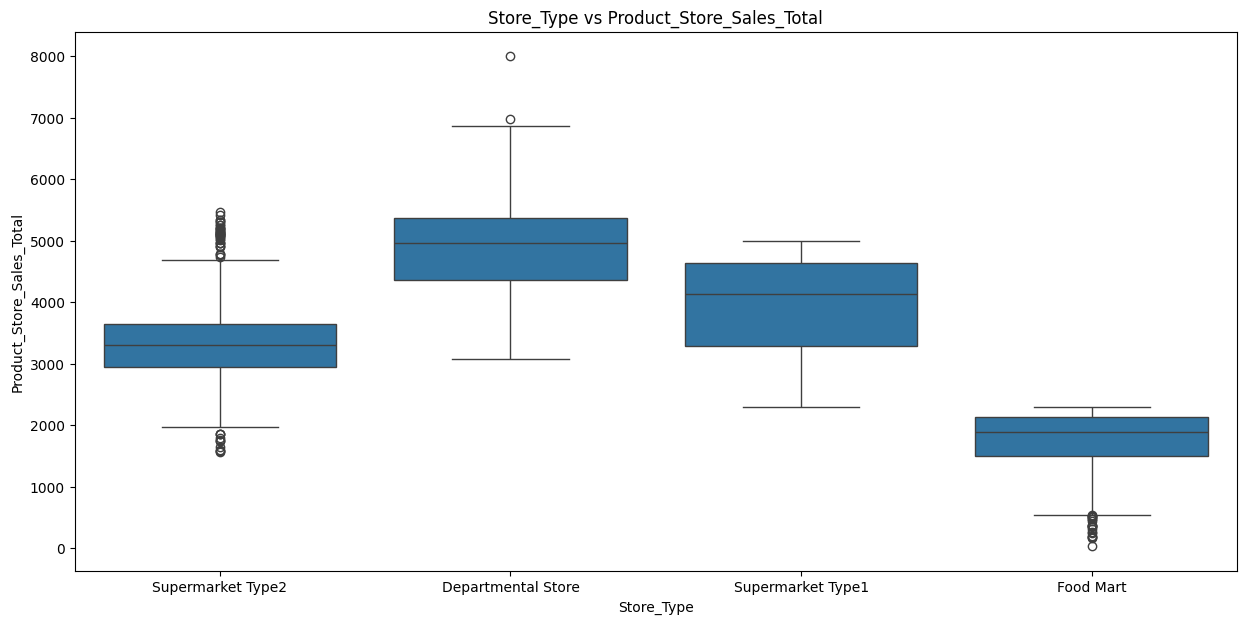

In [ ]:
# Store_Type vs Product_Store_Sales_Total
plt.figure(figsize=(15, 7))
sns.boxplot(x="Store_Type", y="Product_Store_Sales_Total", data=data_1)
plt.title("Store_Type vs Product_Store_Sales_Total")
plt.show()

1) Departmental Stores have higher product sales as compared with other stores but they lack behind in total sales due to less volume of product sales beacuse of that they do not contribute high on the Total Sales analysis with Type of stores. This is evident with just 2 outliers above 75% quartile range.

2) Supermarket Type 2 have higher sales price wise as well volume wise due to which they have highest sales among all the stores. Outliers can be seen on both the ends.

3) Foodmart dosent contribute much towards the Total Sales as its least visited as per above EDA and they have outliers on the lower end showcasing low sales pricing wise.


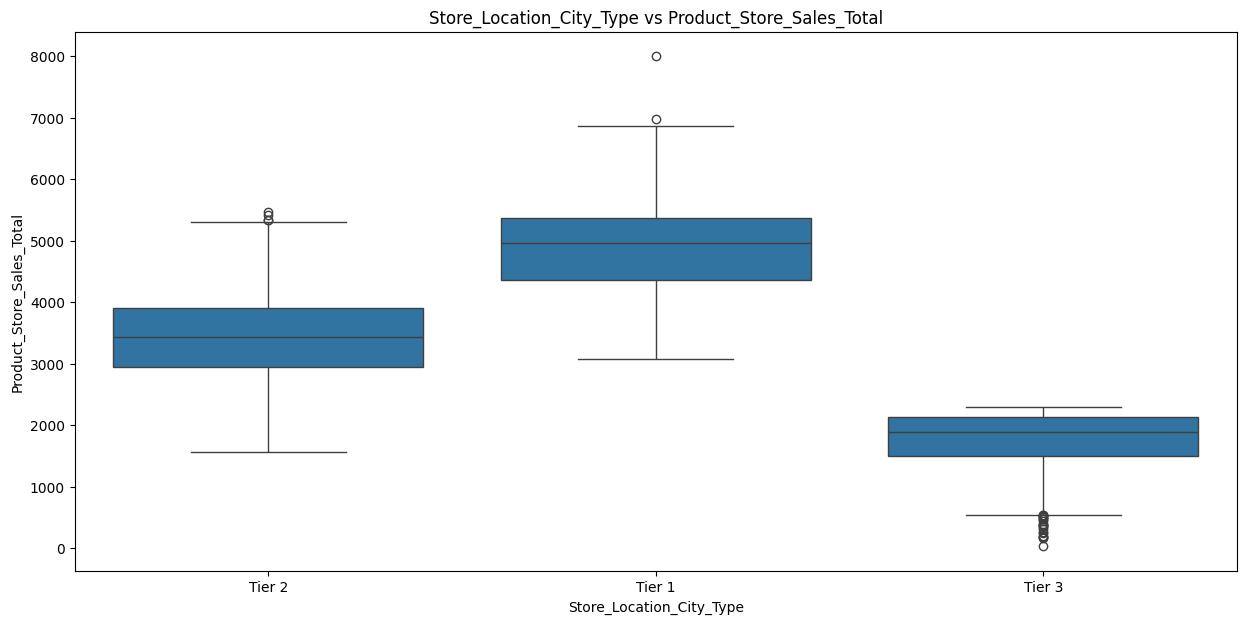

In [ ]:
# Store_Location_City_Type vs Product_Store_Sales_Total
plt.figure(figsize=(15, 7))
sns.boxplot(x="Store_Location_City_Type", y="Product_Store_Sales_Total", data=data_1)
plt.title("Store_Location_City_Type vs Product_Store_Sales_Total")
plt.show()

1) Tier 1 cities have the expending customers as product sales are higher in that region but low acceptance of stores might have lagged them in Total Sales behind Tier 2 Cities. Only 2 outliers can be seen above the 75% quartile range.

2) Tier 2 cities have higher acceptability by consumers due to which even with lower expending with respect to Tier 1, Tier 2 cities more Product Sales. Outliers above 75% quartile are visible.

3) Tier 3 have lowest product sales in terms of earning as consumer prefer low priced products more in these cities. All the outliers are below 25% quartile range.

The type of store with the greatest revenue is Supermarket Type2
Overall sales for the best store type is 15427583.43
The location which generates the highest amount of revenue is Tier 2
Revenue for the top location type is 21650696.61


<Figure size 1200x600 with 0 Axes>

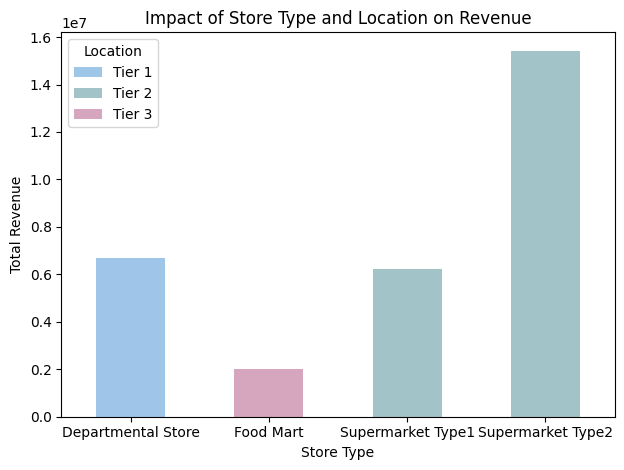

In [ ]:
# Group by 'Store_Type' and calculate the average revenue for each store type
store_type_revenue = data_1.groupby('Store_Type')['Product_Store_Sales_Total'].sum()

# Group by 'Store_Location_City_Type' and calculate the average revenue for each location
location_revenue = data_1.groupby('Store_Location_City_Type')['Product_Store_Sales_Total'].sum()

# Find the store type and location with the highest average revenue
top_store_type = store_type_revenue.idxmax()
top_store_type_revenue = store_type_revenue.max()

top_location = location_revenue.idxmax()
top_location_revenue = location_revenue.max()

print(f"The type of store with the greatest revenue is {top_store_type}")
print(f"Overall sales for the best store type is {top_store_type_revenue:.2f}")

print(f"The location which generates the highest amount of revenue is {top_location}")
print(f"Revenue for the top location type is {top_location_revenue:.2f}")

# Creating a pivot
store_location_revenue = data_1.pivot_table(index='Store_Type', columns='Store_Location_City_Type', values='Product_Store_Sales_Total', aggfunc='sum')

# Create a bar plot
plt.figure(figsize=(12, 6))
store_location_revenue.plot(kind='bar', stacked=True, color=['#9fc5e8', '#a2c4c9', '#d5a6bd'])
plt.xlabel('Store Type')
plt.ylabel('Total Revenue')
plt.title('Impact of Store Type and Location on Revenue')
plt.xticks(rotation=0)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

1) Maximum revenue is generated by Supermarket Type 2 stores which have their maximum presence in Tier 2 cities.

2) Departmental Stores of Tier 1 cities are second highest revenue generator.

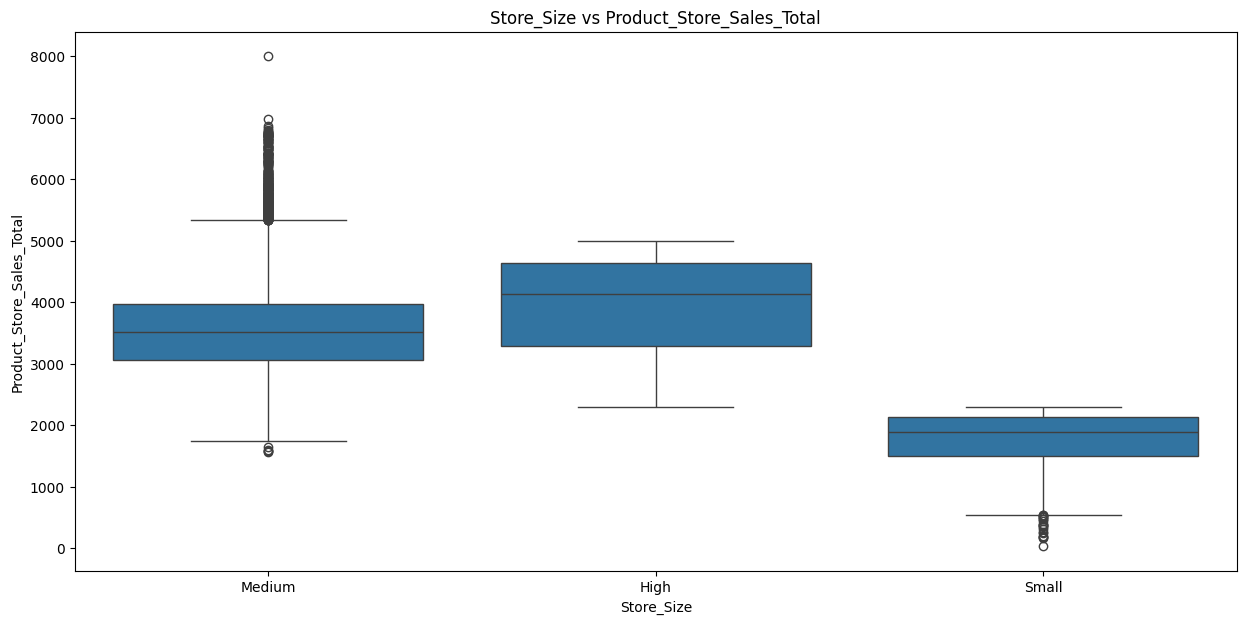

In [ ]:
# Store_Size vs Product_Store_Sales_Total
plt.figure(figsize=(15, 7))
sns.boxplot(x="Store_Size", y="Product_Store_Sales_Total", data=data_1)
plt.title("Store_Size vs Product_Store_Sales_Total")
plt.show()

Maximum sales are achieved from Store falling in Medium section under Store Size Category. It can be seen sales ae crossing above 7000 in these stores.

The store size contributing the most to the revenue is: Medium
Sales amount for the top store size: 22101041.00


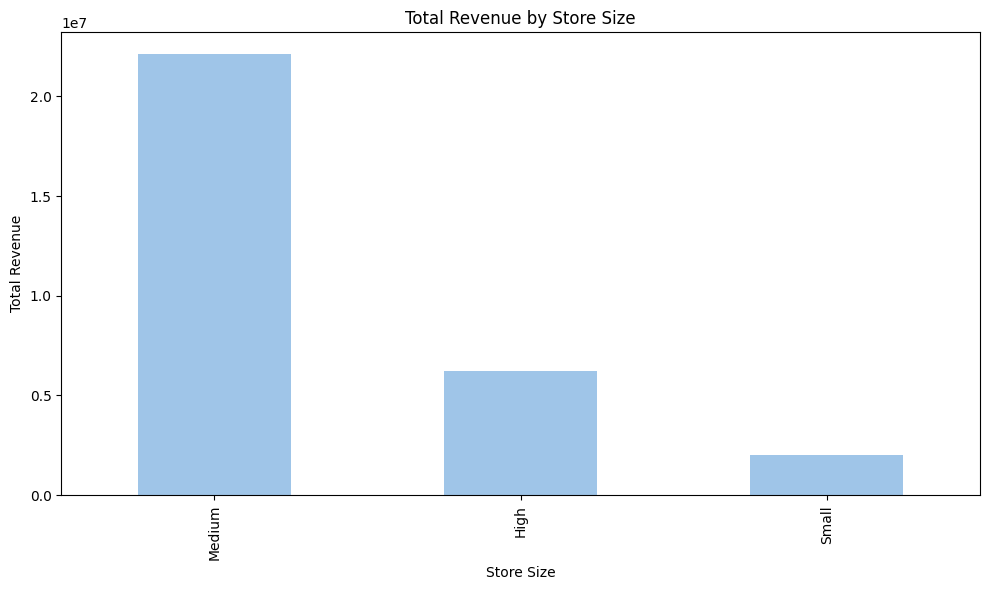

In [ ]:

# Group by 'Store_Size' and sum the 'Product_Store_Sales_Total' for each product type
revenue_by_store_size = data_1.groupby('Store_Size')['Product_Store_Sales_Total'].sum()

# Sort the result in descending order to find the store size with the highest revenue
sorted_revenue = revenue_by_store_size.sort_values(ascending=False)

# Find the Store Size with the highest revenue
top_store_size = revenue_by_store_size.idxmax()
top_store_size_amount = revenue_by_store_size.max()

print(f"The store size contributing the most to the revenue is: {top_store_size}")
print(f"Sales amount for the top store size: {top_store_size_amount :.2f}")


# Create a bar plot
plt.figure(figsize=(10, 6))
sorted_revenue.plot(kind='bar', color=['#9fc5e8'])
plt.xlabel('Store Size')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Store Size')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The store size contributing the most to the revenue is: Medium
Sales amount for the top store size: 22101041.00

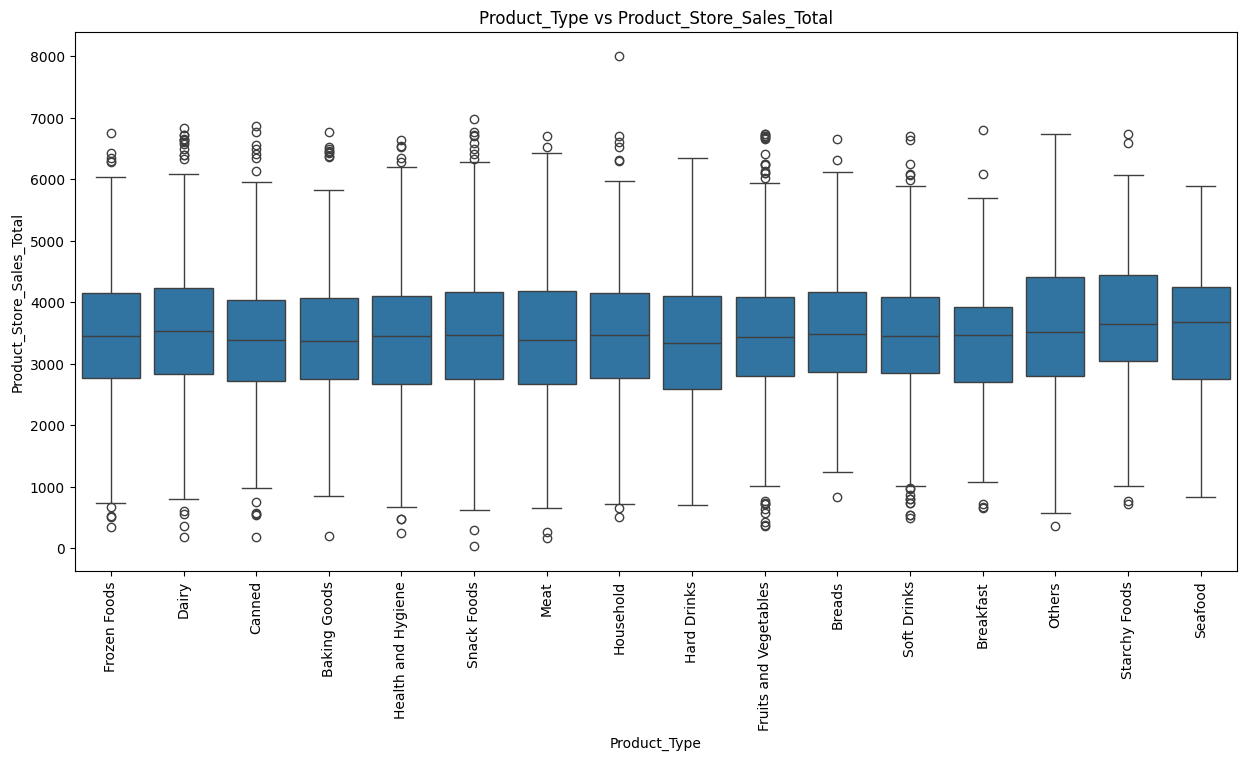

In [ ]:
# Product_Type vs Product_Store_Sales_Total
plt.figure(figsize=(15, 7))
sns.boxplot(x="Product_Type", y="Product_Store_Sales_Total", data=data_1)
plt.title("Product_Type vs Product_Store_Sales_Total")
plt.xticks(rotation=90)
plt.show()

1) Almost all the sections of Product Type Category have similar 50% quartile range around 3500.

2) Fruits and Vegetables have sales as per the volume as outliers are present in both the sides of boxplot.

3) Highest Product Sale was seen under Houshold Category amounting 8000.

4) Lowest Product Sale was seen under Snack Foods amouting in the range of 20-40.



The product type contributing the most to the revenue is: Fruits and Vegetables
Sales amount for the top product type: 4300833.27


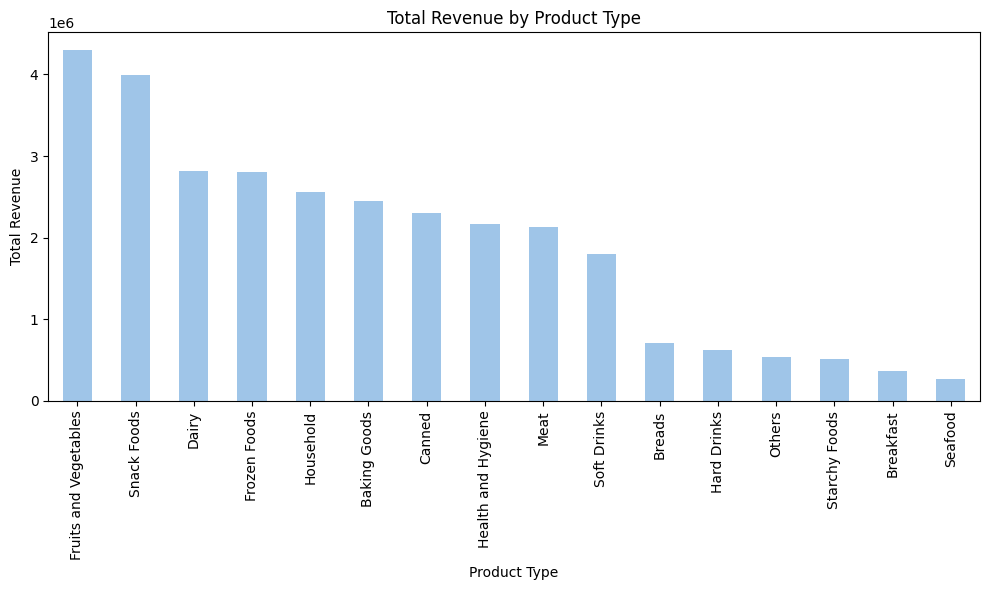

In [ ]:
# Group by 'Product_Type' and sum the 'Product_Store_Sales_Total' for each product type
revenue_by_product_type = data_1.groupby('Product_Type')['Product_Store_Sales_Total'].sum()

# Sort the result in descending order to find the product type with the highest revenue
sorted_revenue = revenue_by_product_type.sort_values(ascending=False)

# Find the product type with the highest revenue
top_product_type = revenue_by_product_type.idxmax()
top_product_sales_amount = revenue_by_product_type.max()
bottom_product_type = revenue_by_product_type.idxmin()
bottom_product_sales_amount = revenue_by_product_type.min()

print(f"The product type contributing the most to the revenue is: {top_product_type}")
print(f"Sales amount for the top product type: {top_product_sales_amount:.2f}")


# Create a bar plot
plt.figure(figsize=(10, 6))
sorted_revenue.plot(kind='bar', color=['#9fc5e8'])
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The product type contributing the most to the revenue is: Fruits and Vegetables
Sales amount for the top product type: 4300833.27

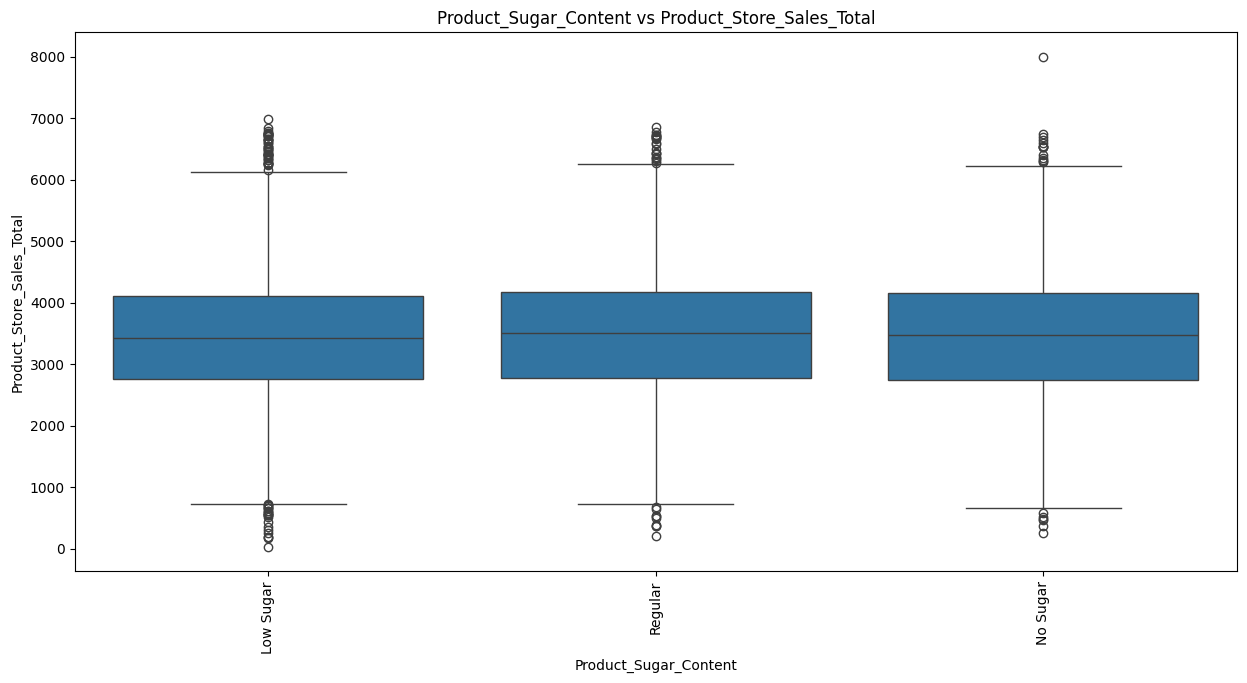

In [ ]:
# Product_Sugar_Content vs Product_Store_Sales_Total
plt.figure(figsize=(15, 7))
sns.boxplot(x="Product_Sugar_Content", y="Product_Store_Sales_Total", data=data_1)
plt.title("Product_Sugar_Content vs Product_Store_Sales_Total")
plt.xticks(rotation=90)
plt.show()

1) Low Sugar Items are most sold and contibute to higher product Sales.

2) Product Sold with highest amount of 8000 which is under Household Category as shown in previous graphs have No Sugar content.

3) Product Sold at least price ofrange 20-40 in Snacks Foods Category have Low Sugar content.

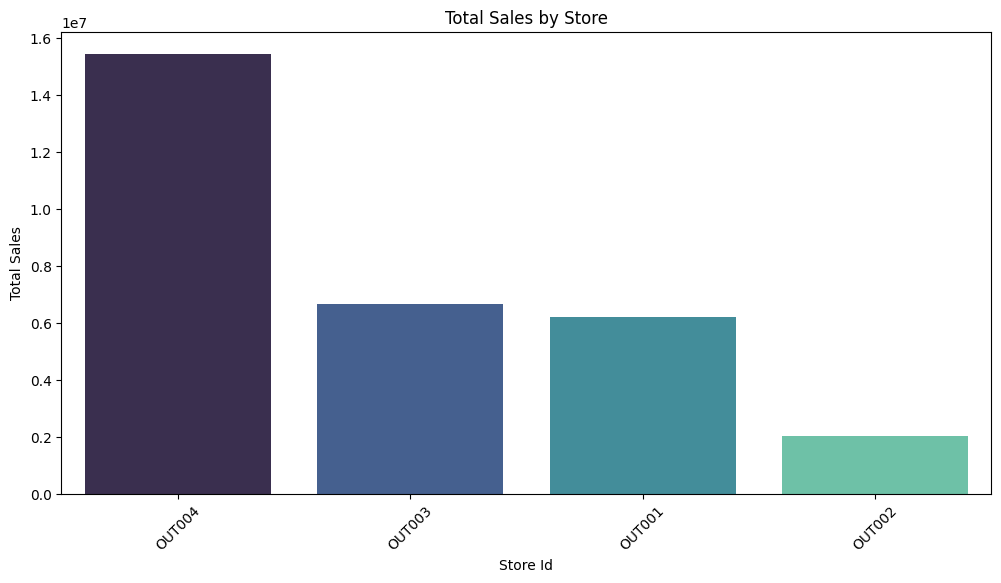

In [ ]:
# Aggregate total sales by store
store_sales = data_1.groupby("Store_Id")["Product_Store_Sales_Total"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=store_sales.index, y=store_sales.values, palette="mako")
plt.title("Total Sales by Store")
plt.xlabel("Store Id")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


The top 4 Sales achiever among all stores are OUT004, OUT003, OUT001 and OUT002 respectively.

In [ ]:
# Group by Product_Type and Store_Id
sales_by_store_id = data_1.groupby(["Product_Type", "Store_Id"])["Product_Store_Sales_Total"].sum().reset_index()

# Group by Product_Type and Store_Size
sales_by_store_size = data_1.groupby(["Product_Type", "Store_Size"])["Product_Store_Sales_Total"].sum().reset_index()

# Group by Product_Type and Store_Type
sales_by_store_type = data_1.groupby(["Product_Type", "Store_Type"])["Product_Store_Sales_Total"].sum().reset_index()

# Group by Product_Type and Store_Establishment_Year
sales_by_store_year = data_1.groupby(["Product_Type", "Store_Establishment_Year"])["Product_Store_Sales_Total"].sum().reset_index()


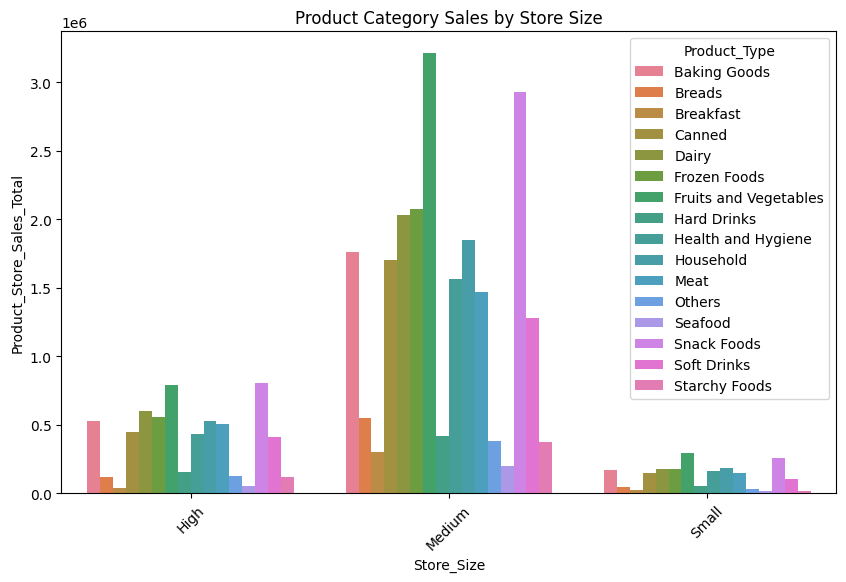

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_store_size, x="Store_Size", y="Product_Store_Sales_Total", hue="Product_Type")
plt.title("Product Category Sales by Store Size")
plt.xticks(rotation=45)
plt.show()


1) Highest demand Product in Medium Type Store Section. Most bought Food are Vegetables and Fruits, Snack food, Frozen Food and Dairy Food respectively. Least Bought Product is Seafood.

2) For High Size Stores maximum bought products are Vegetables and Fruits and Snack Food together, followed by Dairy Food. Least Bought Product is Breakfast.

3) For Small Size Stores, sale of products is very lowin all segments. Highest sold here is also Vegetables and Fruits followed by Snack Food, with least bought food are Breakfast, Sea Food and Starchy Food.

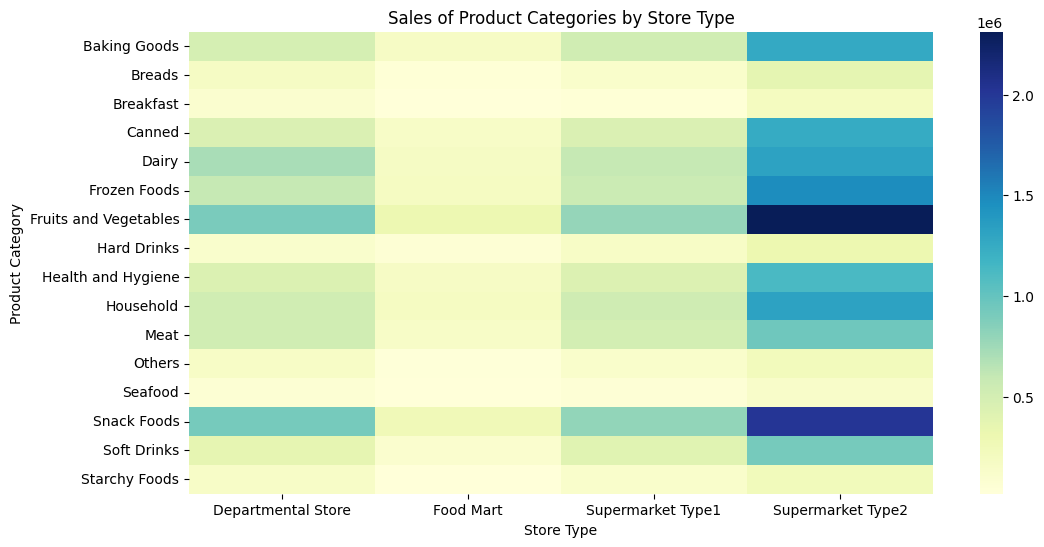

In [ ]:
pivot_type = sales_by_store_type.pivot(index="Product_Type", columns="Store_Type", values="Product_Store_Sales_Total").fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_type, annot=False, cmap="YlGnBu")
plt.title("Sales of Product Categories by Store Type")
plt.ylabel("Product Category")
plt.xlabel("Store Type")
plt.show()


1) In Departmental Stores maximum sold products are Fruits & Vegatables and Snack Foods, with least sold is Seafood.

2) In Food Mart Stores, maximum sold Product are Fruits & Vegatables and Snack Foods and least sold are Starchy Foods,Seafoods,Others,Hard Drinks.

3) In Supermarket Type 1 most sold product are Fruits & Vegatables and Snack Foods and least sold is Seafood.

4) In Supermarket Type 2 most sold product are Fruits & Vegetables followed by Snack Foods and least sold is seafood. Most of the products available in this type of market are sold frequently which makes these stores as highest revenue generator.

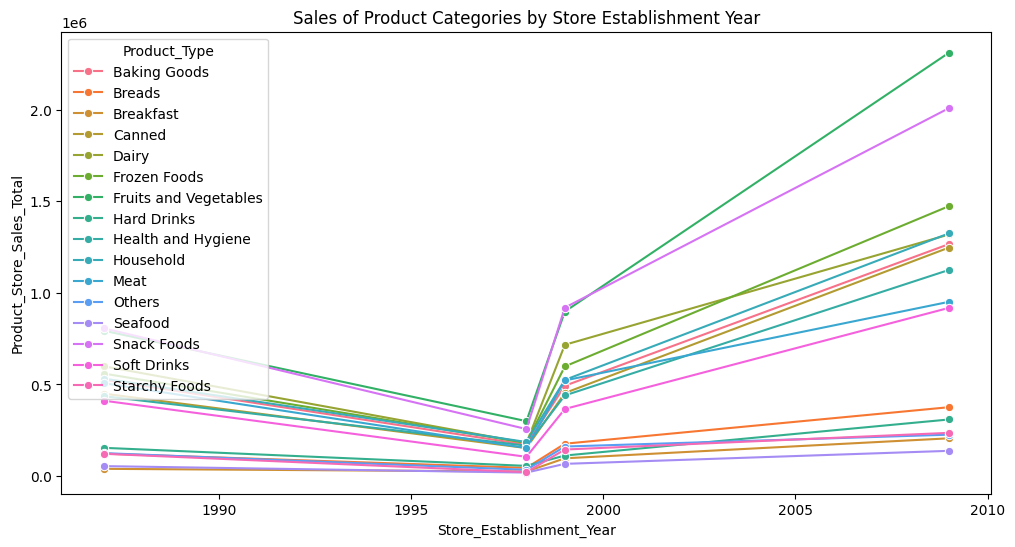

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_by_store_year, x="Store_Establishment_Year", y="Product_Store_Sales_Total", hue="Product_Type", marker="o")
plt.title("Sales of Product Categories by Store Establishment Year")
plt.show()


1) Fruits and Vegetables were among the 2 most sold products in 1987 when stores were opened then its sales declined between 1995-2000 and again it increased exponentially after 2000.

2) Top 5 Highest demanded products over the years were: Fruits& Vegetables, Snack food, Frozen Foods, Household and Dairy.

3) Breakfast, Sea Food and Starchy Food have never been in the priority list of buying for consumers from the stores.

In [ ]:
# Group by Product_Type, Sugar_Content with Store_Size
sales_by_size = data_1.groupby(["Product_Type", "Product_Sugar_Content", "Store_Size"])["Product_Store_Sales_Total"].sum().reset_index()

# Group by Product_Type, Sugar_Content with Store_Type
sales_by_type = data_1.groupby(["Product_Type", "Product_Sugar_Content", "Store_Type"])["Product_Store_Sales_Total"].sum().reset_index()

# Group by Product_Type, Sugar_Content with Store_Location_City_Type
sales_by_location = data_1.groupby(["Product_Type", "Product_Sugar_Content", "Store_Location_City_Type"])["Product_Store_Sales_Total"].sum().reset_index()


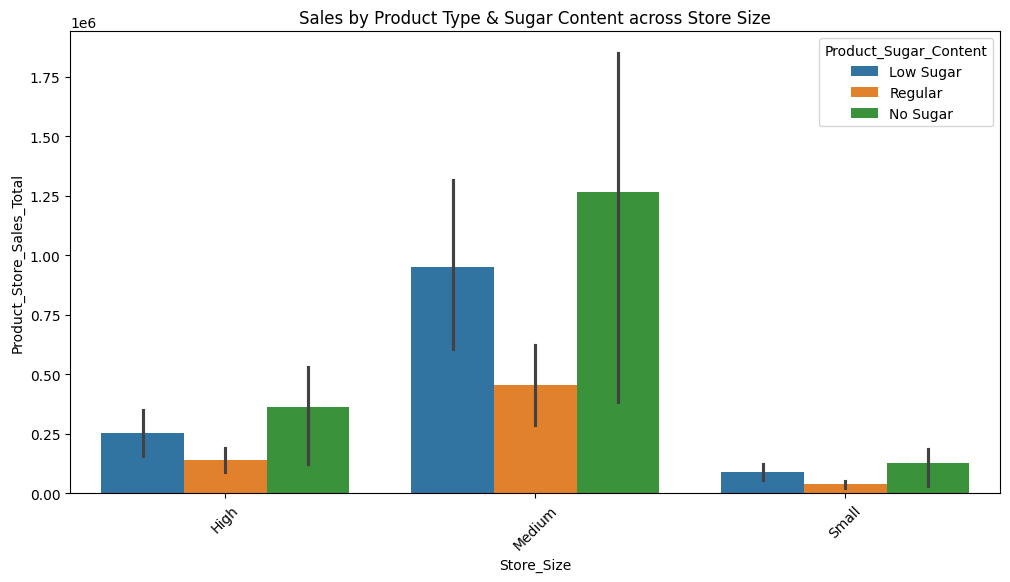

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_size, x="Store_Size", y="Product_Store_Sales_Total",
            hue="Product_Sugar_Content")
plt.title("Sales by Product Type & Sugar Content across Store Size")
plt.xticks(rotation=45)
plt.show()


 No Sugar Products are sold most in All type of Store Size followed by Low Sugar Products and Regular Products.

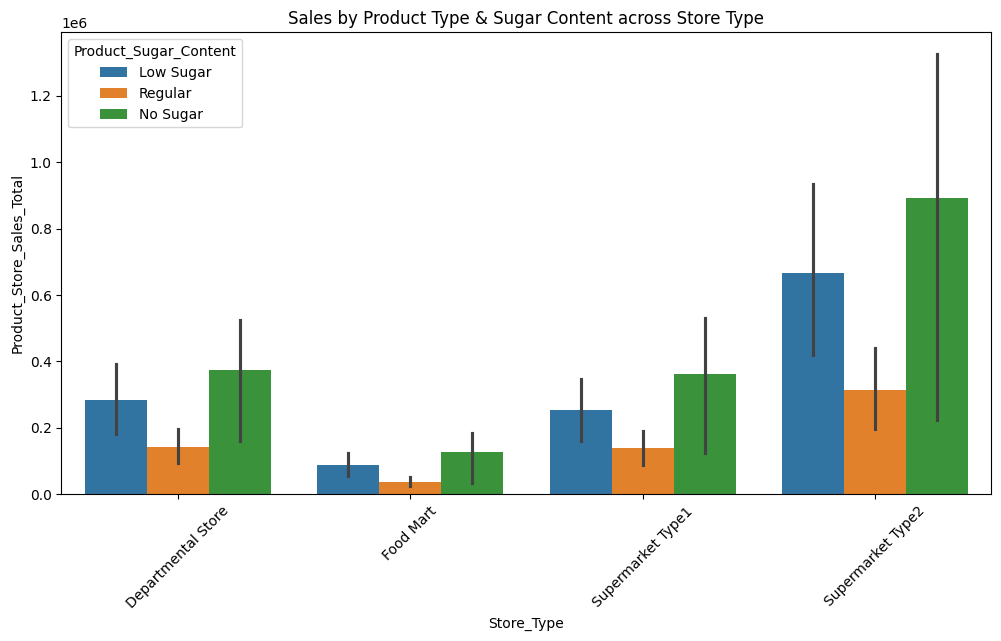

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_type, x="Store_Type", y="Product_Store_Sales_Total",
            hue="Product_Sugar_Content")
plt.title("Sales by Product Type & Sugar Content across Store Type")
plt.xticks(rotation=45)
plt.show()


In all type of Stores maximum sold Products have No Sugar Content followed by Low Sugar Products and Regular Products.

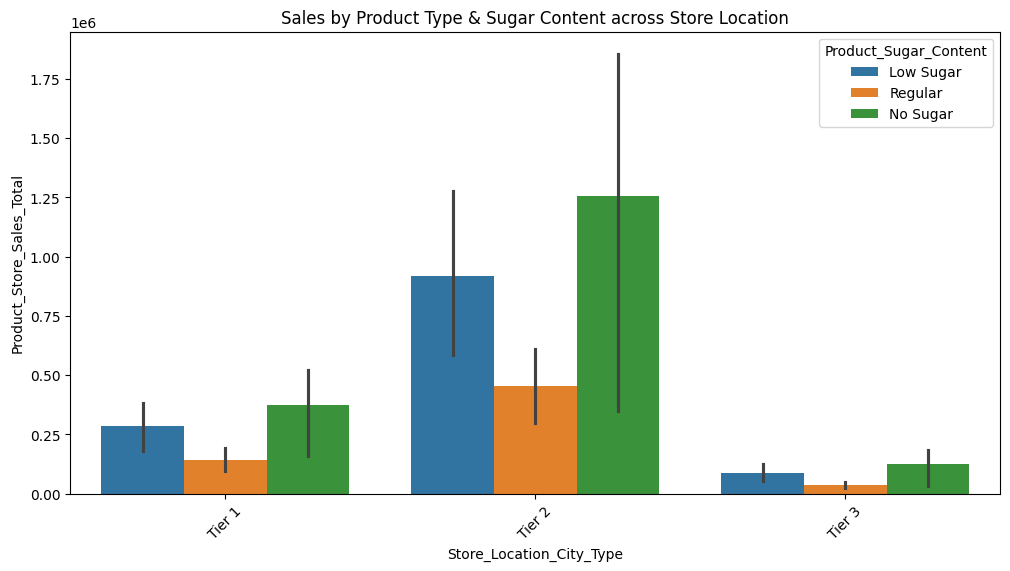

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_location, x="Store_Location_City_Type", y="Product_Store_Sales_Total",
            hue="Product_Sugar_Content")
plt.title("Sales by Product Type & Sugar Content across Store Location")
plt.xticks(rotation=45)
plt.show()


Sale of No Sugar Products are highest in all the Category of Cities followed by Low Sugar Products and Regular Products respectively.

In [ ]:
# Group by Store_Type and Store_Location_City_Type
sales_by_store_location = data_1.groupby(
    ["Store_Type", "Store_Location_City_Type"]
)["Product_Store_Sales_Total"].sum().reset_index()


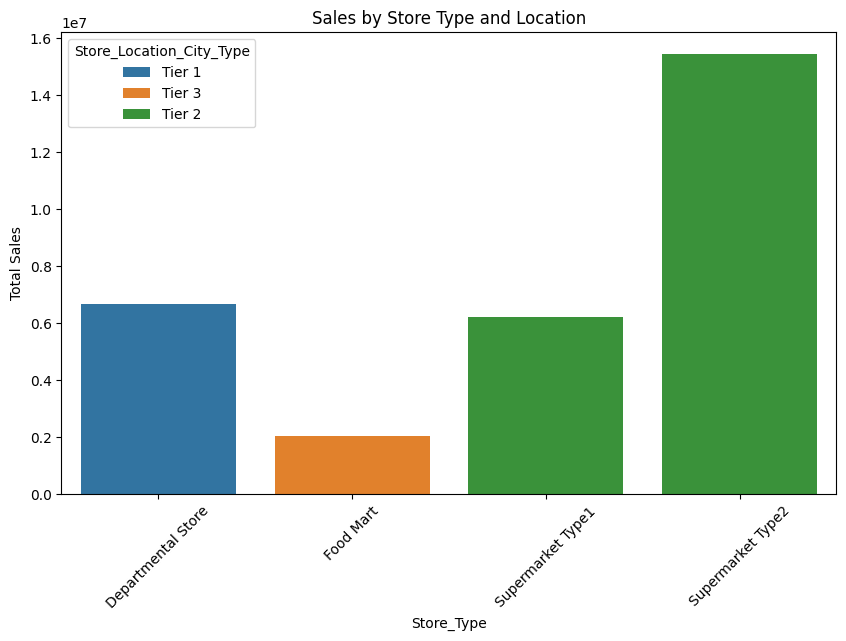

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_store_location,
            x="Store_Type",
            y="Product_Store_Sales_Total",
            hue="Store_Location_City_Type")

plt.title("Sales by Store Type and Location")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.show()


1) Sale of Products are highest from Supermarket Type 2 in Tier 2 cities followed by Supermarket Type 1.

2) Sales of Products are highest from Departmental Stores in Tier 1 Cities.

3) For Tier 3 cities maximum sales are achieved from Food Marts.

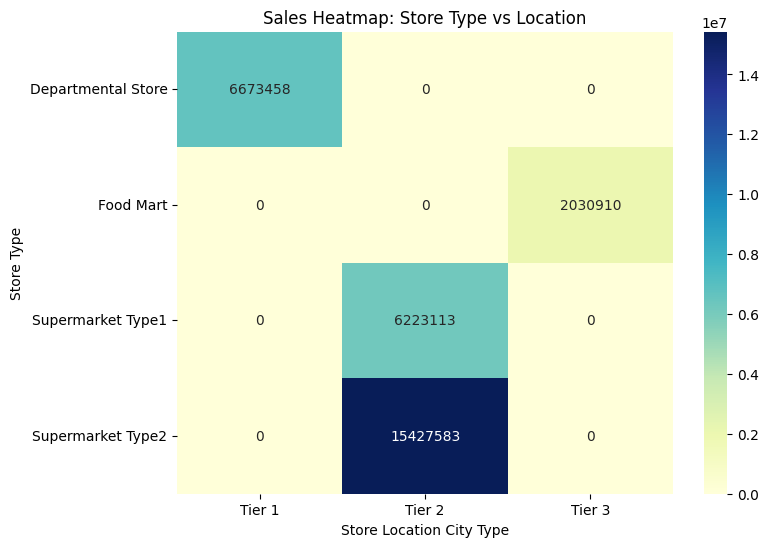

In [ ]:
pivot_sales = sales_by_store_location.pivot(
    index="Store_Type",
    columns="Store_Location_City_Type",
    values="Product_Store_Sales_Total"
).fillna(0)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Heatmap: Store Type vs Location")
plt.ylabel("Store Type")
plt.xlabel("Store Location City Type")
plt.show()


1) The plot provides details of amount of sales done from different stores at different locations.

2) Supermarket Type 2 in Tier 2 cities have Sale of 15427583, whereas Supermarket Type 1 in Tier 2 have Sale of 6223113.

3) Departmental Store in Tier 1 have sale of 6673458, whereas Food Mart in Tier 3 cities have Sale of 2030910.

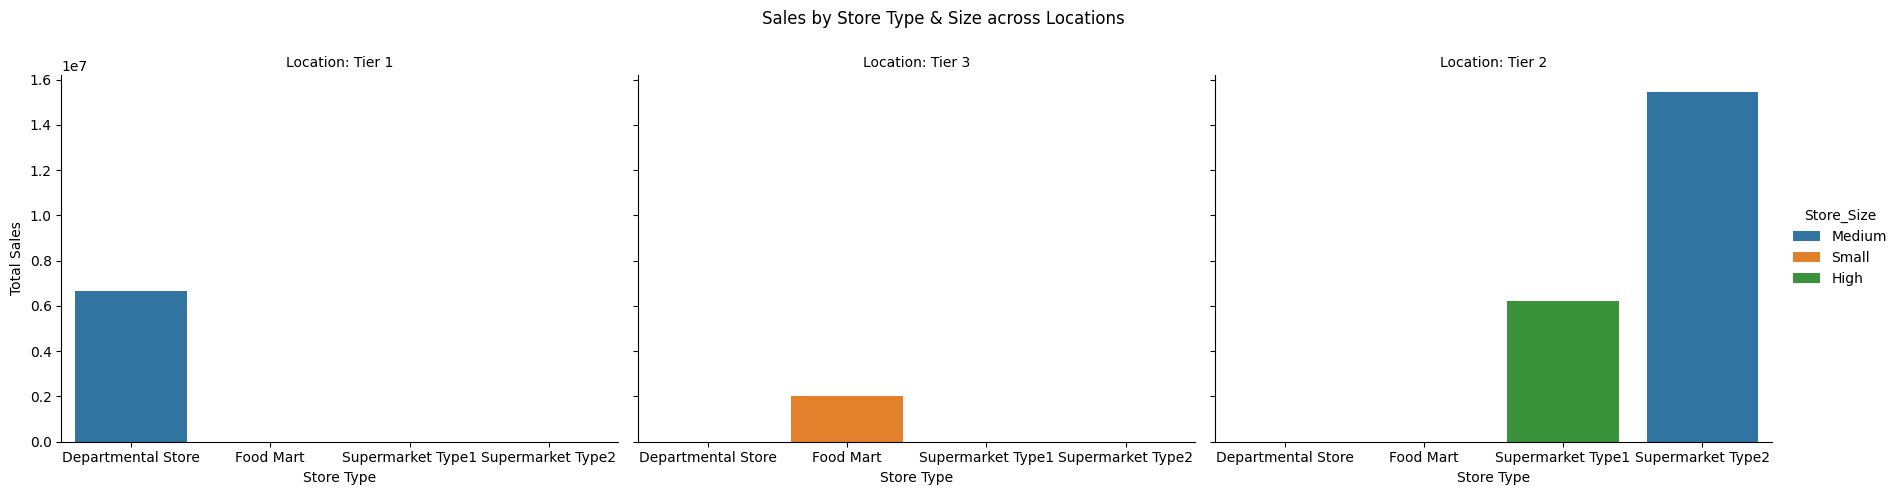

In [ ]:
g = sns.catplot(
    data=sales_by_store_location_size,
    x="Store_Type",
    y="Product_Store_Sales_Total",
    hue="Store_Size",
    col="Store_Location_City_Type",
    kind="bar",
    height=5,
    aspect=1.2
)
g.set_titles("Location: {col_name}")
g.set_axis_labels("Store Type", "Total Sales")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Sales by Store Type & Size across Locations")
plt.show()


### **Segregate Product IDs by Product Type**

In [ ]:
# Create dictionary: {Product_Type: list of Product_Ids}
product_dict = data_1.groupby("Product_Type")["Product_Id"].unique().to_dict()


### **Using Segregation for Analysis**

**Sales Distribution:  Which product IDs dominate sales inside each category?**

In [ ]:
sales_by_product_type = data_1.groupby(["Product_Type", "Product_Id"])["Product_Store_Sales_Total"].sum().reset_index()


**Store Performance: Which products from a category perform best in which stores?**

In [ ]:
sales_by_type_store = data_1.groupby(["Product_Type", "Product_Id", "Store_Id"])["Product_Store_Sales_Total"].sum().reset_index()


**Category Trends by Location: Which city tiers prefer which product IDs inside a type?**

In [ ]:
sales_by_type_location = data_1.groupby(["Product_Type", "Product_Id", "Store_Location_City_Type"])["Product_Store_Sales_Total"].sum().reset_index()


In [ ]:
def analyze_products_all_dimensions(data_1, top_n=5):
    """
    Analyze sales by product categories across multiple store dimensions.

    Parameters:
    data_1 : DataFrame
    top_n : int -> number of top products per category

    Returns:
    results : dict with results per product category and dimension
    """
    results = {}
    dimensions = ["Store_Type", "Store_Size", "Store_Location_City_Type"]

    for category in data_1["Product_Type"].unique():
        sub_data_1 = data_1[data_1["Product_Type"] == category]

        # Total sales per product
        sales_by_product = sub_data_1.groupby("Product_Id")["Product_Store_Sales_Total"].sum().reset_index()

        # Get Top N products
        top_products = sales_by_product.sort_values("Product_Store_Sales_Total", ascending=False).head(top_n)
        top_ids = top_products["Product_Id"].tolist()

        # Store results for this category
        results[category] = {"top_products": top_products, "grouped_sales": {}}

        # Loop over each store dimension
        for dim in dimensions:
            grouped_sales = (
                sub_data_1[sub_data_1["Product_Id"].isin(top_ids)]
                .groupby([dim, "Product_Id"])["Product_Store_Sales_Total"]
                .sum()
                .reset_index()
            )

            results[category]["grouped_sales"][dim] = grouped_sales

            # --- Visualization ---
            plt.figure(figsize=(10,6))
            sns.barplot(data=grouped_sales, x=dim, y="Product_Store_Sales_Total", hue="Product_Id")
            plt.title(f"Top {top_n} Products in {category} by {dim}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    return results



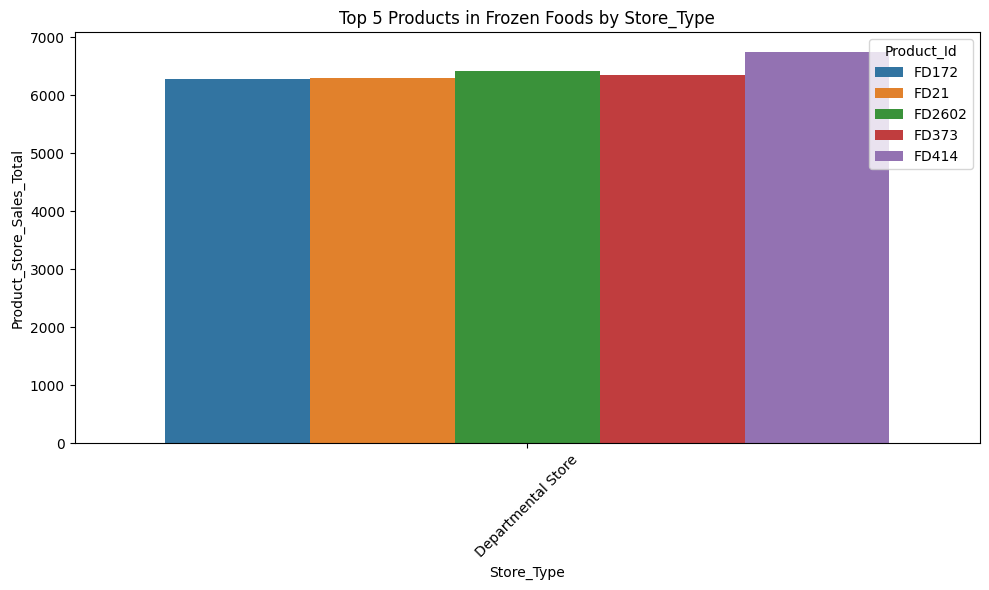

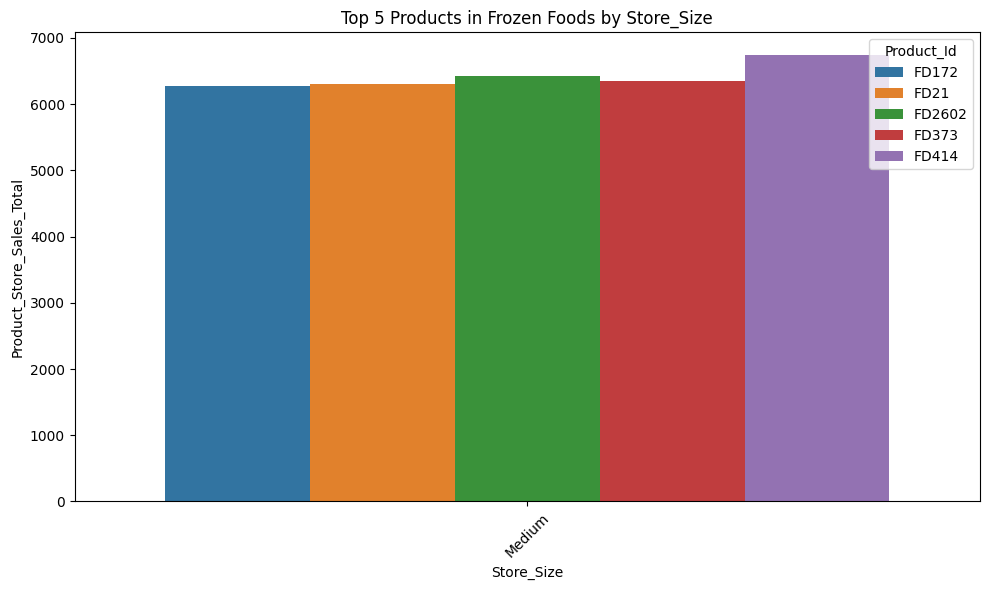

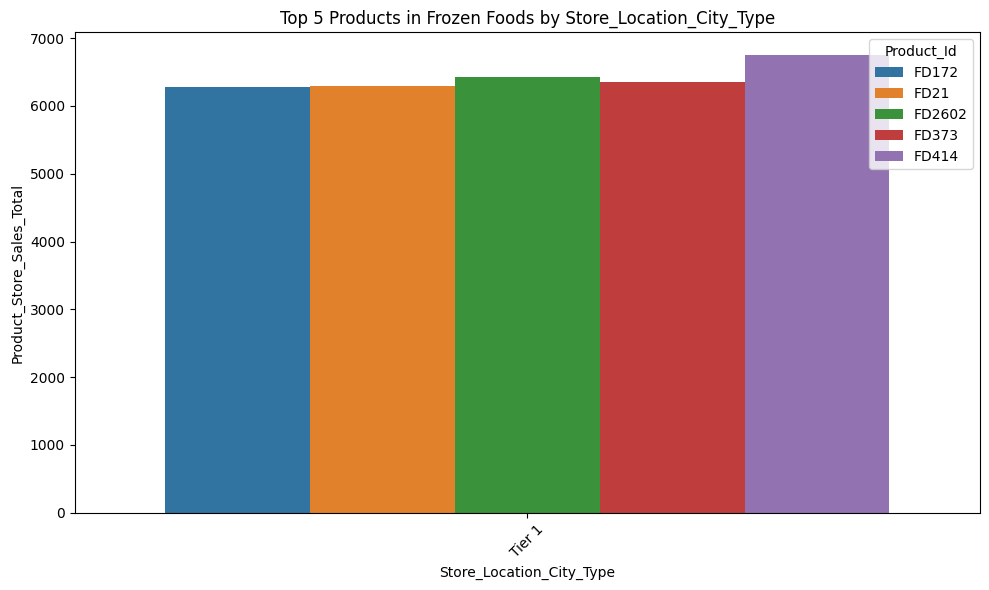

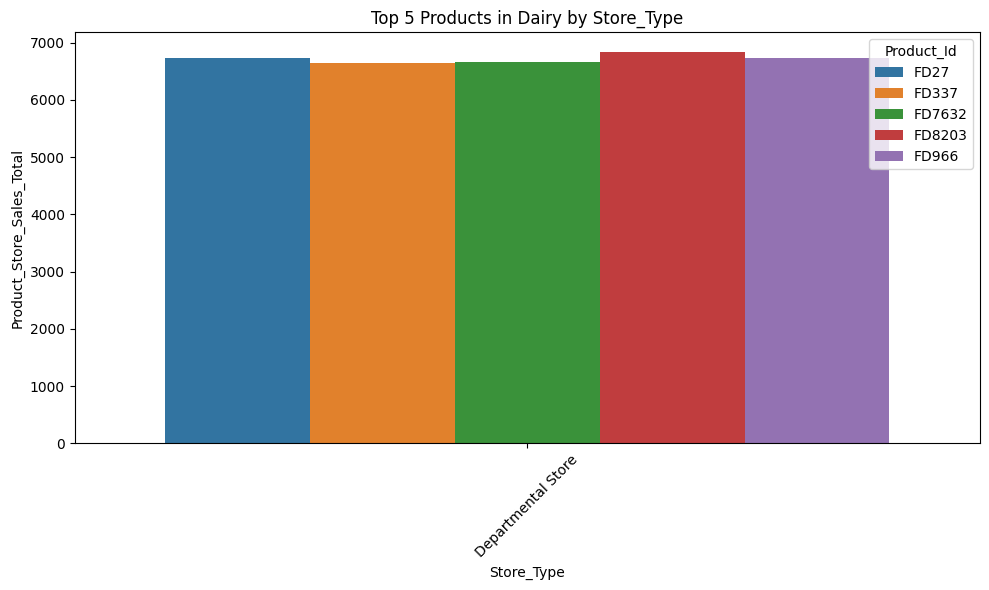

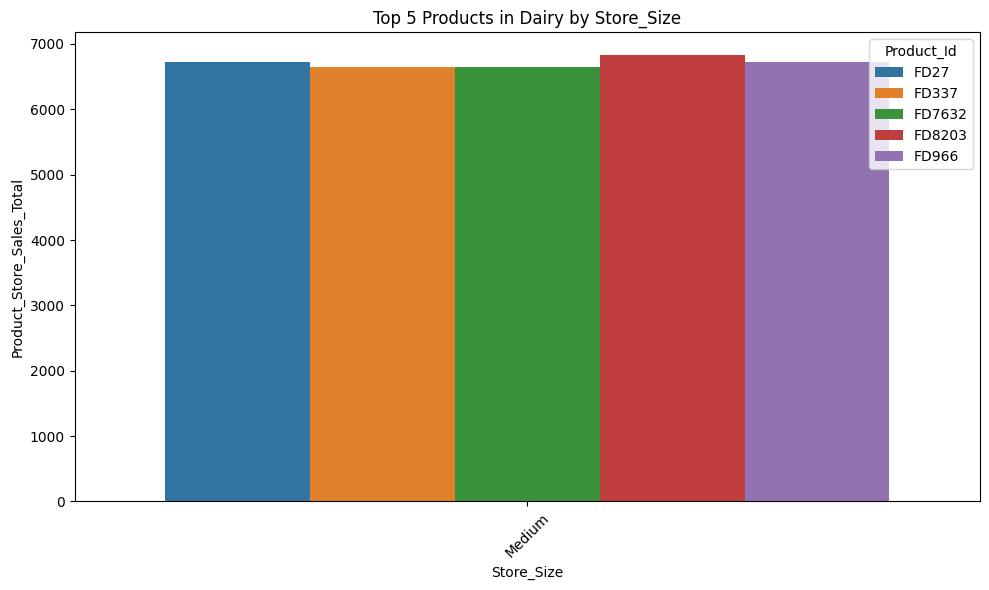

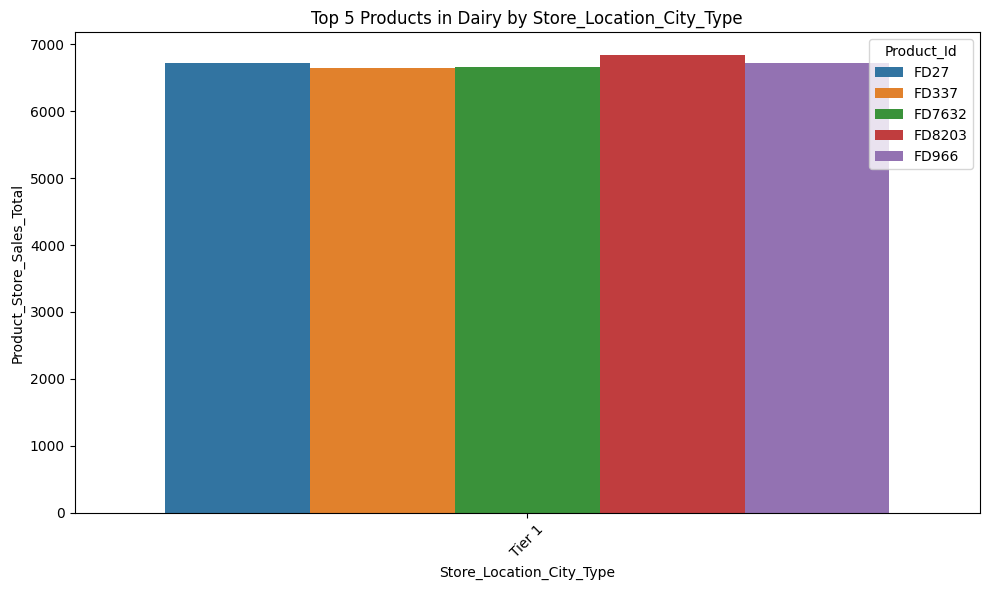

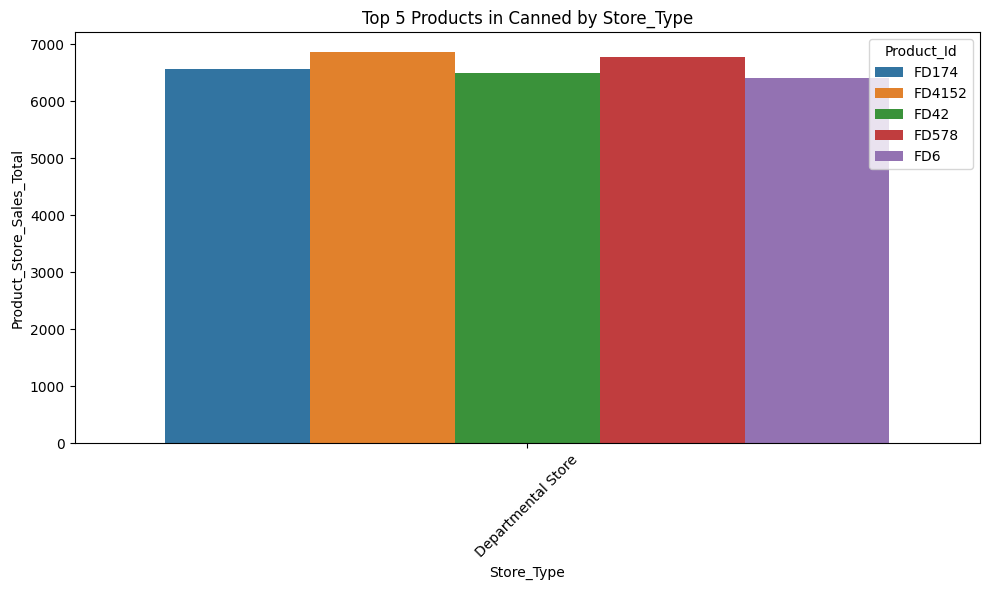

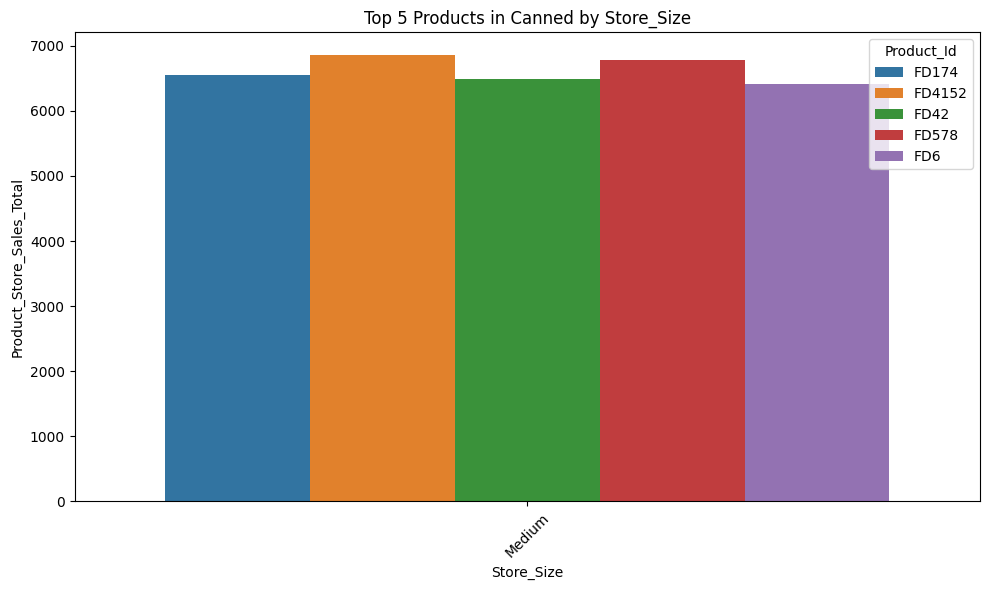

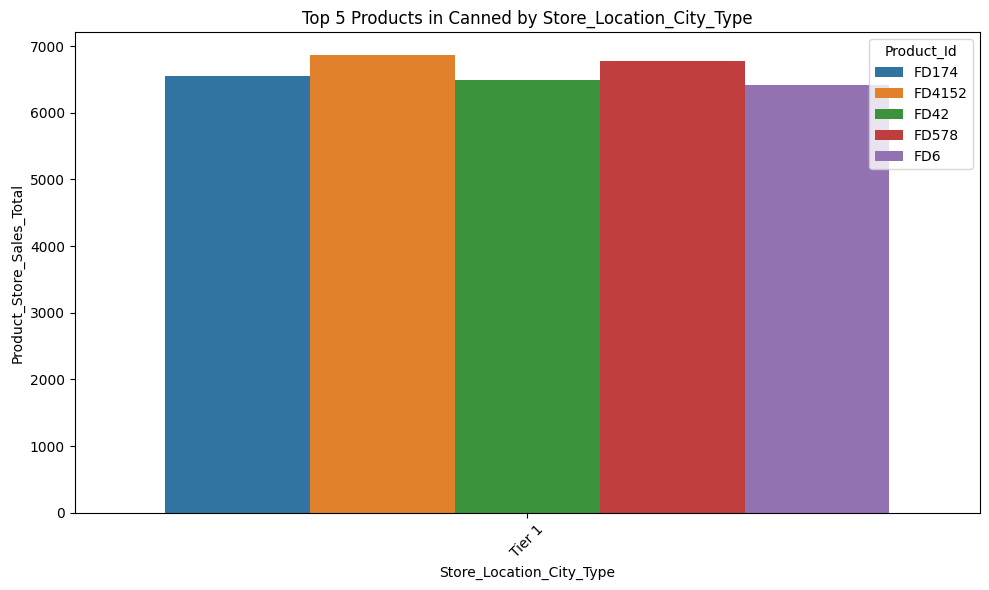

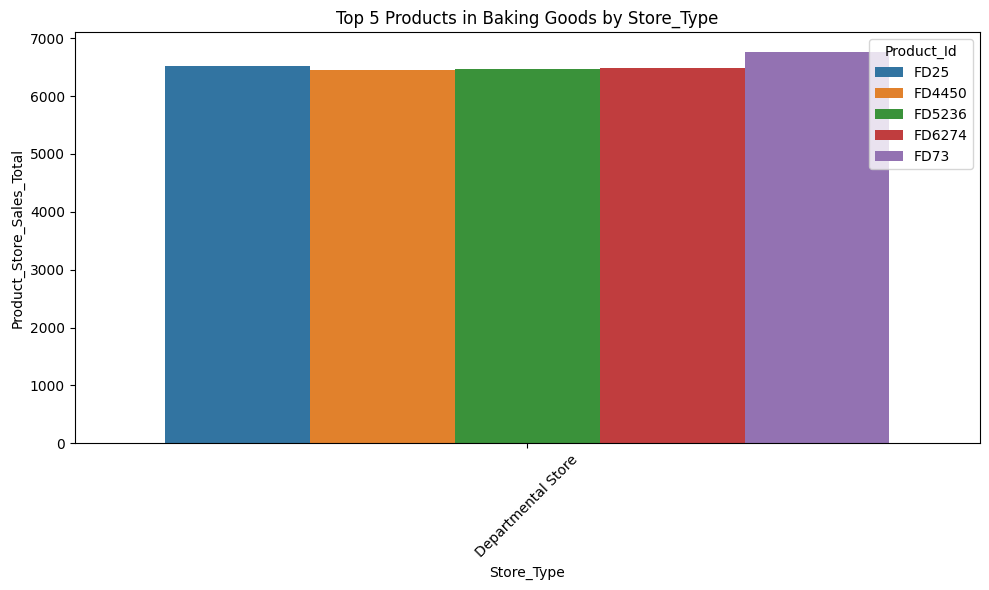

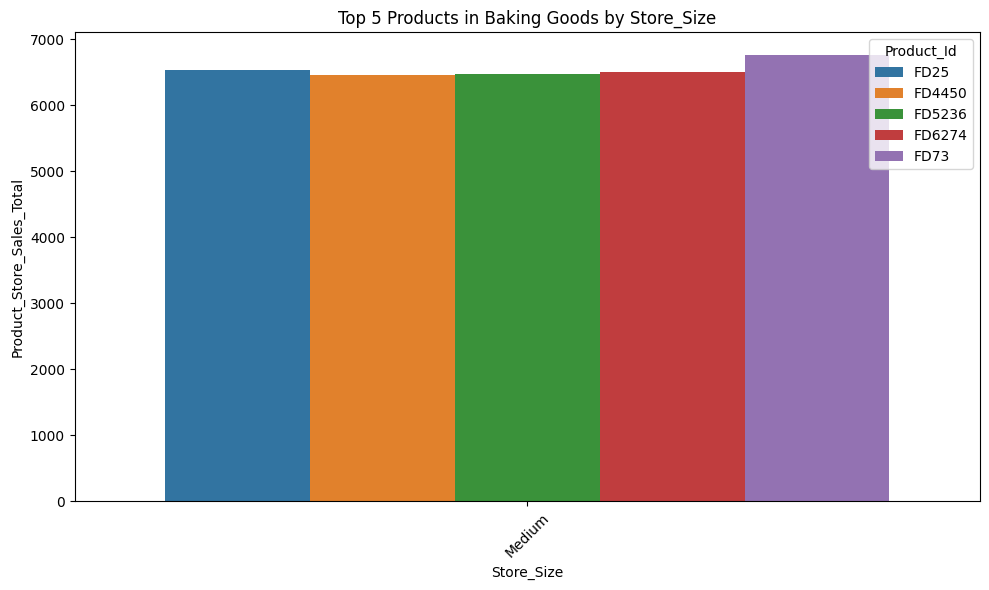

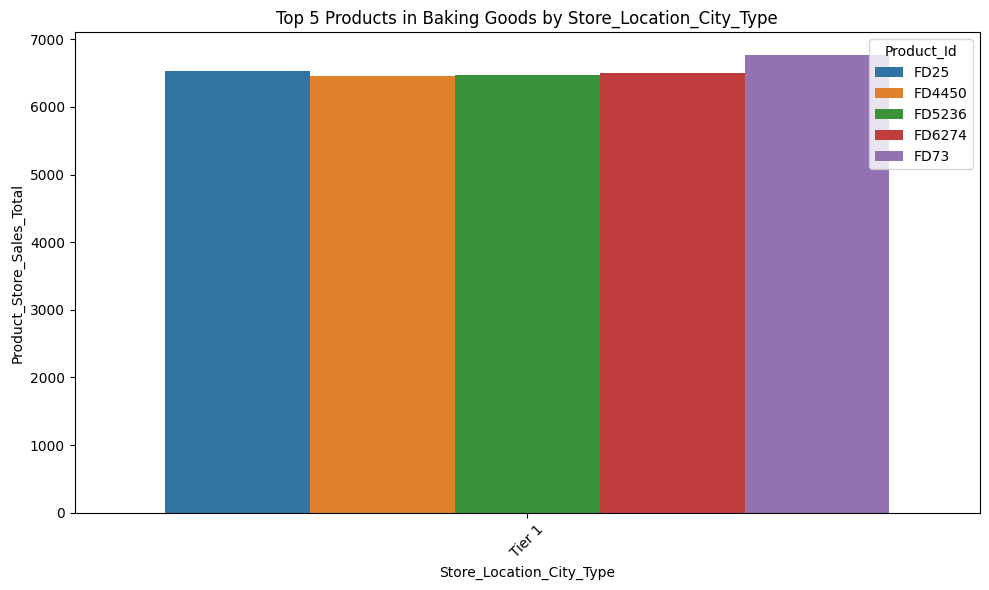

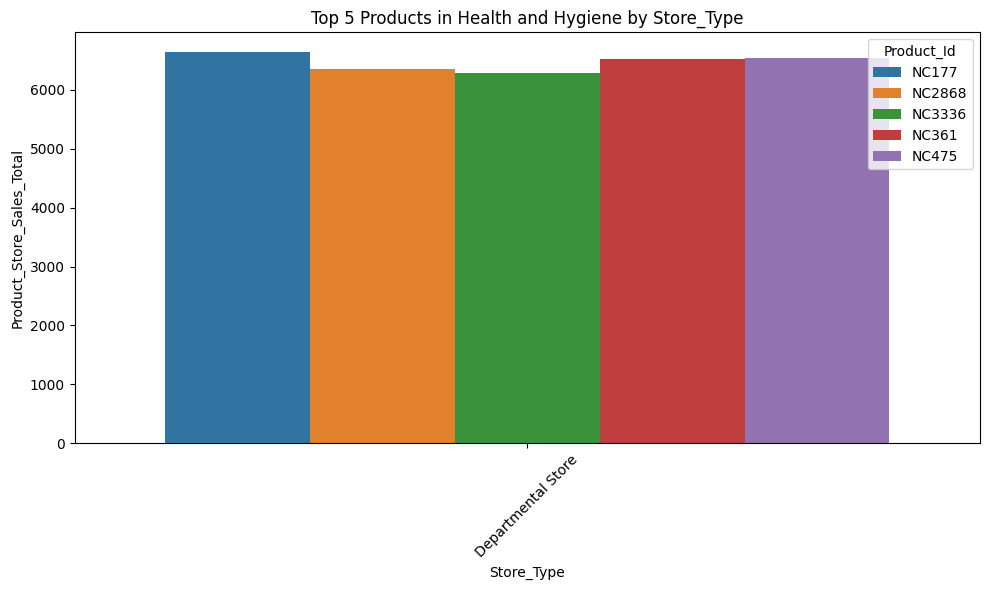

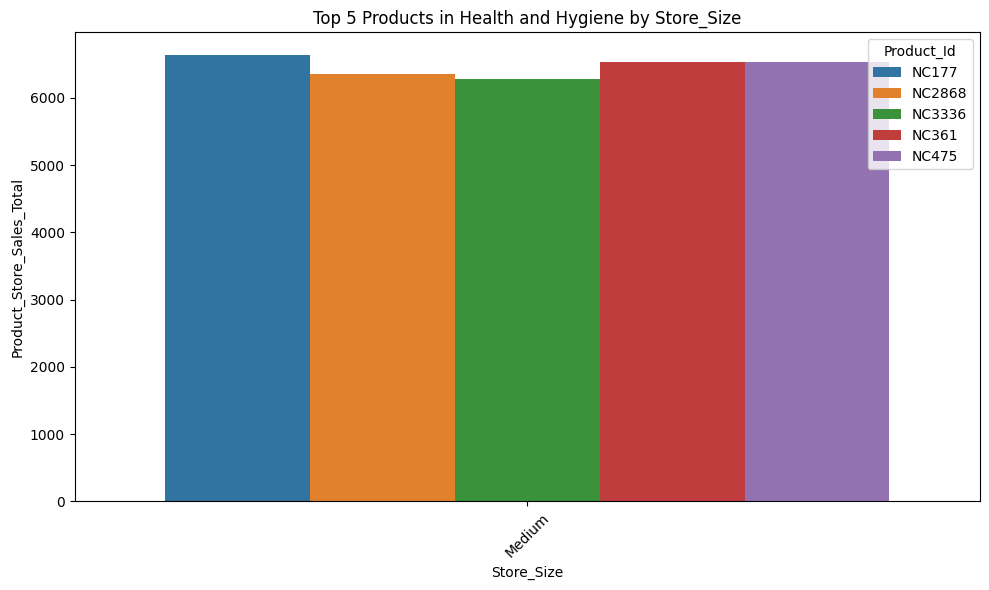

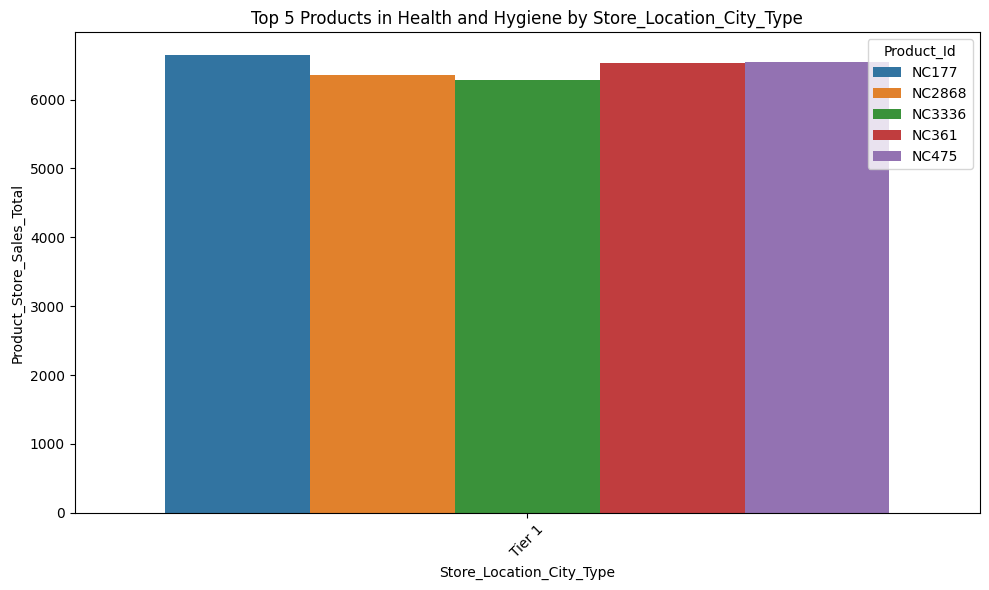

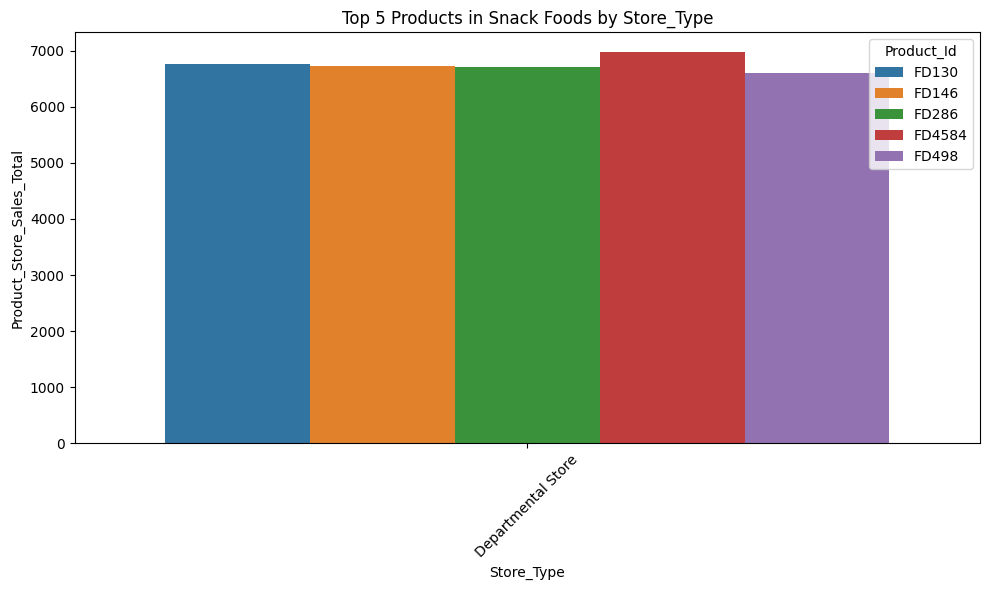

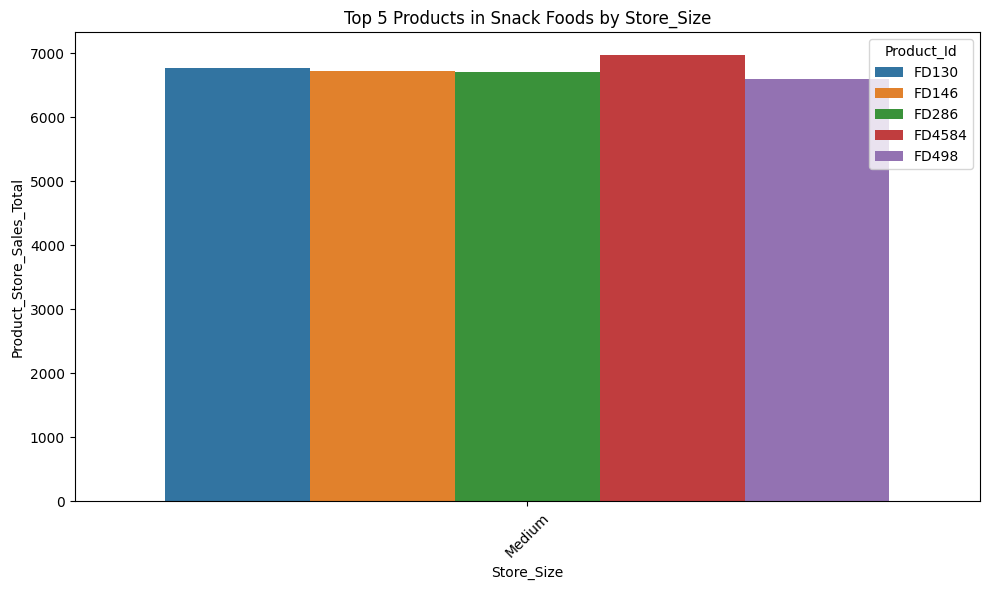

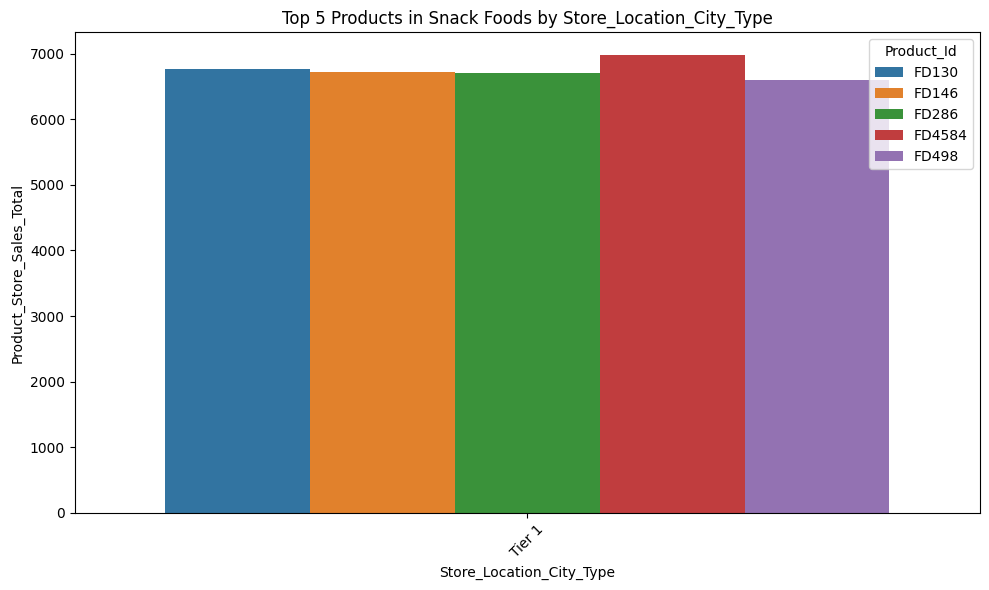

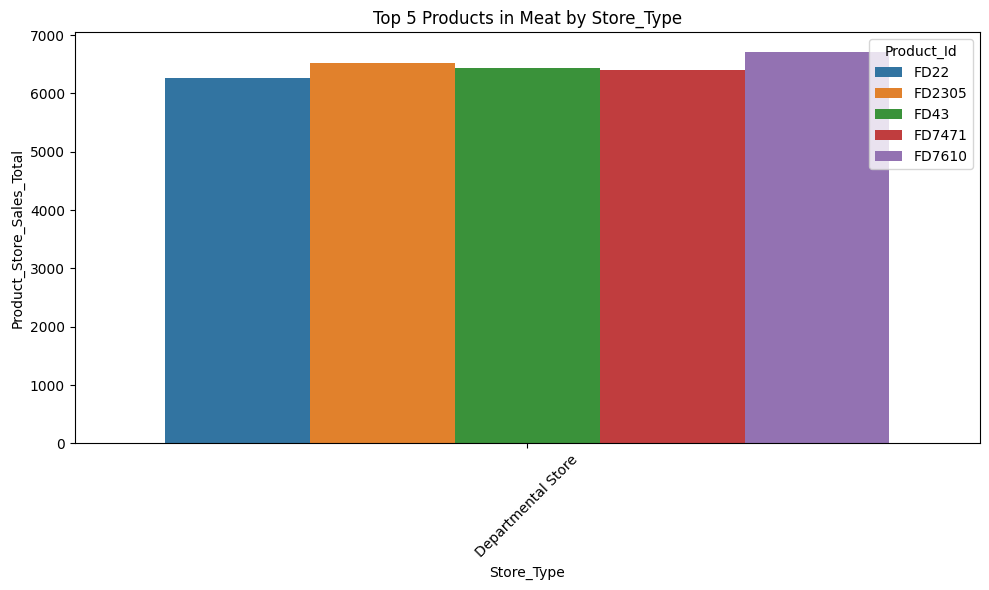

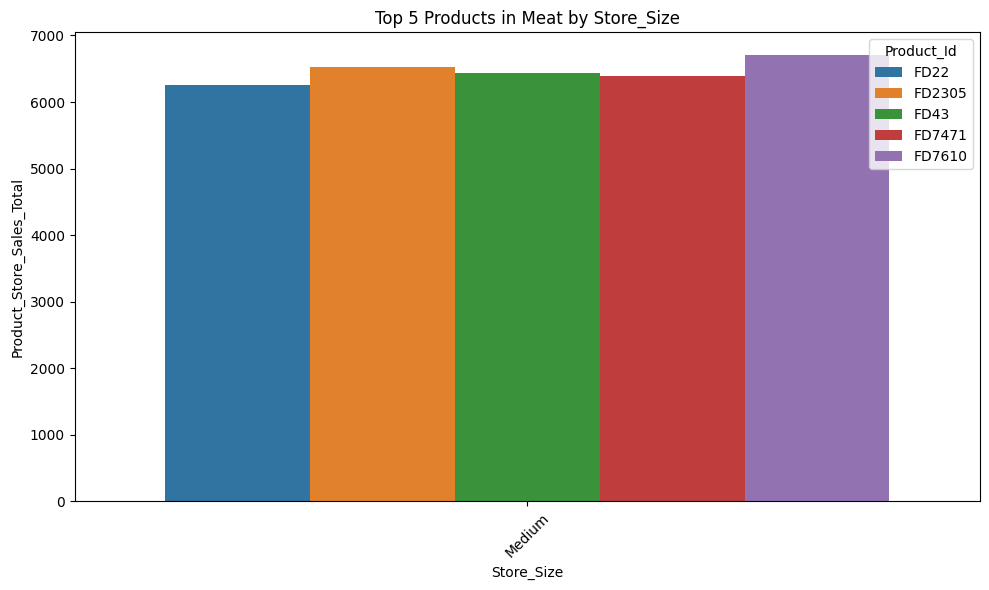

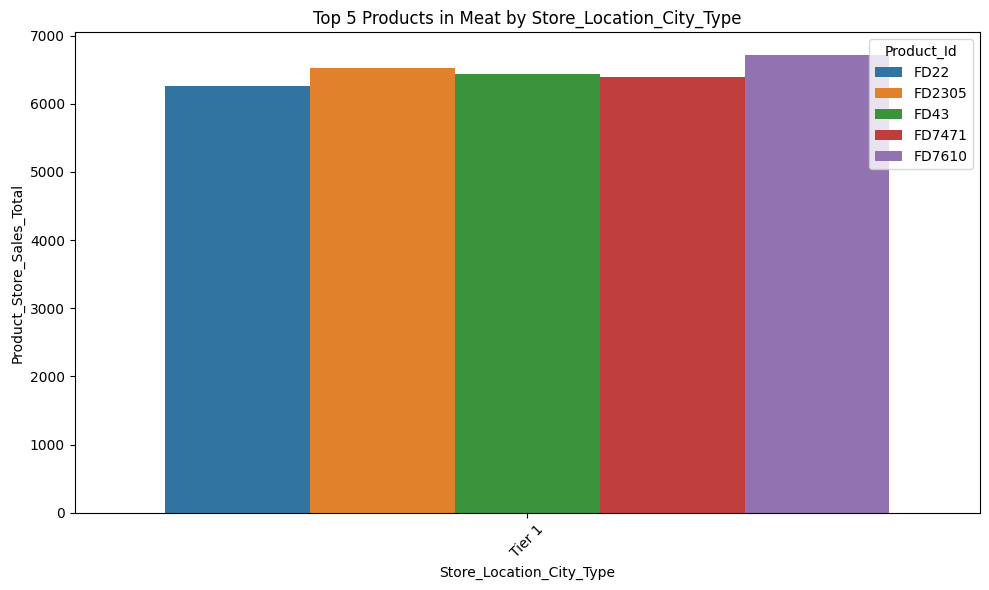

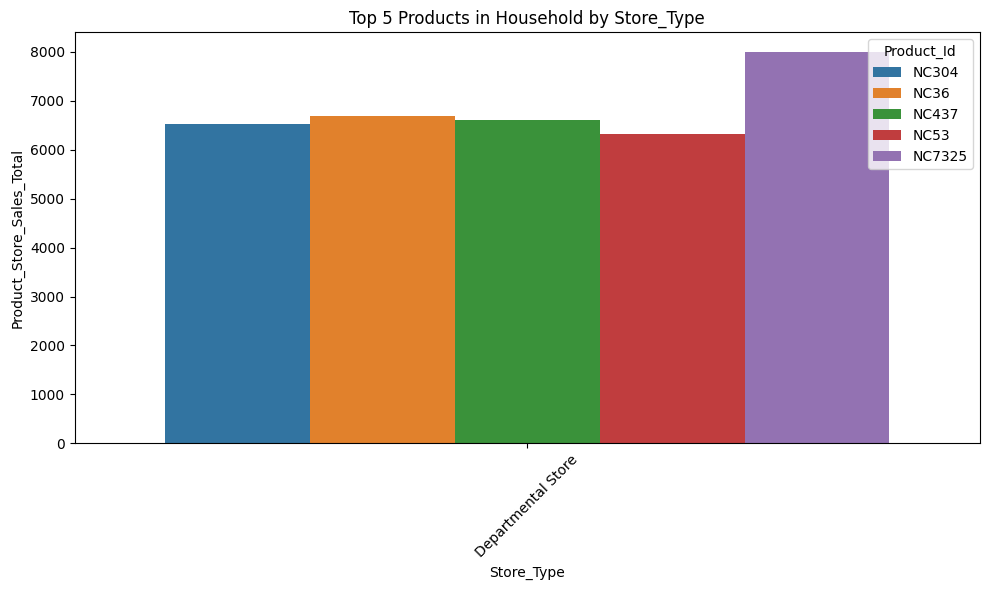

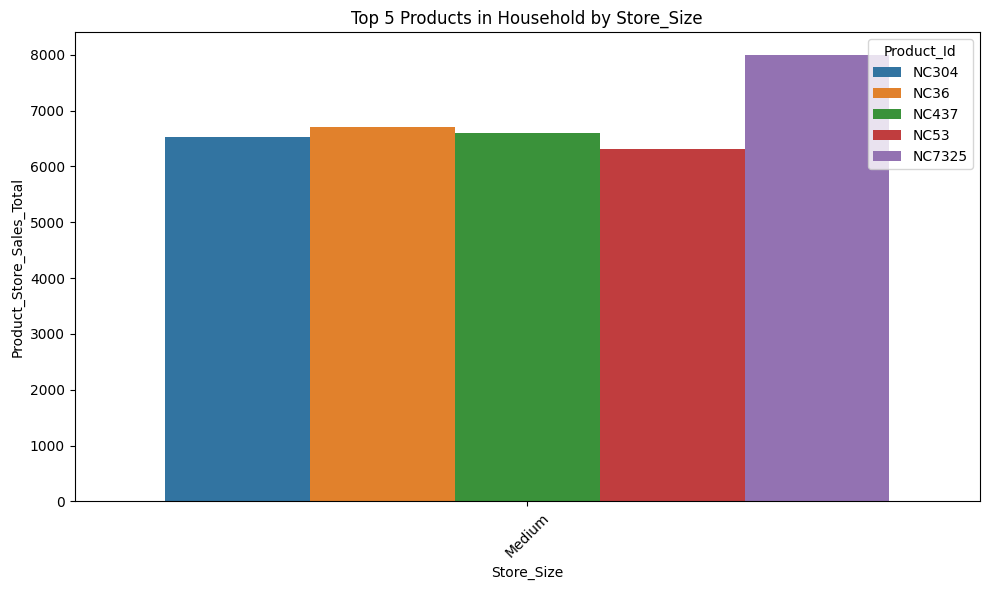

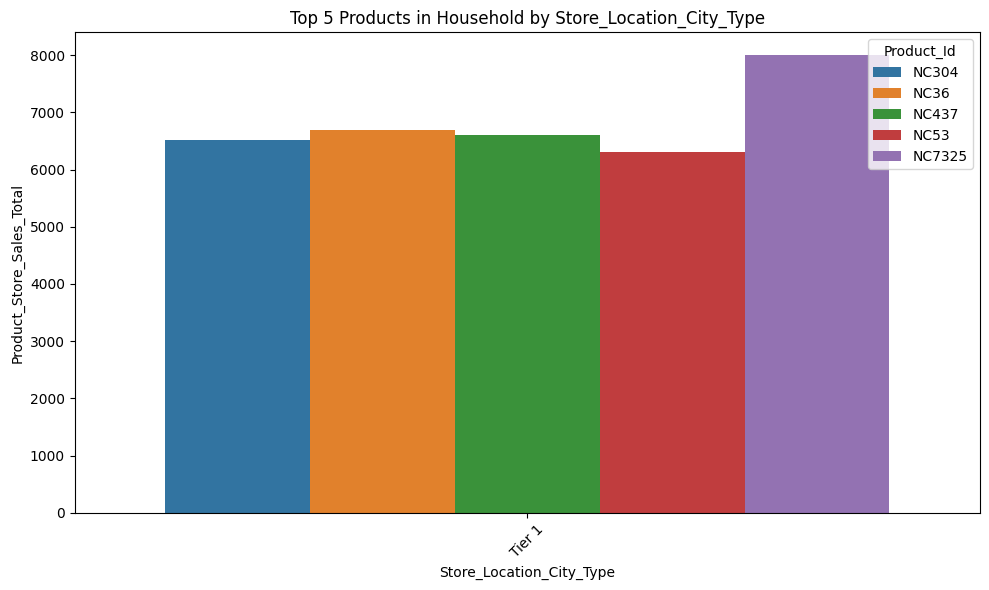

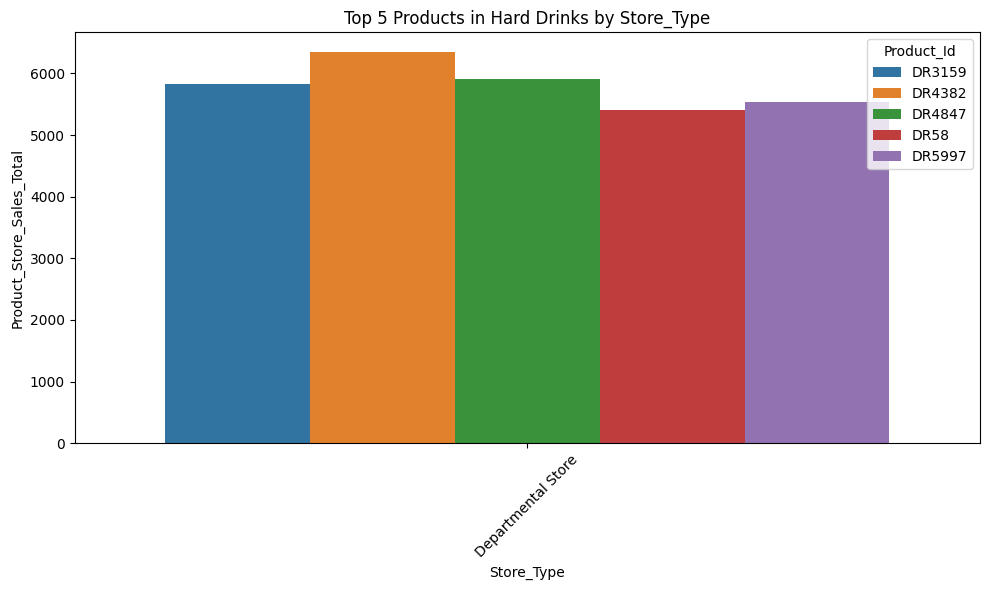

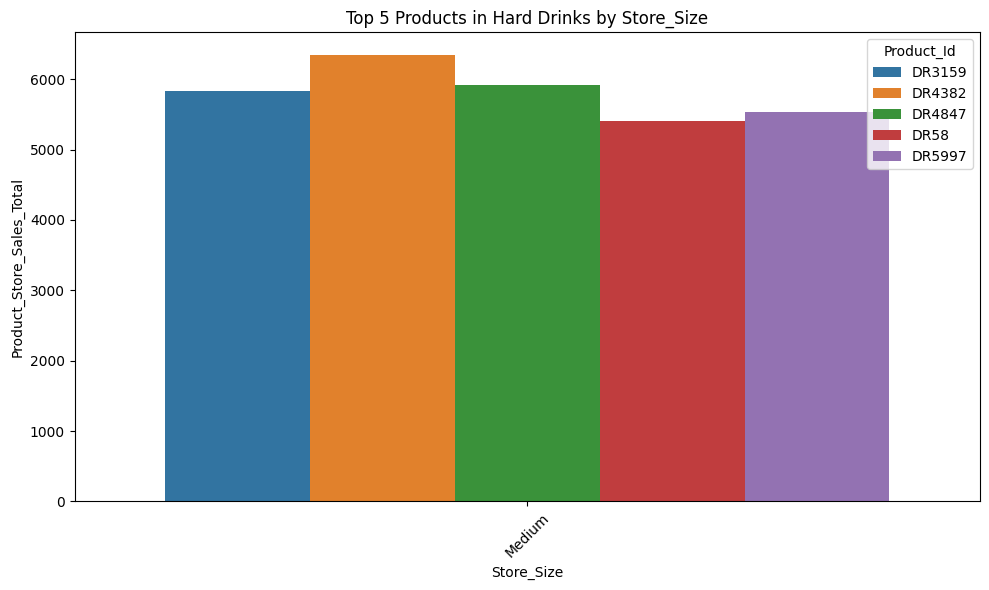

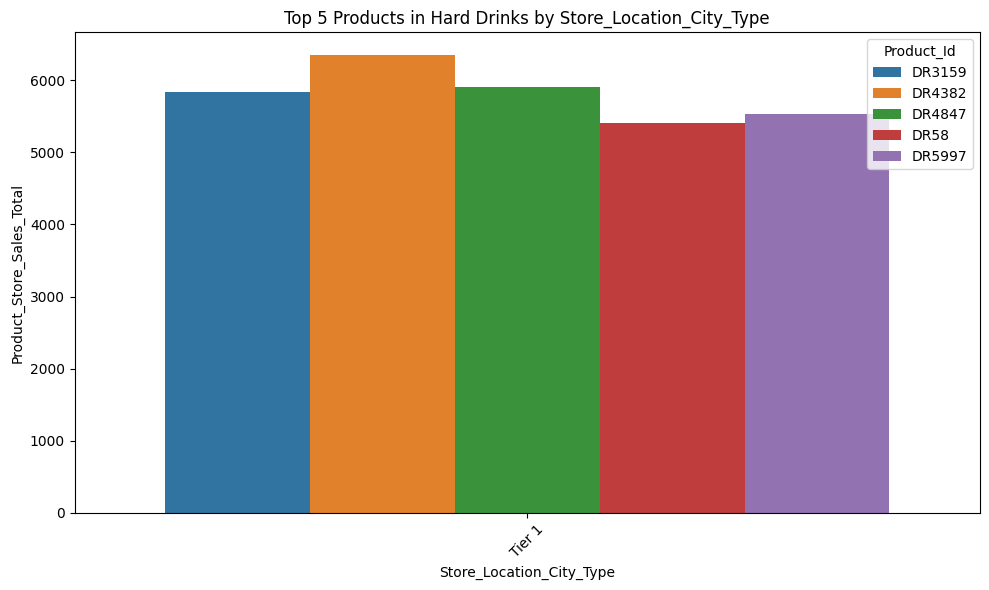

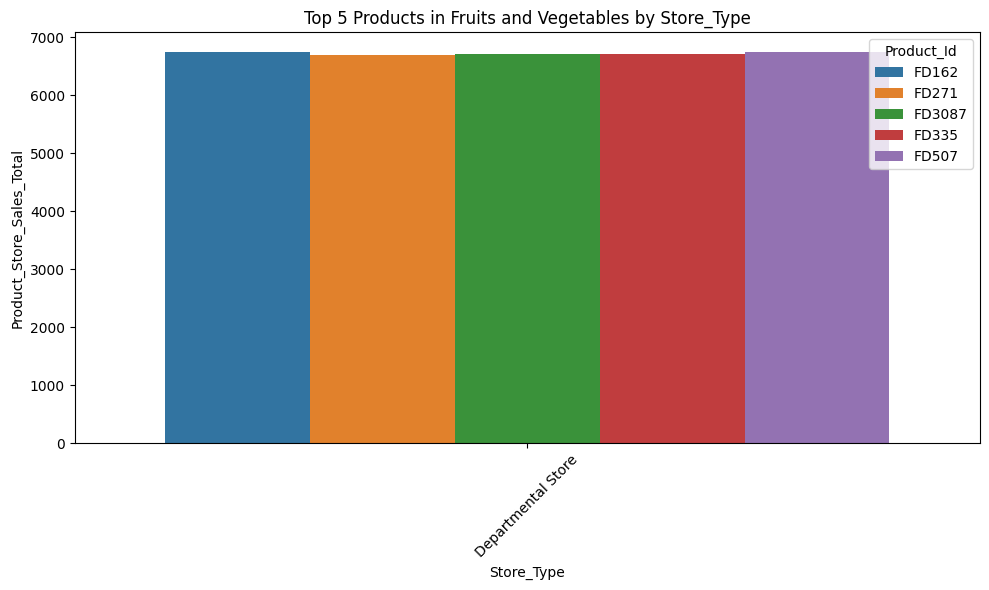

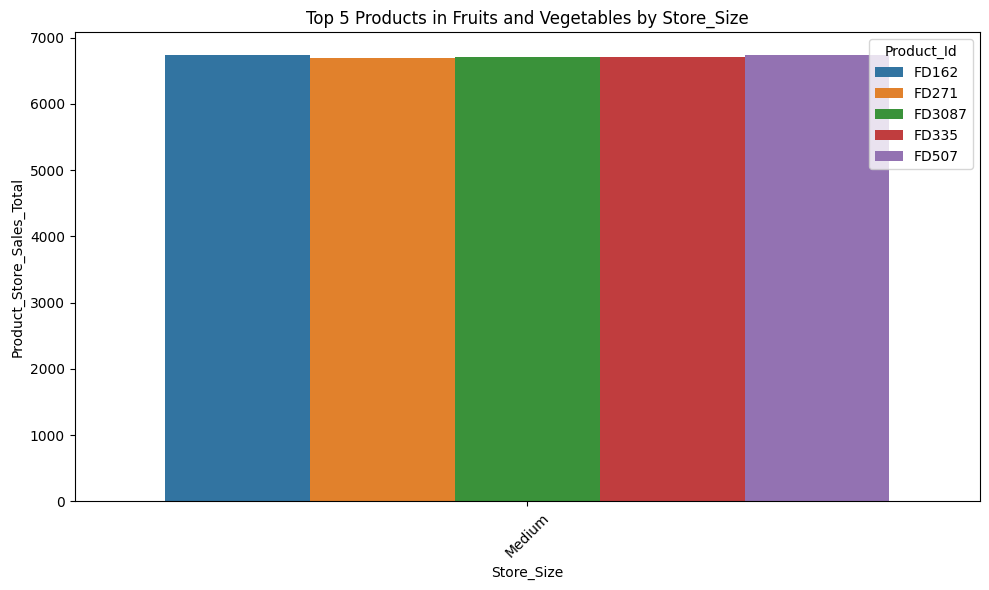

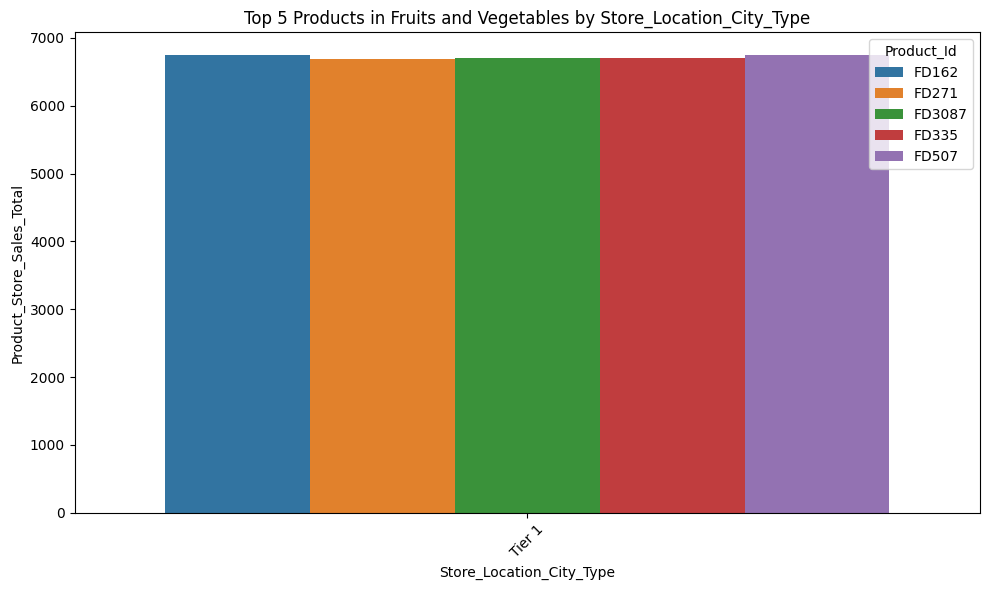

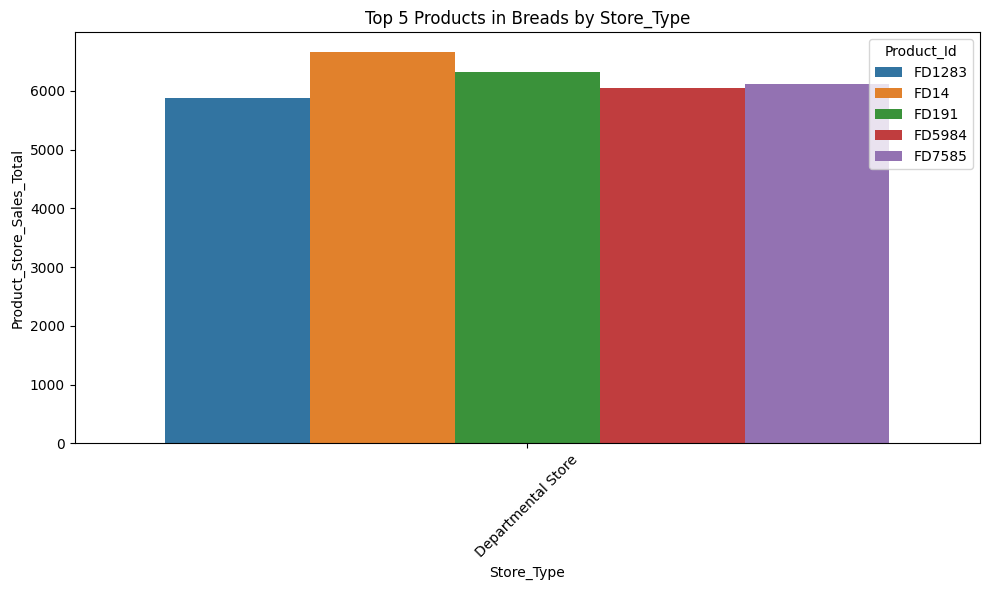

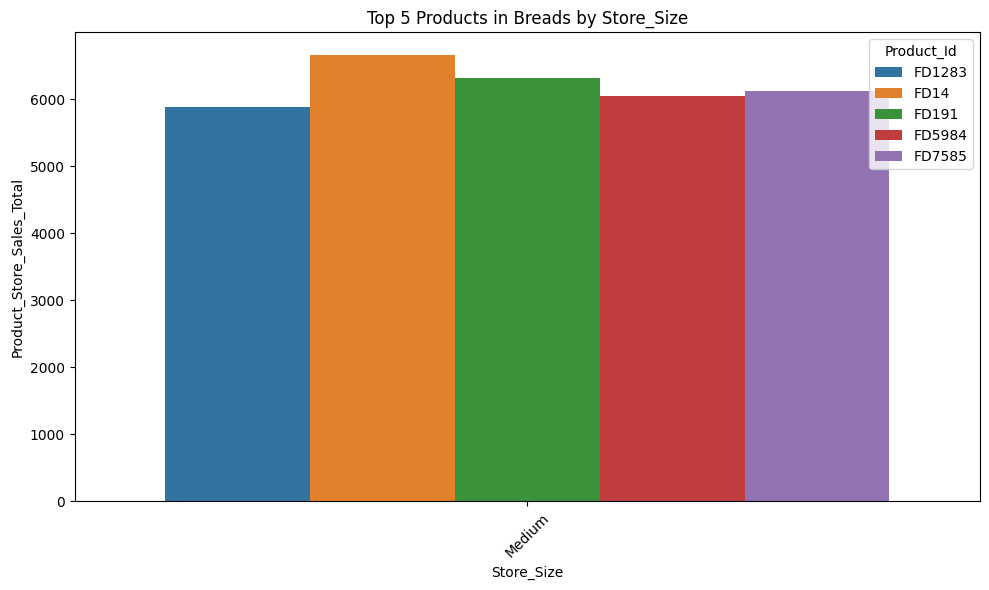

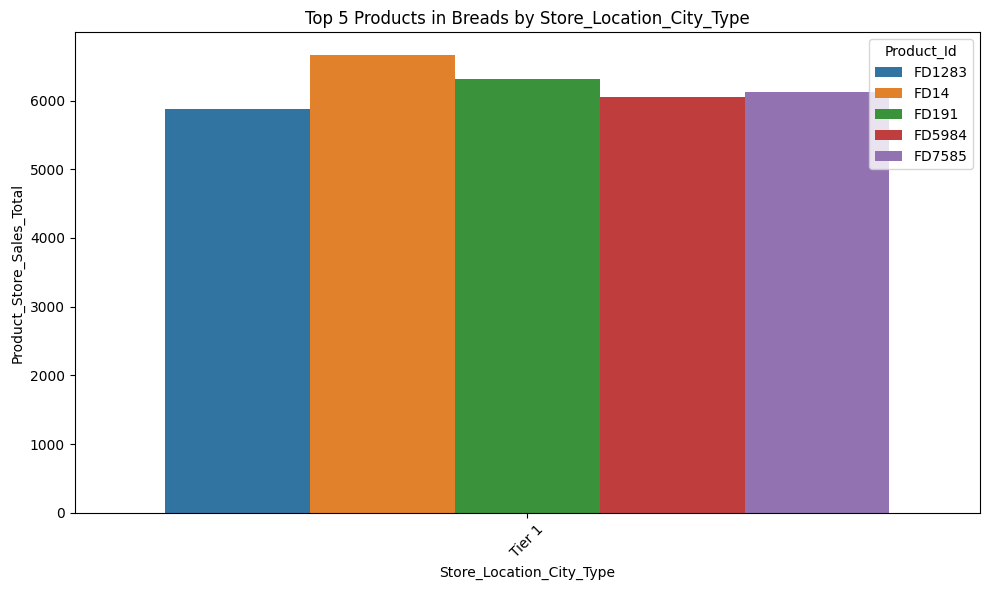

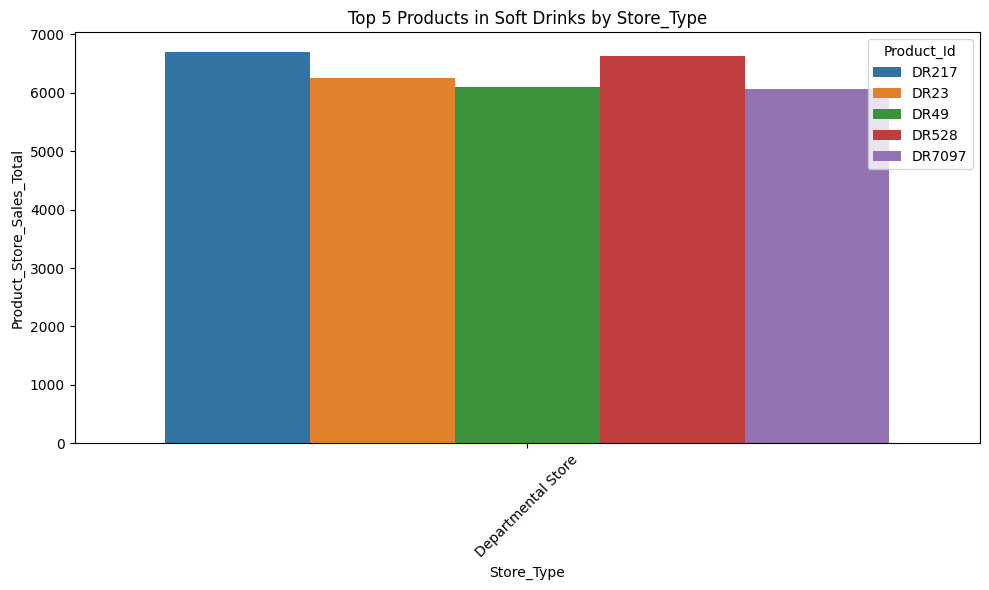

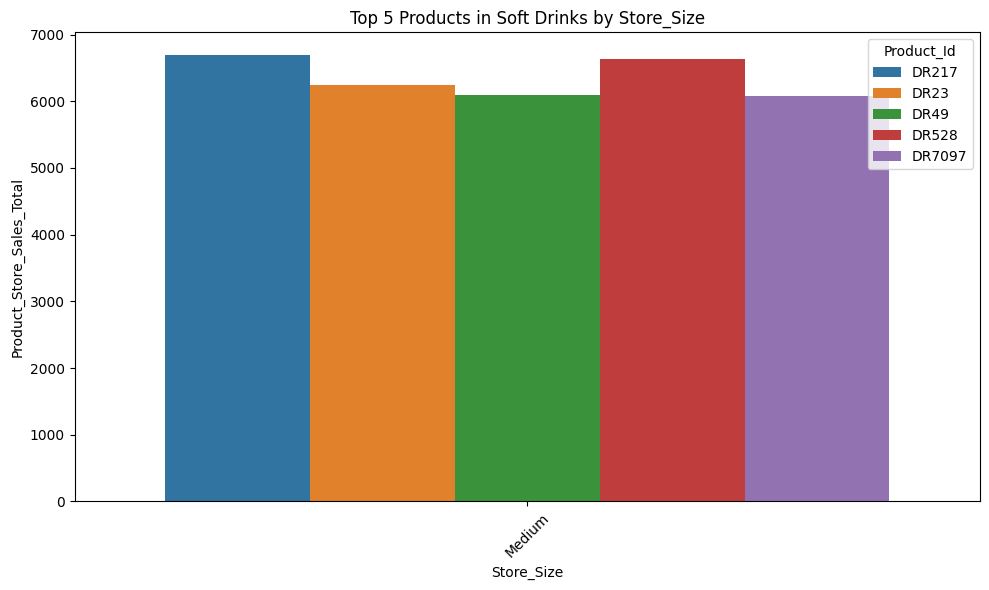

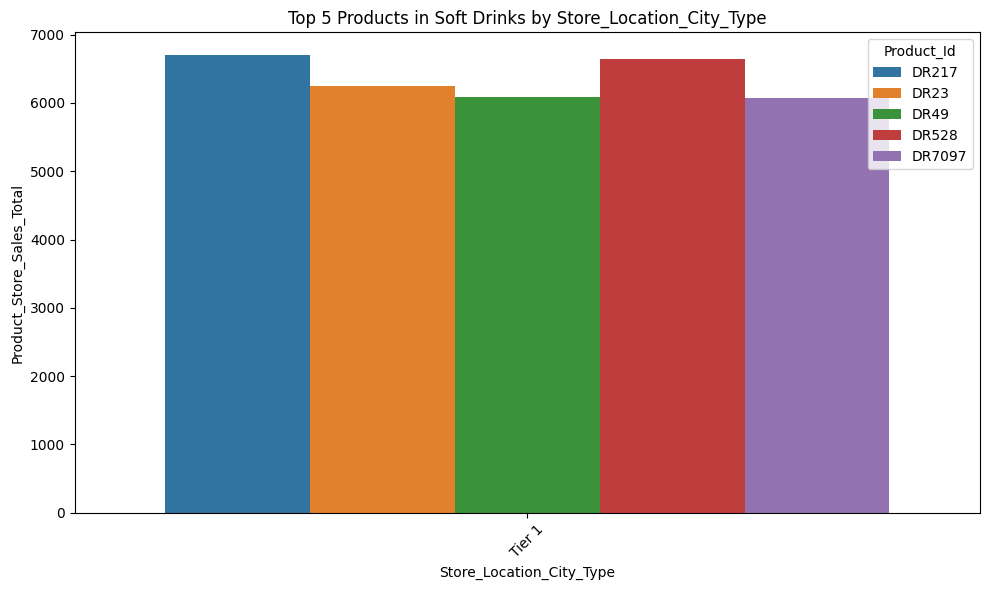

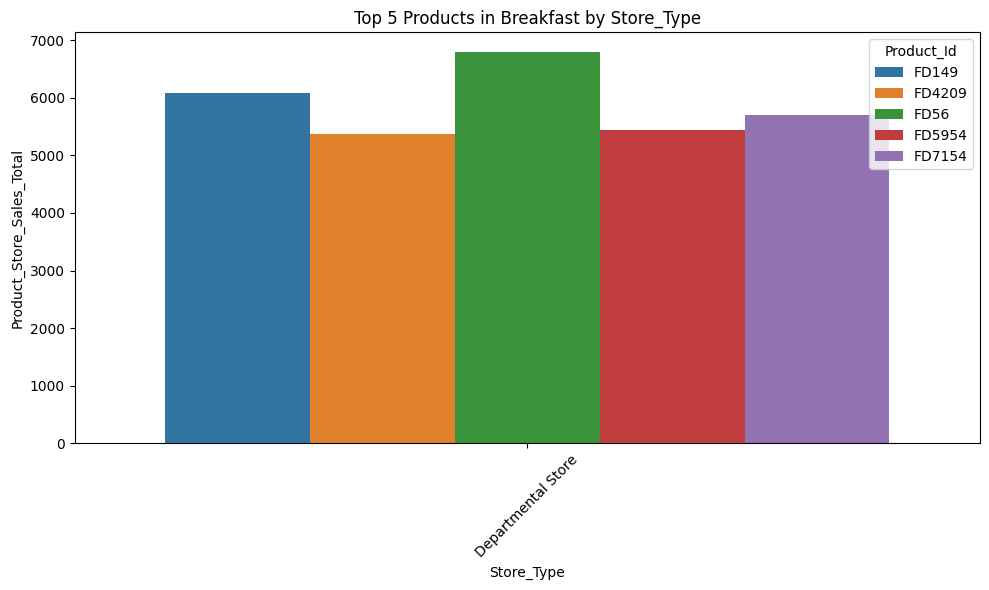

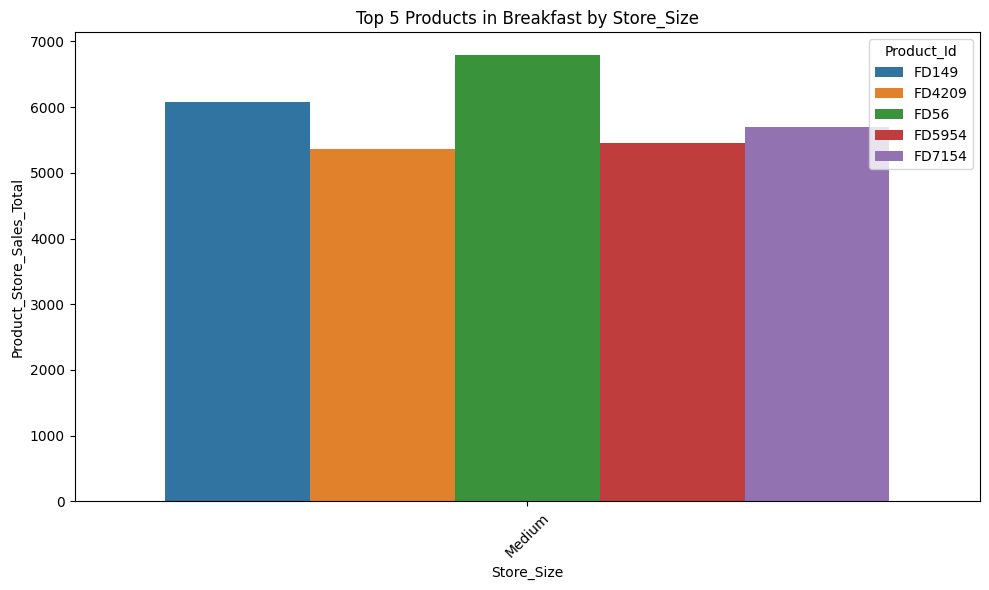

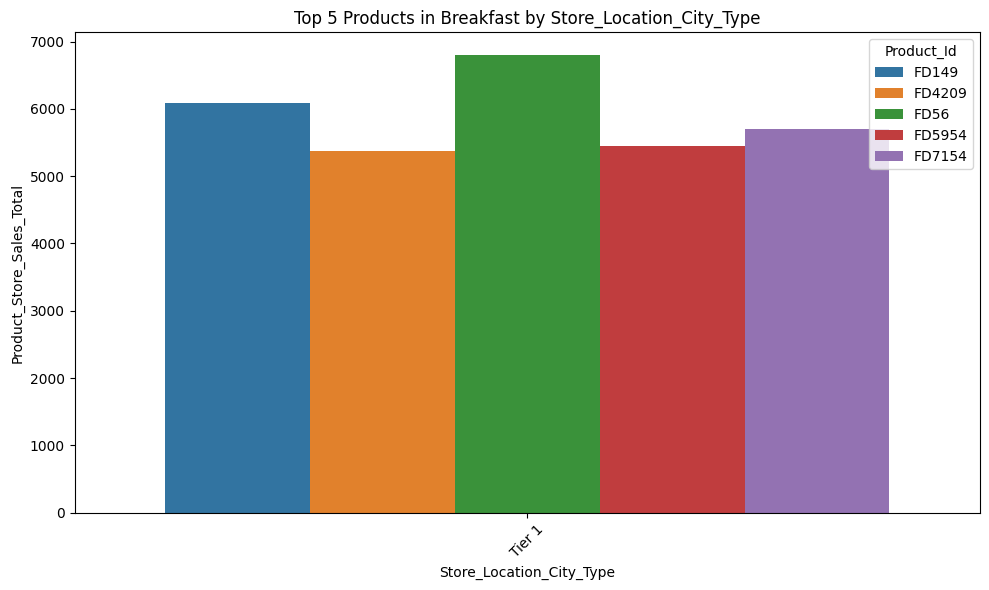

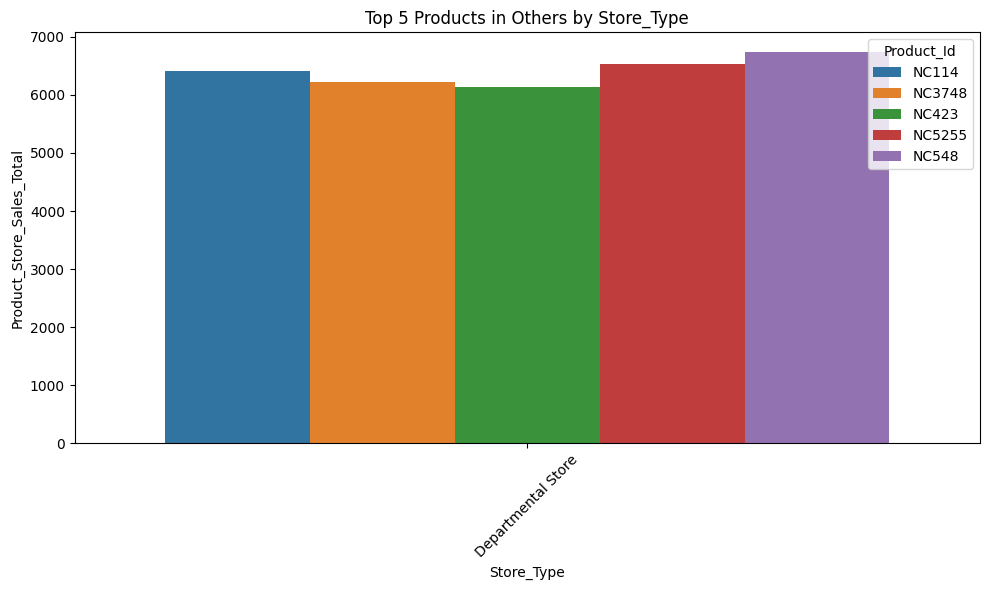

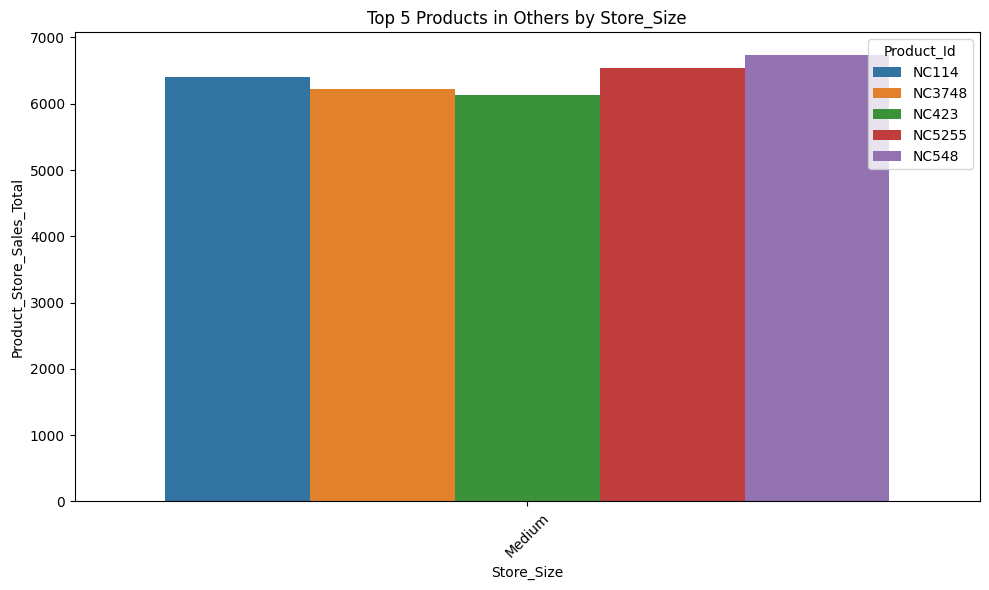

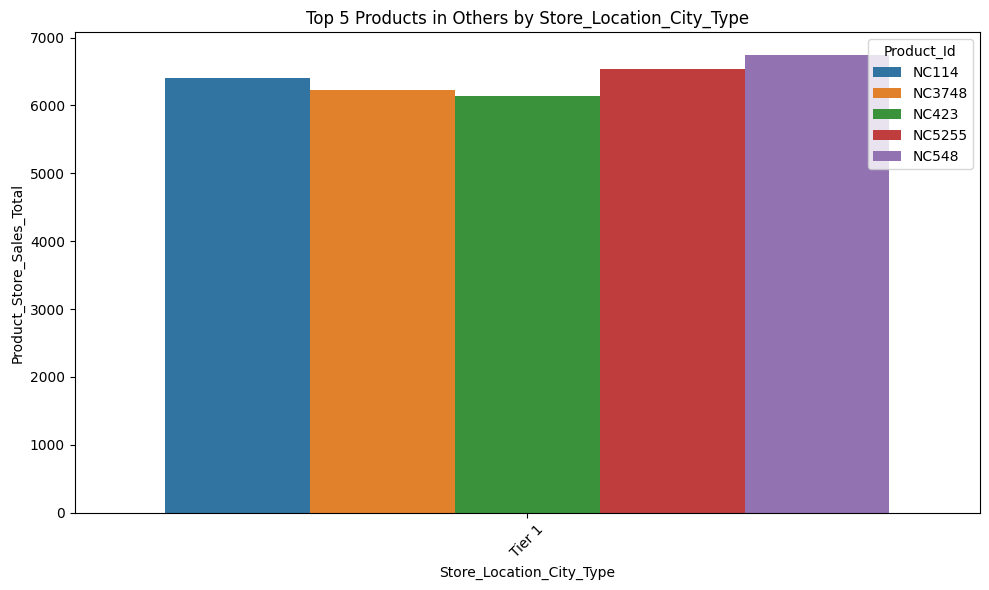

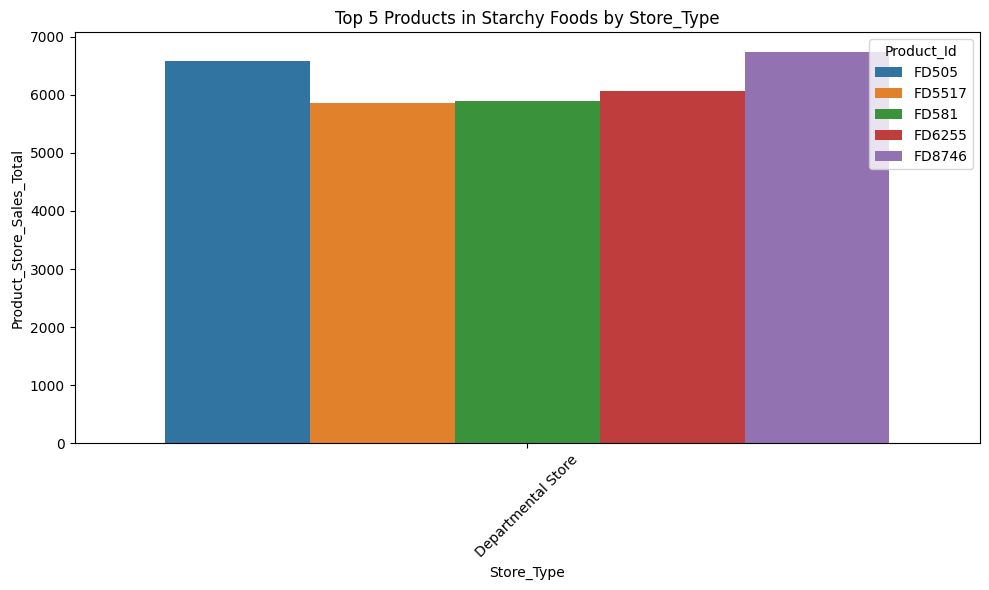

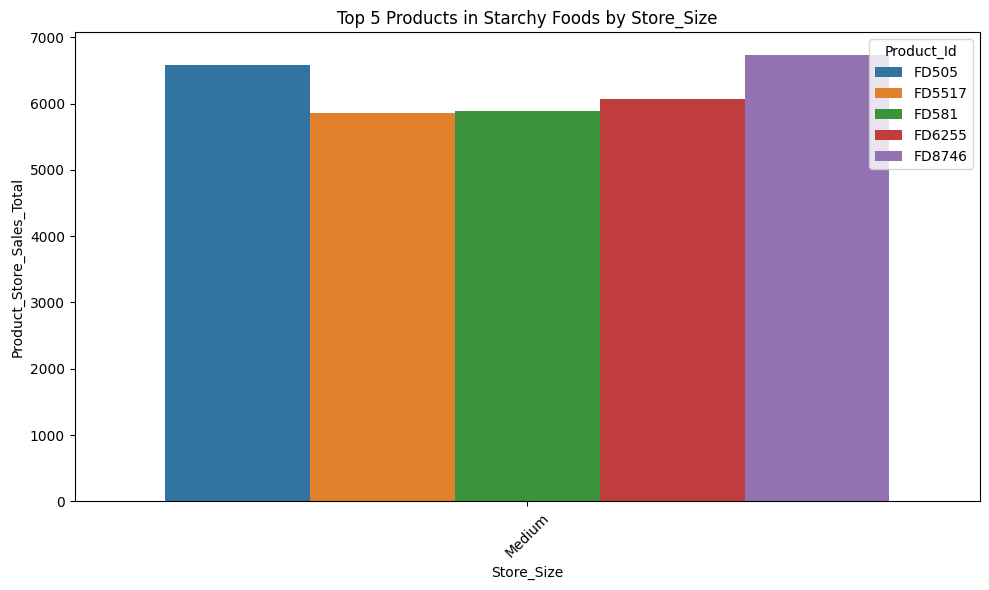

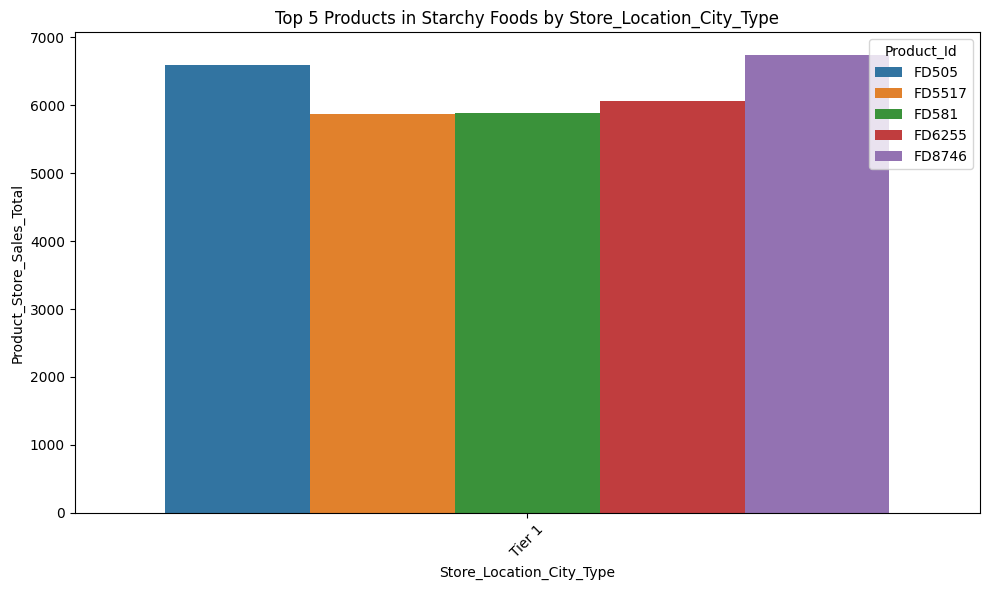

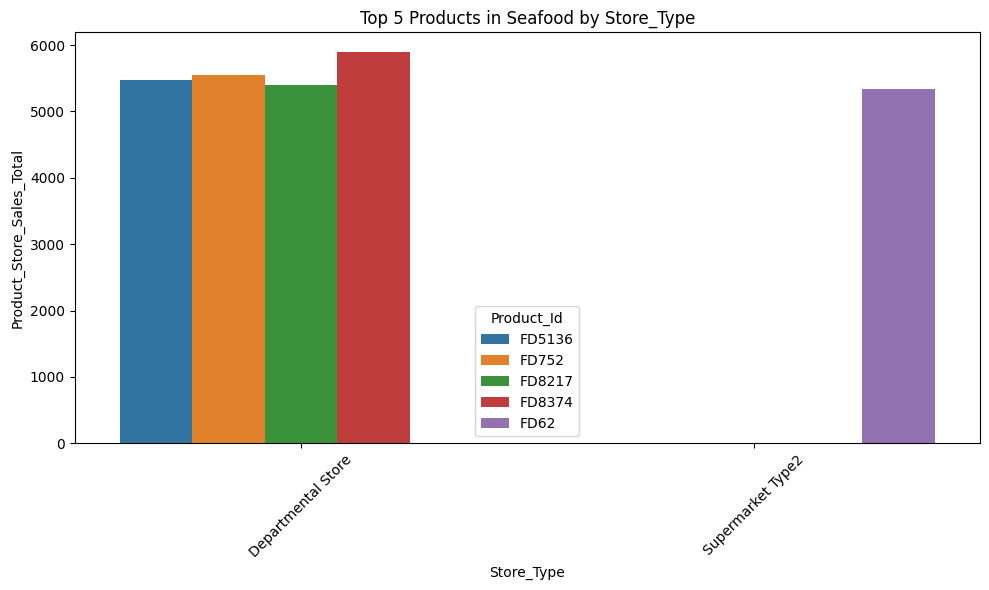

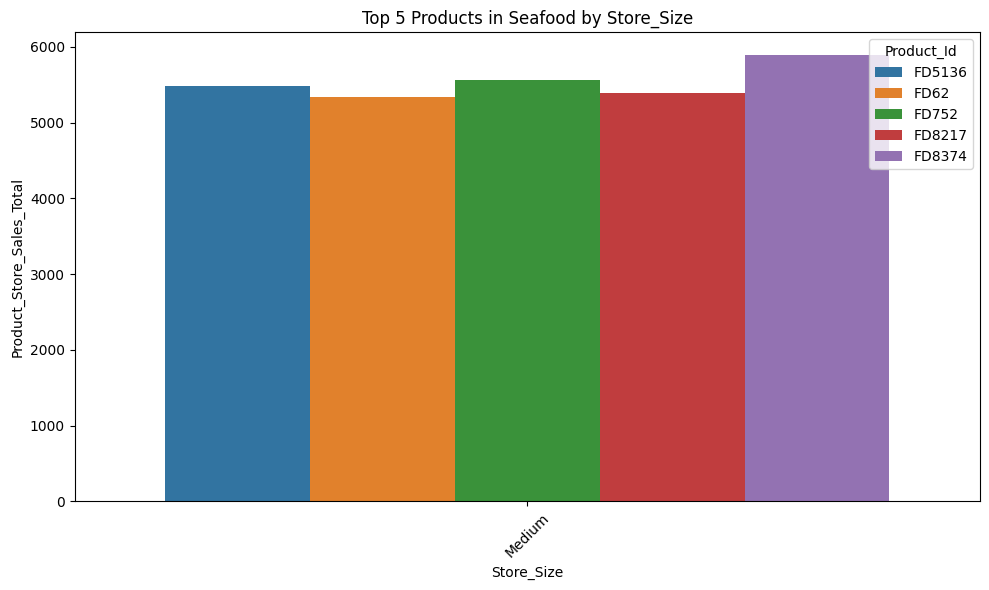

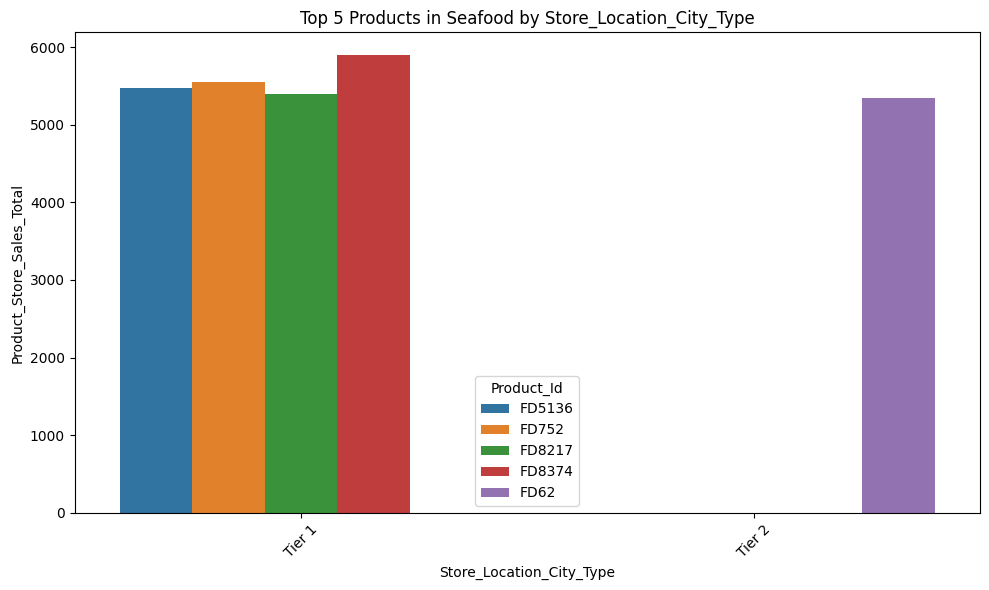

Store_Location_City_Type Product_Id  Product_Store_Sales_Total
0                   Tier 1       FD27                    6725.47
1                   Tier 1      FD337                    6644.28
2                   Tier 1     FD7632                    6653.24
3                   Tier 1     FD8203                    6835.81
4                   Tier 1      FD966                    6722.96

In [ ]:
# Run the pipeline
results = analyze_products_all_dimensions(data_1, top_n=5)

# Example: Inspect Dairy results
results["Dairy"]["top_products"]           # Top 5 product IDs in Dairy
results["Dairy"]["grouped_sales"]["Store_Type"]   # Sales split by Store Type
results["Dairy"]["grouped_sales"]["Store_Size"]   # Sales split by Store Size
results["Dairy"]["grouped_sales"]["Store_Location_City_Type"]   # Split by City Tier


All the Graphs show details of Top 5 Selling Products of each category in different Location, different Store Size and Different Store Types.


# **Data Preprocessing**

## **Feature Engineering**

In [ ]:
# ---- Product Features ----
# Product Weight Category
data_1['Product_Weight_Category'] = pd.cut(
    data_1['Product_Weight'],
    bins=[0, 10, 15, data_1['Product_Weight'].max()],
    labels=['Light', 'Medium', 'Heavy']
)
data_1['Product_Weight_Category'] = data_1['Product_Weight_Category'].map({'Light':1, 'Medium':2, 'Heavy':3})

# 1. Product_Area per Weight
data_1["Area_per_Weight"] = data_1["Product_Allocated_Area"] / data_1["Product_Weight"]

# 2. Price per Weight
data_1["Price_per_Weight"] = data_1["Product_MRP"] / data_1["Product_Weight"]

# 3. Price per allocated area
data_1['Price_per_Area'] = data_1['Product_MRP'] / data_1['Product_Allocated_Area']

# One-hot for Sugar Content
data_1 = pd.get_dummies(data_1, columns=['Product_Sugar_Content'], prefix='Sugar')

# ---- Store Features ----
# Store Age
current_year = 2025
data_1['Store_Age'] = current_year - data_1['Store_Establishment_Year']

# Store Age Category
data_1['Store_Age_Category'] = pd.cut(
    data_1['Store_Age'],
    bins=[0, 10, 20, 100],
    labels=['New', 'Medium', 'Old']
)
data_1['Store_Age_Category'] = data_1['Store_Age_Category'].map({'New':1, 'Medium':2, 'Old':3})

# Store Size Encoding
size_mapping = {'Small': 1, 'Medium': 2, 'High': 3}
data_1['Store_Size_Num'] = data_1['Store_Size'].map(size_mapping)

# City Tier Encoding
tier_mapping = {'Tier 1': 3, 'Tier 2': 2, 'Tier 3': 1}
data_1['City_Tier_Num'] = data_1['Store_Location_City_Type'].map(tier_mapping)

# ---- Interaction Features ----
data_1['Weight_x_Price'] = data_1['Product_Weight'] * data_1['Product_MRP']
data_1['StoreSize_x_MRP'] = data_1['Store_Size_Num'] * data_1['Product_MRP']




In [ ]:
# Checking for the updated Data Set post Feature Engineering
data_1.head()


Product_Id  Product_Weight  Product_Allocated_Area        Product_Type  \
0     FD6114           12.66                   0.027        Frozen Foods   
1     FD7839           16.54                   0.144               Dairy   
2     FD5075           14.28                   0.031              Canned   
3     FD8233           12.10                   0.112        Baking Goods   
4     NC1180            9.57                   0.010  Health and Hygiene   

   Product_MRP Store_Id  Store_Establishment_Year Store_Size  \
0       117.08   OUT004                      2009     Medium   
1       171.43   OUT003                      1999     Medium   
2       162.08   OUT001                      1987       High   
3       186.31   OUT001                      1987       High   
4       123.67   OUT002                      1998      Small   

  Store_Location_City_Type          Store_Type  Product_Store_Sales_Total  \
0                   Tier 2   Supermarket Type2                    2842.40   
1                   Tier 1  Departmental Store                    4830.02   
2                   Tier 2   Supermarket Type1                    4130.16   
3                   Tier 2   Supermarket Type1                    4132.18   
4                   Tier 3           Food Mart                    2279.36   

  Product_Weight_Category  Area_per_Weight  Price_per_Weight  Price_per_Area  \
0                       2         0.002133          9.248025     4336.296296   
1                       3         0.008706         10.364571     1190.486111   
2                       2         0.002171         11.350140     5228.387097   
3                       2         0.009256         15.397521     1663.482143   
4                       1         0.001045         12.922675    12367.000000   

   Sugar_Low Sugar  Sugar_No Sugar  Sugar_Regular  Store_Age  \
0             True           False          False         16   
1             True           False          False         26   
2            False           False           True         38   
3             True           False          False         38   
4            False            True          False         27   

  Store_Age_Category  Store_Size_Num  City_Tier_Num  Weight_x_Price  \
0                  2               2              2       1482.2328   
1                  3               2              3       2835.4522   
2                  3               3              2       2314.5024   
3                  3               3              2       2254.3510   
4                  3               1              1       1183.5219   

   StoreSize_x_MRP  
0           234.16  
1           342.86  
2           486.24  
3           558.93  
4           123.67

In [ ]:
# Checking for the Shape of Updated Data Set
data_1.shape

(8763, 27)

In [ ]:
# Checking for the Attributes of the Updated Data Set
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Product_Id                 8763 non-null   object  
 1   Product_Weight             8763 non-null   float64 
 2   Product_Allocated_Area     8763 non-null   float64 
 3   Product_Type               8763 non-null   object  
 4   Product_MRP                8763 non-null   float64 
 5   Store_Id                   8763 non-null   object  
 6   Store_Establishment_Year   8763 non-null   int64   
 7   Store_Size                 8763 non-null   object  
 8   Store_Location_City_Type   8763 non-null   object  
 9   Store_Type                 8763 non-null   object  
 10  Product_Store_Sales_Total  8763 non-null   float64 
 11  Product_Weight_Category    8763 non-null   category
 12  Area_per_Weight            8763 non-null   float64 
 13  Price_per_Weight           8763 n

In [ ]:
# Seggregating the Numeric Features and Categorical Features according to their Data Types and assigning them in Numeric/Category Features

numeric_features = data_1.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = data_1.select_dtypes(include=["object", "category"]).columns.tolist()

In [ ]:
print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)


Numeric Features: ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Store_Establishment_Year', 'Product_Store_Sales_Total', 'Area_per_Weight', 'Price_per_Weight', 'Price_per_Area', 'Store_Age', 'Store_Size_Num', 'City_Tier_Num', 'Weight_x_Price', 'StoreSize_x_MRP']
Categorical Features: ['Product_Id', 'Product_Type', 'Store_Id', 'Store_Size', 'Store_Location_City_Type', 'Store_Type', 'Product_Weight_Category', 'Store_Age_Category']


In [ ]:
# Post Feature Engineering, addititonal coloumns added has to be seggregated among Numeric and Categoricl Features before Train Test Split is done.

# Define the target variable for the regression task
target = 'Product_Store_Sales_Total'

# List of numerical features in the dataset
numeric_features_new = [col for col in numeric_features if col != "Product_Store_Sales_Total"]

print("Numeric Features:", numeric_features_new)
print("Categorical Features:", categorical_features)


Numeric Features: ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Store_Establishment_Year', 'Area_per_Weight', 'Price_per_Weight', 'Price_per_Area', 'Store_Age', 'Store_Size_Num', 'City_Tier_Num', 'Weight_x_Price', 'StoreSize_x_MRP']
Categorical Features: ['Product_Id', 'Product_Type', 'Store_Id', 'Store_Size', 'Store_Location_City_Type', 'Store_Type', 'Product_Weight_Category', 'Store_Age_Category']


## **Outlier Detection**

===== Outlier Summary =====
{'global_outlier_counts': {'Product_MRP': 57, 'Product_Store_Sales_Total': 119}, 'group_outlier_counts': {'Product_MRP_by_Product_Type': {'Baking Goods': 6, 'Breads': 1, 'Canned': 9, 'Dairy': 6, 'Frozen Foods': 7, 'Fruits and Vegetables': 12, 'Health and Hygiene': 4, 'Household': 4, 'Meat': 4, 'Seafood': 4, 'Snack Foods': 4, 'Soft Drinks': 6, 'Starchy Foods': 1}, 'Product_Sales_by_Store_Type': {'Departmental Store': 2, 'Food Mart': 21, 'Supermarket Type2': 51}}}


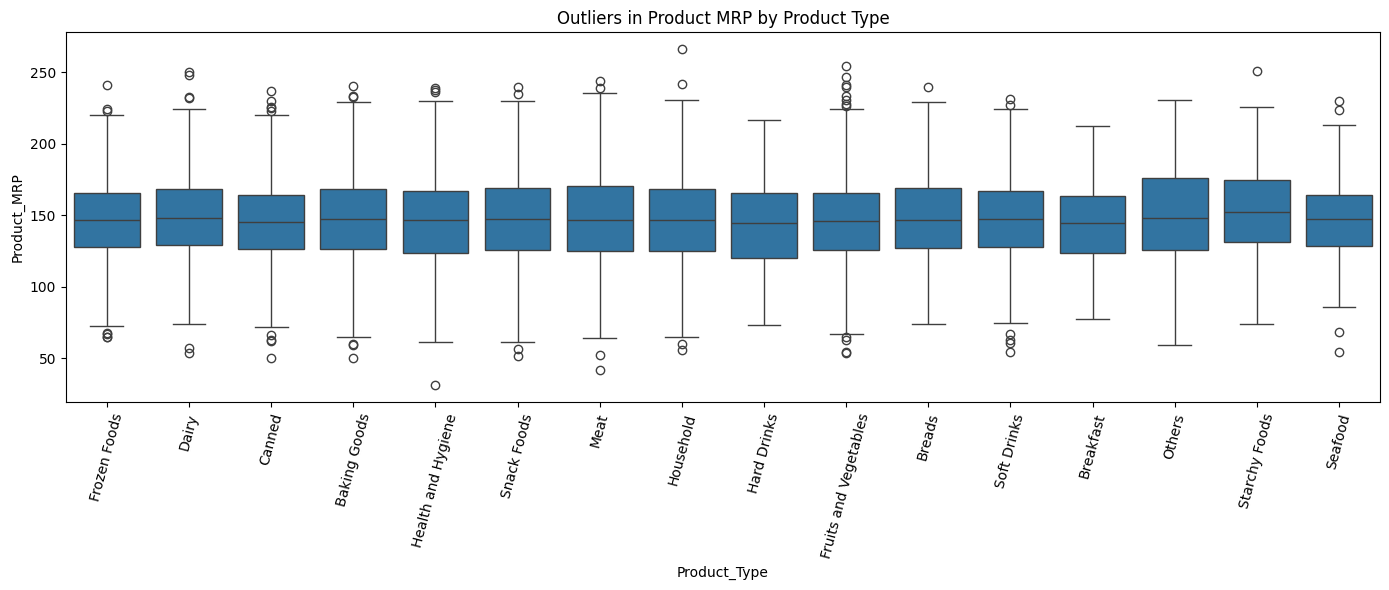

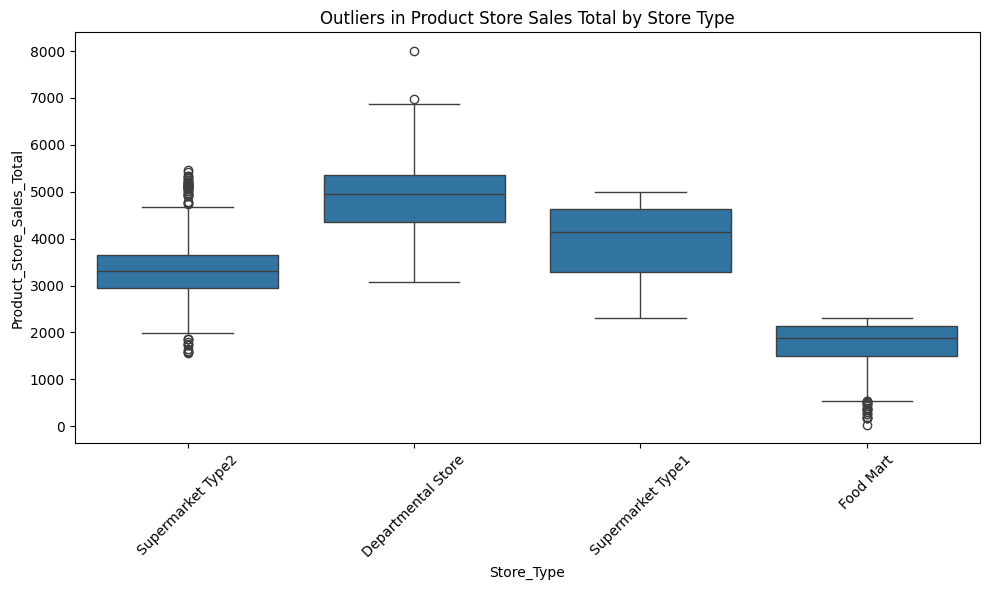

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Outlier detection function (IQR method)
# -----------------------------
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)].index

# ---------- Global Outlier Detection ----------
global_outliers = {
    "Product_MRP": detect_outliers_iqr(data_1["Product_MRP"]),
    "Product_Store_Sales_Total": detect_outliers_iqr(data_1["Product_Store_Sales_Total"])
}

# ---------- Group-wise Outlier Detection ----------
group_outliers = {}

# Product_MRP by Product_Type
group_outliers["Product_MRP_by_Product_Type"] = {}
for g, subdata in data_1.groupby("Product_Type"):
    idx = detect_outliers_iqr(subdata["Product_MRP"])
    if len(idx) > 0:
        group_outliers["Product_MRP_by_Product_Type"][g] = len(idx)

# Product_Store_Sales_Total by Store_Type
group_outliers["Product_Sales_by_Store_Type"] = {}
for g, subdata in data_1.groupby("Store_Type"):
    idx = detect_outliers_iqr(subdata["Product_Store_Sales_Total"])
    if len(idx) > 0:
        group_outliers["Product_Sales_by_Store_Type"][g] = len(idx)

# ---------- Summary ----------
summary = {
    "global_outlier_counts": {k: len(v) for k, v in global_outliers.items()},
    "group_outlier_counts": group_outliers
}

print("===== Outlier Summary =====")
print(summary)

# ---------- Visualization ----------
plt.figure(figsize=(14,6))
sns.boxplot(data=data_1, x="Product_Type", y="Product_MRP")
plt.xticks(rotation=75)
plt.title("Outliers in Product MRP by Product Type")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=data_1, x="Store_Type", y="Product_Store_Sales_Total")
plt.xticks(rotation=45)
plt.title("Outliers in Product Store Sales Total by Store Type")
plt.tight_layout()
plt.show()


## **Outliers Treatment**

In [ ]:
# Select only numeric columns from feature-engineered data
numeric_cols = data_1.select_dtypes(include=['float64', 'int64']).columns

# Function for IQR-based outlier treatment (capping)
def treat_outliers_iqr(data_1, cols):
    data_treated = data_1.copy()
    for col in cols:
        Q1 = data_treated[col].quantile(0.25)
        Q3 = data_treated[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside bounds
        data_treated[col] = data_treated[col].clip(lower=lower_bound, upper=upper_bound)
    return data_treated

# Apply IQR treatment on feature-engineered dataset
data_1_treated = treat_outliers_iqr(data_1, numeric_cols)

# Automatically log-transform skewed numeric columns
from scipy.stats import skew

log_transform_cols = [col for col in numeric_cols if abs(skew(data_1_treated[col])) > 1]

for col in log_transform_cols:
    data_1_treated[col + "_log"] = (data_1_treated[col] + 1).apply(np.log)

# Show before/after summary stats
summary_before = data_1[numeric_cols].describe()
summary_after = data_1_treated[numeric_cols].describe()

data_1_treated.head()


Product_Id  Product_Weight  Product_Allocated_Area        Product_Type  \
0     FD6114           12.66                   0.027        Frozen Foods   
1     FD7839           16.54                   0.144               Dairy   
2     FD5075           14.28                   0.031              Canned   
3     FD8233           12.10                   0.112        Baking Goods   
4     NC1180            9.57                   0.010  Health and Hygiene   

   Product_MRP Store_Id  Store_Establishment_Year Store_Size  \
0       117.08   OUT004                      2009     Medium   
1       171.43   OUT003                      1999     Medium   
2       162.08   OUT001                      1987       High   
3       186.31   OUT001                      1987       High   
4       123.67   OUT002                      1998      Small   

  Store_Location_City_Type          Store_Type  Product_Store_Sales_Total  \
0                   Tier 2   Supermarket Type2                    2842.40   
1                   Tier 1  Departmental Store                    4830.02   
2                   Tier 2   Supermarket Type1                    4130.16   
3                   Tier 2   Supermarket Type1                    4132.18   
4                   Tier 3           Food Mart                    2279.36   

  Product_Weight_Category  Area_per_Weight  Price_per_Weight  Price_per_Area  \
0                       2         0.002133          9.248025     4336.296296   
1                       3         0.008706         10.364571     1190.486111   
2                       2         0.002171         11.350140     5228.387097   
3                       2         0.009256         15.397521     1663.482143   
4                       1         0.001045         12.922675     9414.090175   

   Sugar_Low Sugar  Sugar_No Sugar  Sugar_Regular  Store_Age  \
0             True           False          False         16   
1             True           False          False         26   
2            False           False           True         38   
3             True           False          False         38   
4            False            True          False         27   

  Store_Age_Category  Store_Size_Num  City_Tier_Num  Weight_x_Price  \
0                  2               2              2       1482.2328   
1                  3               2              2       2835.4522   
2                  3               2              2       2314.5024   
3                  3               2              2       2254.3510   
4                  3               2              2       1183.5219   

   StoreSize_x_MRP  Price_per_Area_log  
0           234.16            8.375006  
1           342.86            7.082957  
2           486.24            8.562049  
3           503.20            7.417269  
4           123.67            9.150069

## **Data Preparation for Analysis**

In [ ]:
X = data_1_treated.drop(columns=["Product_Store_Sales_Total"])
y = data_1_treated["Product_Store_Sales_Total"]


In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,              # Predictors (X) and target variable (y)
    test_size=0.2,     # 20% of the data is reserved for testing
    random_state=42    # Ensures reproducibility by setting a fixed random seed
)

# Convert X_train and X_test back to DataFrames with proper column names
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (7010, 24)
y_train shape: (7010,)


# **Model Building**

## **Define functions for Model Evaluation**



*   We'll fit different models on the train data and observe their performance.
*   We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
*   We'll use GridSearchCv for hyperparameter tuning and r_2 score to optimize the model.

Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.





In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    data_1_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return data_1_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

### **Random Forest Regressor - Model Training Pipeline**

In [ ]:
# Preprocessing Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), make_column_selector(dtype_include=np.number)),
        ("cat", OneHotEncoder(handle_unknown="ignore"), make_column_selector(dtype_exclude=np.number))
    ]
)

# Model pipeline
rf_default = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])


# ---------------------------
# Cross-validation Setup
# ---------------------------
kf = KFold(n_splits=3, shuffle=True, random_state=42)
rf_default.fit(X_train, y_train)
# Custom scorer for MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Scoring dictionary
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2',
    'mape': mape_scorer
}

set_config(display="diagram")
print("Random Forest Pipeline:")
display(rf_default)
# ---------------------------
# Run Cross-validation
# ---------------------------
cv_results = cross_validate(
    rf_default,
    X_train, y_train,
    cv=kf,
    scoring=scoring,
    return_train_score=True
)

# ---------------------------
# Results Formatting
# ---------------------------
results_data_1 = pd.DataFrame({
    "Train_RMSE": -cv_results["train_rmse"],
    "Test_RMSE": -cv_results["test_rmse"],
    "Train_MAE": -cv_results["train_mae"],
    "Test_MAE": -cv_results["test_mae"],
    "Train_MAPE": -cv_results["train_mape"],
    "Test_MAPE": -cv_results["test_mape"],
    "Train_R2": cv_results["train_r2"],
    "Test_R2": cv_results["test_r2"]
})

# Compute Adjusted R²
n, p = X_train.shape
mean_test_r2 = results_data_1["Test_R2"].mean()
adj_r2 = 1 - (1 - mean_test_r2) * (n - 1) / (n - p - 1)

# Add averages row
results_data_1.loc["Mean"] = results_data_1.mean()
results_data_1.loc["Mean", "Adj_R2"] = adj_r2

results_data_1


Random Forest Pipeline:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x787cea4d37a0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x787cea4d39e0>)])),
                ('regressor', RandomForestRegressor(random_state=42))])

Train_RMSE   Test_RMSE  Train_MAE   Test_MAE  Train_MAPE  Test_MAPE  \
0      96.858356  266.519715  24.227379  66.414984    0.008857   0.024938   
1      95.449867  291.852434  23.231362  76.246974    0.008628   0.027506   
2     101.538881  246.564119  25.726606  58.303588    0.009239   0.021610   
Mean   97.949035  268.312089  24.395116  66.988515    0.008908   0.024685   

      Train_R2   Test_R2    Adj_R2  
0     0.991604  0.935103       NaN  
1     0.991693  0.925042       NaN  
2     0.990760  0.944649       NaN  
Mean  0.991352  0.934932  0.934708

### **Random Forest Tuned - Hyperparameter Tuning**

In [ ]:
# Preprocessor
# ---------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), make_column_selector(dtype_include=np.number)),
        ("cat", OneHotEncoder(handle_unknown="ignore"), make_column_selector(dtype_exclude=np.number))
    ]
)

# ---------------------------
# Pipeline with RF
# ---------------------------
rf_tuned = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42, n_jobs=-1))
])

# ---------------------------
# Hyperparameter grid
# ---------------------------
rf_param_grid = {
    "regressor__n_estimators": randint(100, 500),
    "regressor__max_depth": randint(3, 20),
    "regressor__min_samples_split": randint(2, 20),
    "regressor__min_samples_leaf": randint(1, 10),
    "regressor__max_features": ["sqrt", "log2", "auto"]
}

# ---------------------------
# Randomized Search
# ---------------------------
rf_random_search = RandomizedSearchCV(
    estimator=rf_tuned,
    param_distributions=rf_param_grid,
    n_iter=30,
    scoring="r2",
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
rf_random_search.fit(X_train, y_train)

# ---------------------------
# Best model after tuning
# ---------------------------
best_rf_tuned = rf_random_search.best_estimator_
print("Best Parameters:", rf_random_search.best_params_)

# ---------------------------
# Cross-validation Setup
# ---------------------------
kf = KFold(n_splits=3, shuffle=True, random_state=42)

best_rf_tuned.fit(X_train, y_train)
best_rf_tuned
# Custom scorer for MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Scoring dictionary
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2',
    'mape': mape_scorer
}

# ---------------------------
# Run Cross-validation (only on best model)
# ---------------------------
cv_results = cross_validate(
    best_rf_tuned,
    X_train, y_train,
    cv=kf,
    scoring=scoring,
    return_train_score=True
)

# ---------------------------
# Results Formatting
# ---------------------------
results_data_1 = pd.DataFrame({
    "Train_RMSE": -cv_results["train_rmse"],
    "Test_RMSE": -cv_results["test_rmse"],
    "Train_MAE": -cv_results["train_mae"],
    "Test_MAE": -cv_results["test_mae"],
    "Train_MAPE": -cv_results["train_mape"],
    "Test_MAPE": -cv_results["test_mape"],
    "Train_R2": cv_results["train_r2"],
    "Test_R2": cv_results["test_r2"]
})

# Compute Adjusted R²
n, p = X_train.shape
mean_test_r2 = results_data_1["Test_R2"].mean()
adj_r2 = 1 - (1 - mean_test_r2) * (n - 1) / (n - p - 1)

# Add averages row
results_data_1.loc["Mean"] = results_data_1.mean()
results_data_1.loc["Mean", "Adj_R2"] = adj_r2

# Display pipeline diagram + results
set_config(display="diagram")
print("Best Random Forest Pipeline:")
display(best_rf_tuned)

results_data_1


Best Parameters: {'regressor__max_depth': 15, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 8, 'regressor__n_estimators': 108}
Best Random Forest Pipeline:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x787cec4a06e0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x787cec491b50>)])),
                ('regressor',
                 RandomForestRegressor(max_depth=15, max_features='sqrt',
                                       min_samples_split=8, n_estimators=108,
                                       n_jobs=-1, random_state=42))])

Train_RMSE   Test_RMSE   Train_MAE    Test_MAE  Train_MAPE  Test_MAPE  \
0     417.123234  448.423941  314.882423  331.677706    0.109467   0.117521   
1     435.609086  473.784791  334.177500  353.296446    0.115442   0.124869   
2     439.779981  443.683935  328.414876  332.759959    0.114936   0.114260   
Mean  430.837433  455.297556  325.824933  339.244704    0.113282   0.118883   

      Train_R2   Test_R2   Adj_R2  
0     0.844281  0.816287      NaN  
1     0.826986  0.802461      NaN  
2     0.826659  0.820770      NaN  
Mean  0.832642  0.813172  0.81253

### **XG Boost Regressor - Model Training Pipeline**

In [ ]:
# Preprocessing Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), make_column_selector(dtype_include='number')),
        ("cat", OneHotEncoder(handle_unknown="ignore"), make_column_selector(dtype_include='object'))
    ]
)


# XGBoost Model Pipeline

xgb_default = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(random_state=42, n_jobs=-1))  # <--- default model
])

# ---------------------------
# Cross-validation Setup
# ---------------------------
kf = KFold(n_splits=3, shuffle=True, random_state=42)
xgb_default.fit(X_train, y_train)
xgb_default
# Custom scorer for MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Scoring dictionary
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2',
    'mape': mape_scorer
}

# ---------------------------
# Run Cross-validation
# ---------------------------
cv_results = cross_validate(
    xgb_default,
    X_train, y_train,
    cv=kf,
    scoring=scoring,
    return_train_score=True
)
xgb_default.fit(X_train, y_train)
xgb_default
# ---------------------------
# Results Formatting
# ---------------------------
results_xgb = pd.DataFrame({
    "Train_RMSE": -cv_results["train_rmse"],
    "Test_RMSE": -cv_results["test_rmse"],
    "Train_MAE": -cv_results["train_mae"],
    "Test_MAE": -cv_results["test_mae"],
    "Train_MAPE": -cv_results["train_mape"],
    "Test_MAPE": -cv_results["test_mape"],
    "Train_R2": cv_results["train_r2"],
    "Test_R2": cv_results["test_r2"]
})

# Compute Adjusted R²
n, p = X_train.shape
mean_test_r2 = results_xgb["Test_R2"].mean()
adj_r2 = 1 - (1 - mean_test_r2) * (n - 1) / (n - p - 1)

# Add averages row
results_xgb.loc["Mean"] = results_xgb.mean()
results_xgb.loc["Mean", "Adj_R2"] = adj_r2

results_xgb

Train_RMSE   Test_RMSE  Train_MAE   Test_MAE  Train_MAPE  Test_MAPE  \
0     111.169502  277.717239  59.041905  95.636045    0.020348   0.034103   
1     102.833225  289.414964  53.918910  98.136578    0.019046   0.034559   
2     124.775488  247.237433  62.883158  83.204819    0.022065   0.029808   
Mean  112.926072  271.456545  58.614657  92.325814    0.020486   0.032823   

      Train_R2   Test_R2    Adj_R2  
0     0.988939  0.929536       NaN  
1     0.990358  0.926289       NaN  
2     0.986046  0.944346       NaN  
Mean  0.988448  0.933390  0.933162

In [ ]:
xgb_default

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7817695321b0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7817693411c0>)])),
                ('model',
                 XGBRegressor(base_score=None, booster=Non...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=42, ...))])

### **XG Boost Tuned Regressor - Hyperparameter Tuning**

In [ ]:

# Preprocessor: numeric + categorical handling
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), make_column_selector(dtype_include=np.number)),
        ("cat", OneHotEncoder(handle_unknown="ignore"), make_column_selector(dtype_exclude=np.number)),
    ]
)

# XGBoost Pipeline
xgb_tuned = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("xgb", XGBRegressor(random_state=42, n_jobs=-1))
])

# ==============================
# Randomized Search Hyperparams
# ==============================
param_dist = {
    "xgb__n_estimators": randint(100, 500),
    "xgb__max_depth": randint(3, 10),
    "xgb__min_child_weight": randint(1, 6),
    "xgb__learning_rate": uniform(0.01, 0.3),
    "xgb__subsample": uniform(0.6, 0.4),
    "xgb__colsample_bytree": uniform(0.6, 0.4),
    "xgb__colsample_bylevel": uniform(0.6, 0.4),
}

random_search = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist,
    n_iter=10,                        # number of random samples to try
    cv=KFold(n_splits=3, shuffle=True, random_state=42),
    scoring="r2",
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best tuned pipeline
xgb_tuned = random_search.best_estimator_

# ==============================
# Cross-validation with multiple metrics
# ==============================
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Custom scorer for MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Scoring dictionary
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2',
    'mape': mape_scorer
}

set_config(display="diagram")
print("XGBoost Pipeline (Tuned):")
display(xgb_tuned)

# Run cross-validation
cv_results = cross_validate(
    xgb_tuned,
    X_train, y_train,
    cv=kf,
    scoring=scoring,
    return_train_score=True
)
xgb_tuned.fit(X_train, y_train)
xgb_tuned
# ==============================
# Results Formatting
# ==============================
results_data_1 = pd.DataFrame({
    "Train_RMSE": -cv_results["train_rmse"],
    "Test_RMSE": -cv_results["test_rmse"],
    "Train_MAE": -cv_results["train_mae"],
    "Test_MAE": -cv_results["test_mae"],
    "Train_MAPE": -cv_results["train_mape"],
    "Test_MAPE": -cv_results["test_mape"],
    "Train_R2": cv_results["train_r2"],
    "Test_R2": cv_results["test_r2"]
})

# Compute Adjusted R²
n, p = X_train.shape
mean_test_r2 = results_data_1["Test_R2"].mean()
adj_r2 = 1 - (1 - mean_test_r2) * (n - 1) / (n - p - 1)

# Add averages row
results_data_1.loc["Mean"] = results_data_1.mean()
results_data_1.loc["Mean", "Adj_R2"] = adj_r2

results_data_1


Fitting 3 folds for each of 10 candidates, totalling 30 fits
XGBoost Pipeline (Tuned):


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x787cec465c70>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x787ce9ec7c80>)])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None,...
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=np.float64(0.1451497755908629),
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None, min_child_weight=4,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=188, n_jobs=-1,
                              num_parallel_tree=None, random_state=42, ...))])

Train_RMSE   Test_RMSE  Train_MAE    Test_MAE  Train_MAPE  Test_MAPE  \
0     184.360531  273.072257  76.238598  110.894905    0.025402   0.038366   
1     177.640130  293.098597  72.127693  113.007322    0.024500   0.038464   
2     197.703533  251.750625  79.552984  101.517446    0.026951   0.034732   
Mean  186.568065  272.640493  75.973091  108.473224    0.025618   0.037187   

      Train_R2   Test_R2    Adj_R2  
0     0.969581  0.931873       NaN  
1     0.971228  0.924401       NaN  
2     0.964968  0.942296       NaN  
Mean  0.968592  0.932857  0.932626

# **Model Performance Comparison, Final Model Selection, and Serialization**

In [ ]:
# Helper function: CV evaluation

def evaluate_model(model, X, y, kf, label):
    """Runs cross-validation and returns a results DataFrame."""
    # Custom MAPE scorer
    mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

    # Metrics to compute
    scoring = {
        'rmse': 'neg_root_mean_squared_error',
        'mae': 'neg_mean_absolute_error',
        'r2': 'r2',
        'mape': mape_scorer
    }

    # Run CV
    cv_results = cross_validate(
        model,
        X, y,
        cv=kf,
        scoring=scoring,
        return_train_score=True
    )

    # Collect results
    results = pd.DataFrame({
        "Model": [label] * kf.get_n_splits(),
        "Train_RMSE": -cv_results["train_rmse"],
        "Test_RMSE": -cv_results["test_rmse"],
        "Train_MAE": -cv_results["train_mae"],
        "Test_MAE": -cv_results["test_mae"],
        "Train_MAPE": -cv_results["train_mape"],
        "Test_MAPE": -cv_results["test_mape"],
        "Train_R2": cv_results["train_r2"],
        "Test_R2": cv_results["test_r2"]
    })

    # Compute Adjusted R² for mean Test_R²
    n, p = X.shape
    mean_test_r2 = results["Test_R2"].mean()
    adj_r2 = 1 - (1 - mean_test_r2) * (n - 1) / (n - p - 1)

    # Add Mean row
    results.loc["Mean"] = results.mean(numeric_only=True)
    results.loc["Mean", "Model"] = label + " (Mean)"
    results.loc["Mean", "Adj_R2"] = adj_r2

    return results

# ===============================
# Models
# ===============================
# 1. Random Forest (default)
rf_default = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(random_state=42, n_jobs=-1))
])

# 2. Random Forest (tuned)
rf_tuned = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(random_state=42, n_jobs=-1))
])
rf_param_dist = {
    "rf__n_estimators": randint(100, 500),
    "rf__max_depth": randint(3, 20),
    "rf__min_samples_split": randint(2, 20),
    "rf__min_samples_leaf": randint(1, 10),
    "rf__max_features": ["sqrt", "log2", "auto"]
}
rf_tuned = RandomizedSearchCV(
    rf_tuned, rf_param_dist,
    n_iter=10, cv=3,
    scoring="r2", n_jobs=-1, random_state=42
)

# 3. XGBoost (default)
xgb_default = Pipeline([
    ("preprocessor", preprocessor),
    ("xgb", XGBRegressor(random_state=42, n_jobs=-1))
])

# 4. XGBoost (tuned)
xgb_tuned = Pipeline([
    ("preprocessor", preprocessor),
    ("xgb", XGBRegressor(random_state=42, n_jobs=-1))
])
xgb_param_dist = {
    "xgb__n_estimators": randint(100, 500),
    "xgb__max_depth": randint(3, 10),
    "xgb__min_child_weight": randint(1, 6),
    "xgb__learning_rate": uniform(0.01, 0.3),
    "xgb__subsample": uniform(0.6, 0.4),
    "xgb__colsample_bytree": uniform(0.6, 0.4),
    "xgb__colsample_bylevel": uniform(0.6, 0.4)
}
xgb_tuned = RandomizedSearchCV(
    xgb_tuned, xgb_param_dist,
    n_iter=10, cv=3,
    scoring="r2", n_jobs=-1, random_state=42
)

# ===============================
# Run Evaluation
# ===============================
kf = KFold(n_splits=3, shuffle=True, random_state=42)

results_rf_default = evaluate_model(rf_default, X_train, y_train, kf, "Random Forest (Default)")
results_rf_tuned   = evaluate_model(rf_tuned, X_train, y_train, kf, "Random Forest (Tuned)")
results_xgb_default= evaluate_model(xgb_default, X_train, y_train, kf, "XGBoost (Default)")
results_xgb_tuned  = evaluate_model(xgb_tuned, X_train, y_train, kf, "XGBoost (Tuned)")

# ===============================
# Combine all results
# ===============================
final_results = pd.concat([
    results_rf_default,
    results_rf_tuned,
    results_xgb_default,
    results_xgb_tuned
], ignore_index=True)

# Show only the "Mean" rows for clean comparison
summary = final_results[final_results["Model"].str.contains("Mean")].reset_index(drop=True)

# Display
import warnings
warnings.filterwarnings("ignore")
set_config(display="diagram")

print("Model Comparison Results:")
display(summary)


Model Comparison Results:


Model  Train_RMSE   Test_RMSE   Train_MAE  \
0  Random Forest (Default) (Mean)   97.704466  261.332206   23.774685   
1    Random Forest (Tuned) (Mean)  452.428880  470.858805  343.301814   
2        XGBoost (Default) (Mean)  132.397909  266.247652   62.586330   
3          XGBoost (Tuned) (Mean)  122.896988  258.738303   51.146575   

     Test_MAE  Train_MAPE  Test_MAPE  Train_R2   Test_R2    Adj_R2  
0   64.529899    0.008682   0.023686  0.991395  0.937102  0.936732  
1  353.101944    0.120429   0.124524  0.815485  0.799805  0.798627  
2   90.802289    0.021834   0.032370  0.984189  0.934449  0.934063  
3   81.733097    0.017773   0.029230  0.986372  0.938142  0.937778

Since the Performanec metrix selected for forecasting is r2 and due to high number of features post Feature Engineering it would be benefical to select **AdjR2** for selection of our Model.

Benefit of selection of AdjR2 over r2 is that ***it will penelize the unnecessary complexity in the model when dealing with high number of features in the Data Set***.

The best Model from the 4 is **XG Boost(Tuned)** since it has highest AdjR2. Random Forest(Default) and XG Boost(Default) hav fractional difference in the AdjR2 values. Even they can also be considered.

For now we will go with **XG Boost (Tuned)** Model.

# **Deployment Approach**

The crux of our solution is to decouple the frontend and backend of the application for better accessibility and seamless integration with other services. This modular design enhances maintainability and scalability.

**Backend Development (Flask)**:

1) We will develop a Flask application (app.py) responsible for:

        (i) Loading the serialized XGBoost model we trained and saved as rental_price_prediction_model_v1_0.joblib.
     
        (ii) Exposing two API endpoints:

              (a) /v1/sales: For predicting the sales of a single store, accepting input features as JSON, mirroring the data format used during training and EDA.

              (b) /v1/batchsales: For batch predictions on multiple stores, processing data uploaded as a CSV file, consistent with the dataset structure.

2) This backend handles the core prediction logic, applying the same data preprocessing steps (imputation, scaling, and encoding) used during model training to ensure consistency and accuracy. It returns predictions as JSON responses, facilitating easy integration with the frontend.

3) We'll deploy this Flask app, the serialized model, and the requirements.txt file to a Hugging Face Space using a Dockerfile. This makes the prediction service publicly accessible via a unique URL.


**Frontend Development (Streamlit)**:

1) A separate Streamlit application (app.py) will serve as the user interface, tailored for Superkart hosts and internal teams.

2) This frontend will include:

      (i) Form-based inputs for online predictions, allowing users to enter store details like product category, store type, MRP, etc., aligning with the features used in the model.

      (ii) A CSV file uploader for batch predictions, enabling users to analyze multiple stores simultaneously, similar to the dataset format used for training.

3) The Streamlit app will use the requests library to communicate with the Flask API, sending input data and displaying predictions in a user-friendly format. This interaction facilitates a seamless user experience.

4) Similar to the backend, we'll deploy the Streamlit app to a Hugging Face Space using a Dockerfile with its own requirements.txt for managing dependencies.

Once deployed, Superkart stakeholders can access the application through the frontend URL. They can input store details or upload a CSV file to obtain instant sales forecast, enabling data-driven sales estimation. This decoupled approach ensures flexibility and ease of access for Superkart users.

# **Model Serialization**

In [ ]:
# Create a folder for storing the files needed for web app deployment
os.makedirs("deployment_files", exist_ok=True)

In [ ]:
# Define the file path to save (serialize) the trained model along with the data preprocessing steps
saved_model_path = "deployment_files/superkart_sales_forecast_v1_0.joblib"

In [ ]:
# Save the best trained model pipeline using joblib
joblib.dump(xgb_tuned, saved_model_path)

print(f"Model saved successfully at {saved_model_path}")

Model saved successfully at deployment_files/superkart_sales_forecast_v1_0.joblib


In [ ]:
# Load the saved model pipeline from the file
saved_model = joblib.load("deployment_files/superkart_sales_forecast_v1_0.joblib")

# Confirm the model is loaded
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
saved_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x787ce9cee360>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x787ce9ceff20>)])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None,...
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=np.float64(0.1451497755908629),
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None, min_child_weight=4,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=188, n_jobs=-1,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
saved_model.predict(X_test)

array([3469.0437, 3337.3604, 2366.2876, ..., 4102.446 , 2728.5825,
       4450.856 ], dtype=float32)

# **Deployment - Backend**

In [ ]:
# Import the login function from the huggingface_hub library
from huggingface_hub import login

# Login to your Hugging Face account using your access token
# Replace "YOUR_HUGGINGFACE_TOKEN" with your actual token
login(token="")

# Import the create_repo function from the huggingface_hub library
from huggingface_hub import create_repo

In [ ]:
# Try to create the repository for the Hugging Face Space
try:
    create_repo("SuperkartSalesBackEnd",  # One can replace "Backend_Docker_space" with the desired space name
        repo_type="space",  # Specify the repository type as "space"
        space_sdk="docker",  # Specify the space SDK as "docker" to create a Docker space
        private=False  # Set to True if you want the space to be private
    )
except Exception as e:
    # Handle potential errors during repository creation
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

Error creating repository: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-68ab21c8-43c0029936fe49821d5b7219;d0bdafbe-af9e-4bc6-8786-e357d8a3dc41)

You already created this space repo


## Flask Web Framework


In [ ]:
import os

# Create a folder to upload your trained serialized model into it
os.makedirs("backend_files", exist_ok=True)

1) We need to now upload the serialized model ('superkart_sales_forecast_v1_0.joblib') into the backend_files folder.

2) Once uploaded, we will load this model into our application for generating rental price predictions.

3) This approach allows us to seamlessly integrate the pre-trained model into our deployment workflow, eliminating the need for retraining.

In [ ]:
%%writefile backend_files/app.py
# Import necessary libraries
import numpy as np
import joblib  # For loading the serialized model
import pandas as pd  # For data manipulation
from flask import Flask, request, jsonify  # For creating the Flask API

# Initialize the Flask application
superkart_sales_forecast_api = Flask("Superkart Sales Forecast")

# Load the trained machine learning model
model = joblib.load("superkart_sales_forecast_v1_0.joblib")

# Define a route for the home page (GET request)
@superkart_sales_forecast_api.get('/')
def home():
    """
    This function handles GET requests to the root URL ('/') of the API.
    It returns a simple welcome message.
    """
    return "Welcome to the Superkart Sales & Inventory forecast API!"

# Define an endpoint for single property prediction (POST request)
@superkart_sales_forecast_api.post('/v1/sales')
def forecast_store_sale():
    """
    This function handles POST requests to the '/v1/sales' endpoint.
    It expects a JSON payload containing store details and returns
    the forecasted sales as a JSON response.
    """
    # Get the JSON data from the request body
    store_sale = request.get_json()

    # Extract relevant features from the JSON data
    sample = {
        'store_type': store_sale['store_type'],
        'store_size': store_sale['store_size'],
        'store_location': store_sale['store_location'],
        'product_weight': store_sale['product_weight'],
        'product_price': store_sale['product_price'],
        'product_category': store_sale['product_category'],
        'product_sugar_content': store_sale['product_sugar_content'],
        'product_type': store_sale['product_type'],
        'product_MRP': store_sale['product_MRP'],
        'store_establishment_year': store_sale['store_establishment_year'],

    }

    # Convert the extracted data into a Pandas DataFrame
    input_data = pd.DataFrame([sample])

    # Make Prediction (get Store Sales)
    Product_Store_Sales_Total = model.predict(input_data)[0]

    # Convert predicted_price to Python float
    Product_Store_Sales_Total = round(float(Product_Store_Sales_Total), 2)
    # The conversion above is needed as we convert the model prediction (Product_Store_Sales_Total) to actual price using np.exp, which returns predictions as NumPy float32 values.
    # When we send this value directly within a JSON response, Flask's jsonify function encounters a datatype error

    # Return the actual price
    return jsonify({'Total Store Sales': Product_Store_Sales_Total})


# Define an endpoint for batch prediction (POST request)
@superkart_sales_forecast_api.post('/v1/batchsales')
def superkart_sales_forecast_batch():
    """
    This function handles POST requests to the '/v1/batchsales' endpoint.
    It expects a CSV file containing property details for multiple properties
    and returns the predicted rental prices as a dictionary in the JSON response.
    """
    # Get the uploaded CSV file from the request
    file = request.files['file']

    # Read the CSV file into a Pandas DataFrame
    input_data = pd.read_csv(file)

    # Make predictions for all properties in the DataFrame (get log_prices)
    store_sales = model.predict(input_data).tolist()

    # Create a dictionary of predictions with Store IDs as keys
    store_ids = input_data['Store_Id'].tolist()  # Assuming 'id' is the property ID column
    output_dict = dict(zip(store_ids, store_sales))  # Use actual prices

    # Return the predictions dictionary as a JSON response
    return output_dict

# Run the Flask application in debug mode if this script is executed directly
if __name__ == '__main__':
    superkart_sales_forecast_api.run(debug=True)


Overwriting backend_files/app.py


## Dependencies File

In [ ]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
matplotlib==3.10.0
seaborn==0.13.2
scikit-learn==1.6.1
xgboost==2.1.4
joblib==1.4.2
flask==3.1.1
gunicorn==20.1.0
requests==2.32.3
streamlit==1.48.1
werkzeug==3.1.3
uvicorn[standard]
transformers==4.55.2
huggingface-hub>=0.34.0
pydantic==2.11.7

Overwriting backend_files/requirements.txt


In [ ]:
!pip install gunicorn==20.1.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip show werkzeug


Name: Werkzeug
Version: 3.1.3
Summary: The comprehensive WSGI web application library.
Home-page: 
Author: 
Author-email: 
License: 
Location: /usr/local/lib/python3.12/dist-packages
Requires: MarkupSafe
Required-by: Flask, tensorboard


In [ ]:
!pip install streamlit


## Dockerfile

In [ ]:
# Checking for Python Version before running Docker File
import sys
print(sys.version)

3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


In [ ]:
%%writefile backend_files/Dockerfile
FROM python:3.12.11

# Set the working directory inside the container
WORKDIR /app

# Copy all files from the current directory to the container's working directory
COPY . .

# Install dependencies from the requirements file without using cache to reduce image size
RUN pip install --no-cache-dir --upgrade -r requirements.txt

# Define the command to start the application using Gunicorn with 4 worker processes
# - `-w 4`: Uses 4 worker processes for handling requests
# - `-b 0.0.0.0:7860`: Binds the server to port 7860 on all network interfaces
# - `app.main:app`: Runs the Flask app (assuming `app.py` contains the Flask instance named `app`)
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:8501", "app:superkart_sales_forecast_api"]

Overwriting backend_files/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

In [ ]:
# for hugging face space authentication to upload files
from huggingface_hub import HfApi

repo_id = "akskhare/SuperkartSalesBackEnd"  # Your Hugging Face space id

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/backend_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

CommitInfo(commit_url='https://huggingface.co/spaces/akskhare/SuperkartSalesBackEnd/commit/bdf1514eae3bfd6bd86d69a5260c81163a1e379b', commit_message='Upload folder using huggingface_hub', commit_description='', oid='bdf1514eae3bfd6bd86d69a5260c81163a1e379b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/akskhare/SuperkartSalesBackEnd', endpoint='https://huggingface.co', repo_type='space', repo_id='akskhare/SuperkartSalesBackEnd'), pr_revision=None, pr_num=None)

# **Deployment - Frontend**

In [ ]:
# Create a folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files", exist_ok=True)

In [ ]:
%%writefile frontend_files/app.py
import streamlit as st
import pandas as pd
import requests

# Set the title of the Streamlit app
st.title("Superkart Sales Prediction")

# Section for online prediction
st.subheader("Online Prediction")

# Collect user input for property features
Product_Weight = st.number_input("Product Weight", min_value=1, step=1, value=100)
Product_Sugar_Content = st.selectbox("Product_Sugar_Content", ['Low Sugar','No Sugar','Regular'])
Product_Allocated_Area = st.number_input("Product_Allocated_Area", min_value=0.0, step=0.001, value=1.0)
Product_MRP = st.number_input("Product_MRP", min_value=1, step=1, value=1000)
Product_Type = st.selectbox("Product_Type", ["Fruits & Vegetables", "Meat", "Snack Foods",'Hard Drinks','Dairy','Canned','Soft Drinks','Health & Hygiene','Baking Goods','Bread','Breakfast','Frozen Foods','Household','Seafood','Starchy Foods','Others'])
Store_Establishment_Year = st.number_input("Store_Establishment_Year", min_value=1985, step=1, value=2009)
Store_Size = st.selectbox("Store Size", ["High", "Medium",'Low'])
Store_Location_City_Type = st.selectbox("Store_Location_City_Type", ["Tier 1", "Tier 2",'Tier 3'])
Store_Type = st.selectbox("Store_Type", ["Departmental Store", "Supermarket Type 1",'Supermarket Type 2','Food Mart'])

# Convert user input into a DataFrame
input_data = pd.DataFrame([{
    'Product_Weight': Product_Weight,
    'Product_Sugar_Content': Product_Sugar_Content,
    'Product_Allocated_Area': Product_Allocated_Area,
    'Product_MRP': Product_MRP,
    'Product_Type': Product_Type,
    'Store_Establishment_Year': Store_Establishment_Year,
    'Store_Size': Store_Size,
    'Store_Location_City_Type': Store_Location_City_Type,
    'Store_Type': Store_Type
}])

# Make prediction when the "Predict" button is clicked
if st.button("Predict"):
    response = requests.post("https://akskhare-superkartsalesbackend.hf.space/v1/sales", json=input_data.to_dict(orient='records')[0])  # Send data to Flask API
    if response.status_code == 200:
        prediction = response.json()['Total Sales']
        st.success(f"Total Sales: {prediction}")
    else:
        st.error("Error making prediction.")

# Section for batch sales
st.subheader("Batch Sales")

# Allow users to upload a CSV file for batch prediction
uploaded_file = st.file_uploader("Upload CSV file for batch sales", type=["csv"])

# Make batch prediction when the "Predict Batch Sales" button is clicked
if uploaded_file is not None:
    if st.button("Predict Batch"):
        response = requests.post("https://akskhare-superkartsalesbackend.hf.space/v1/batchsales", files={"file": uploaded_file})  # Send file to Flask API
        if response.status_code == 200:
            predictions = response.json()
            st.success("Batch Sales Results")
            st.write(predictions)  # Display the predictions
        else:
            st.error("Error making batch sales.")

Overwriting frontend_files/app.py


## Dependencies File

In [ ]:
%%writefile frontend_files/requirements.txt
pandas==2.2.2
requests==2.28.1
streamlit==1.43.2

Overwriting frontend_files/requirements.txt


## DockerFile

In [ ]:
%%writefile frontend_files/Dockerfile
# Use a minimal base image with Python 3.12.11 installed
FROM python:3.12.11

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Overwriting frontend_files/Dockerfile


## **Uploading Files to Hugging Face Space for the Frontend**

In [ ]:
# for hugging face space authentication to upload files
from huggingface_hub import HfApi

repo_id = "akskhare/SuperkartSalesForecastFrontend"  # Your Hugging Face space id

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/frontend_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

CommitInfo(commit_url='https://huggingface.co/spaces/akskhare/SuperkartSalesForecastFrontend/commit/f109f9eba8a55da2a4bc383273d3abef70d4b45f', commit_message='Upload folder using huggingface_hub', commit_description='', oid='f109f9eba8a55da2a4bc383273d3abef70d4b45f', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/akskhare/SuperkartSalesForecastFrontend', endpoint='https://huggingface.co', repo_type='space', repo_id='akskhare/SuperkartSalesForecastFrontend'), pr_revision=None, pr_num=None)

## **Streamlit for Interactive UI**

In [ ]:
%%writefile deployment_files/app.py

import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the trained model
@st.cache_resource
def load_model():
    return joblib.load("superkart_sales_forecast_v1_0.joblib")

model = load_model()

# Streamlit UI for Sales Prediction
st.title("Superkart Sales Prediction")
st.write("This tool predicts the sales of Superkart Stores.")

st.subheader("Enter the listing details:")

# Collect user input
# Collect user input for property features
Product_Weight = st.number_input("Product_Weight", min_value=1, step=1, value=100)
Product_Sugar_Content = st.selectbox("Product_Sugar_Content", ['Low Sugar','No Sugar','Regular'])
Product_Allocated_Area = st.number_input("Product_Allocated_Area", min_value=0.0, step=0.001, value=1.0)
Product_MRP = st.number_input("Product_MRP", min_value=1, step=1, value=1000)
Product_Type = st.selectbox("Product_Type", ["Fruits & Vegetables", "Meat", "Snack Foods",'Hard Drinks','Dairy','Canned','Soft Drinks','Health & Hygiene','Baking Goods','Bread','Breakfast','Frozen Foods','Household','Seafood','Starchy Foods','Others'])
Store_Establishment_Year = st.number_input("Store_Establishment_Year", min_value=1985, step=1, value=2009)
Store_Size = st.selectbox("Store Size", ["High", "Medium",'Low'])
Store_Location_City_Type = st.selectbox("Store_Location_City_Type", ["Tier 1", "Tier 2",'Tier 3'])
Store_Type = st.selectbox("Store_Type", ["Departmental Store", "Supermarket Type 1",'Supermarket Type 2','Food Mart'])

# Convert user input into a DataFrame
input_data = pd.DataFrame([{
    'Product_Weight': Product_Weight,
    'Product_Sugar_Content': Product_Sugar_Content,
    'Product_Allocated_Area': Product_Allocated_Area,
    'Product_MRP': Product_MRP,
    'Product_Type': Product_Type,
    'Store_Establishment_Year': Store_Establishment_Year,
    'Store_Size': Store_Size,
    'Store_Location_City_Type': Store_Location_City_Type,
    'Store_Type': Store_Type
}])


# Predict button
if st.button("Predict"):
    prediction = model.predict(input_data)
    st.write(f"The Total Sales of the Selected Store is {np.exp(prediction)[0]:.2f}.")

Overwriting deployment_files/app.py


## **Dockerfile**

In [ ]:
%%writefile deployment_files/Dockerfile
# Use a minimal base image with Python 3.12.11 installed
FROM python:3.12.11

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Overwriting deployment_files/Dockerfile


**# Uploading Files to Hugging Face Repository**

Once create the following files in the notebook, lets upload it in to the hugging face space
- **`best_model_v1_0.joblib`**
- **`Dockerfile`**
- **`requirements.txt`**
- **`app.py`**

# **Creating a Dependencies File**

In [ ]:
%%writefile deployment_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
xgboost==2.1.4
joblib==1.4.2
streamlit==1.43.2

Overwriting deployment_files/requirements.txt


In [ ]:
access_key = ""  # Your Hugging Face token created from access keys in write mode
repo_id = "akskhare/SuperkartSales"  # Your Hugging Face space id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/deployment_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...uperkart_sales_forecast_v1_0.joblib: 100%|##########|  425kB /  425kB            

CommitInfo(commit_url='https://huggingface.co/spaces/akskhare/SuperkartSales/commit/979ca25916de1121d8cfea1ac2a14dd219e74ec7', commit_message='Upload folder using huggingface_hub', commit_description='', oid='979ca25916de1121d8cfea1ac2a14dd219e74ec7', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/akskhare/SuperkartSales', endpoint='https://huggingface.co', repo_type='space', repo_id='akskhare/SuperkartSales'), pr_revision=None, pr_num=None)

To view the web application, open this https://huggingface.co/spaces/akskhare/SuperkartSales


To view Backend Files: https://huggingface.co/spaces/akskhare/SuperkartSalesBackEnd/tree/main


To view Frontend Files: https://huggingface.co/spaces/akskhare/SuperkartSalesForecastFrontend

1. **Define authentication and repository details:**  
   - `hf_token` stores the Hugging Face API token for authentication.  
   - `repo_id` specifies the Hugging Face **Space** repository where files will be uploaded.  

2. **Authenticate with Hugging Face:**  
   - The `login(token=hf_token)` function logs into Hugging Face using the provided API token.  

3. **Initialize Hugging Face API object:**  
   - `api = HfApi()` creates an instance of `HfApi`, which allows interaction with the Hugging Face Hub.  

4. **Upload files from the local folder to Hugging Face Space:**  
   - `api.upload_folder()` uploads all files from the `deployment_files` folder to the specified Hugging Face repository.  
   - `folder_path="/content/deployment_files"` specifies the local directory containing the files.  
   - `repo_id=repo_id` sets the target Hugging Face **Space** repository.  
   - `repo_type="space"` ensures that the upload is directed to a **Space** repository, which is used for hosting applications like Streamlit.  

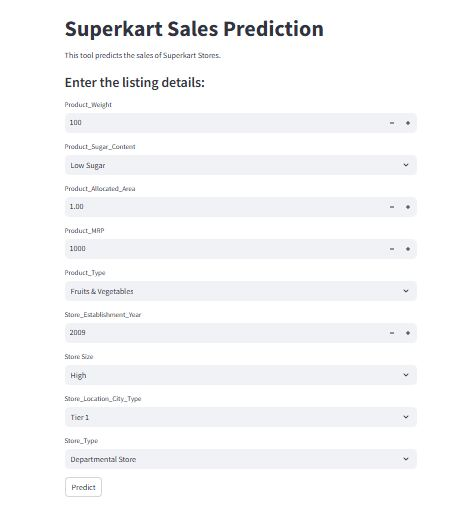

# **Inferencing using Flask API**

As the ***frontend and backend are decoupled***, we can ***access the backend directly for predictions***.
- The decoupling ensures seamless interaction with the deployed model while leveraging the API for scalable inference.

Let's see how to interact with the Flask API programatically within this notebook to perform **online** and **batch inference**.

We will
1. Send API requests for both online and batch inference.
2. Process and check the model predictions.

In [ ]:
import json  # To handle JSON formatting for API requests and responses
import requests  # To send HTTP requests to the deployed Flask API

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations

In [ ]:
model_root_url = "https://akskhare-SuperkartSalesBackend.hf.space"

In [ ]:
model_url = model_root_url + "/v1/sales"

Since our model predictions are served through the Flask endpoint we created, we need to call this endpoint to make a prediction.

> ```@app.post('/v1/sales')```

In [ ]:
model_batch_url = model_root_url + "/v1/batchsales"

@app.post('/v1/batchsales')

## **Online Inference**

The idea is to send a single request to the API and receive an immediate response. This is useful for real-time applications like recommendation systems and fraud detection.

* This data is sent as a JSON payload in a POST request to the model endpoint.
* The model processes the input features and returns a prediction as a JSON payload.

In [ ]:
payload = {
  "Product_Weight": 50,
  "Product_Sugar_Content": 'Regular',
  "Product_Allocated_Area": 0.04,
  "Product_MRP": 150,
  "Product_Type": "Fruits & Vegetables",
  "Store_Establishment_Year": 2009,
  "Store_Size": "Medium",
  "Store_Location_City_Type": "Tier 2",
  "Store_Type": 'Supermarket Type 2'
}

# This payload dictionary includes all the necessary features in the expected
# format for online (single store) prediction, ensuring consistency with the
# model's training data.

In [ ]:
# Sending a POST request to the model endpoint with the test payload
response = requests.post(model_url, json=payload)

In [ ]:
response


- The `<Response [200]>` you see is an HTTP status code.
- It indicates that your request was successful, and the server was able to process it without any problems.

In [ ]:
print(response.json())

## **Batch Inference**

The idea is to send a batch of requests to the API and receive a response. The backend reads the entire dataset, runs it through the ML model, and returns the prediction for every row in the file. This is useful for applications like loan default prediction and customer churn prediction, where we don't need results instantaneously.

* This data is sent as a CSV file in a POST request to the model endpoint.
* The model processes each row containing the input features and returns the predictions for each row as one single JSON payload.

In [ ]:
# Load the sample batch data for Airbnb
superkart_batch_data = pd.read_csv("/content/drive/MyDrive/Python/SuperKart.csv")

# **Actionable Insights and Business Recommendations**

1. **Flexibility and Scalability**: By separating the frontend and backend, we can easily update or scale each component independently. This means we can make changes to the user interface without affecting the prediction model, or vice versa. This also allows us to handle a large number of requests by scaling the backend without impacting the frontend's performance. It's like having a system with changeable parts, making it more adaptable and robust.

2. **Technology Agnostic**: The decoupled architecture allows us to use different technologies for the frontend and backend. For example, we can use Streamlit for the frontend and Flask for the backend, or any other suitable technologies. This flexibility enables us to choose the best tools for the job at hand.

3. **Reusability**: The backend API can be reused by other applications or services. This means we can integrate the prediction functionality into different parts of Airbnb's platform or even share it with external partners. This fosters greater efficiency and integration possibilities, extending the model's benefits beyond a single application. It's like creating a versatile tool that can be used in various projects, maximizing its value.

4) **Insight from EDA**

*   Product Allocated Area if highly right Skewed which means the space utilisation can be more refined in order to increase the create more space for new merchandise.

*   Consumers first preference is always towards Low Sugar Products for purchase from the Stores.

*   Highest Selling Product Type in Stores is Fruits and Vegetables followed by Snack Food. While Seafood is the least preferred by consumers to be purchased from Stores.

*   Stores started operation from 198 but a major boost in new stores opening was seen in 2009. This is due to consumer shift towards purchase from stores rather than local vendors. It is also due to the fact Stores provide large vaiety of products under one roof.

*   Maximum Sales generated by Stores are of Medium Size which belong to Supermarket Type 2 Category and are mostly located in Tier 2 Cities.

*   Sales of Product is not related with the Age of Stores, as Consumer will buy from Old/New Store will completely depend upon their requirement and accessebility from their residence or working space.

*   The most expensive product is sold in Departmental Store located in Tier 1 city showcasing hig value item purchase consumers are moslty from Tier 1 cities.

*   Supermarket Type 2 from Tier 2 cities have generated maximum business among all.

*   The most expensive item purchase belongs to Household Category and is from Dairy Type Product and has No Sugar.

*   Fruits and Vegetables have highest Sales among other Product Categories.

*   Low Sugar Items constitute to maximum sales among all the Sugar Content Products.

*   Highest Business generated from all the stores is by Store ID OUT004.

*   The Sale of Products from all the increased exponentially after Year 2000, showing major consumer shift towards their buying patterns.

*   The maximum sales of No Sugar Itmes are from Supermarket Type 2 which are located in Tier 2 cities.

*   If Monthly Sales or Weekly Sales would have been provided, a broader analysis could have been with what kind of product is sold and during which time of the week or month i.e during Holidays, Weekends etc.

